In [1]:
import numpy as np
import pandas as pd
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
from keras_applications.resnet import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

2023-05-18 23:33:53.380360: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented         2560
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented    1792
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented         717
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG19(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|                                                  | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|                                        | 1/5121 [00:01<2:23:23,  1.68s/it]

1/1 [==============================] - 0s 49ms/step


  0%|                                          | 3/5121 [00:01<43:04,  1.98it/s]

1/1 [==============================] - 0s 46ms/step


  0%|                                          | 5/5121 [00:02<24:45,  3.44it/s]

1/1 [==============================] - 0s 37ms/step


  0%|                                          | 6/5121 [00:02<20:24,  4.18it/s]

1/1 [==============================] - 0s 32ms/step


  0%|                                          | 8/5121 [00:02<15:02,  5.67it/s]

1/1 [==============================] - 0s 58ms/step


  0%|                                         | 10/5121 [00:02<12:21,  6.89it/s]

1/1 [==============================] - 0s 64ms/step


  0%|                                         | 12/5121 [00:02<10:49,  7.87it/s]

1/1 [==============================] - 0s 41ms/step


  0%|                                         | 14/5121 [00:02<10:05,  8.43it/s]

1/1 [==============================] - 0s 44ms/step


  0%|▏                                        | 16/5121 [00:03<09:31,  8.93it/s]

1/1 [==============================] - 0s 43ms/step


  0%|▏                                        | 18/5121 [00:03<08:57,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


  0%|▏                                        | 20/5121 [00:03<09:43,  8.75it/s]

1/1 [==============================] - 0s 34ms/step


  0%|▏                                        | 22/5121 [00:03<08:43,  9.74it/s]

1/1 [==============================] - 0s 34ms/step


  0%|▏                                        | 24/5121 [00:03<07:53, 10.75it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▏                                        | 26/5121 [00:03<07:18, 11.61it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▏                                        | 28/5121 [00:04<06:49, 12.43it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▏                                        | 30/5121 [00:04<06:44, 12.59it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 32/5121 [00:04<07:12, 11.78it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 34/5121 [00:04<07:12, 11.77it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▎                                        | 36/5121 [00:04<06:56, 12.20it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▎                                        | 38/5121 [00:04<06:36, 12.83it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 40/5121 [00:05<06:24, 13.23it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 42/5121 [00:05<06:15, 13.51it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▎                                        | 44/5121 [00:05<06:11, 13.67it/s]

1/1 [==============================] - 0s 48ms/step


  1%|▎                                        | 46/5121 [00:05<06:17, 13.45it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 48/5121 [00:05<06:09, 13.74it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▍                                        | 50/5121 [00:05<06:41, 12.62it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▍                                        | 52/5121 [00:05<06:28, 13.03it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▍                                        | 54/5121 [00:06<06:16, 13.47it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▍                                        | 56/5121 [00:06<06:06, 13.82it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                        | 58/5121 [00:06<05:56, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▍                                        | 60/5121 [00:06<05:45, 14.66it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▍                                        | 62/5121 [00:06<05:43, 14.73it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 64/5121 [00:06<05:39, 14.88it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 66/5121 [00:06<06:09, 13.67it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 68/5121 [00:07<06:00, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 70/5121 [00:07<05:54, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 72/5121 [00:07<05:48, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 74/5121 [00:07<05:41, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 76/5121 [00:07<05:36, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▌                                        | 78/5121 [00:07<06:05, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▋                                        | 80/5121 [00:07<06:02, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▋                                        | 82/5121 [00:08<05:49, 14.40it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▋                                        | 84/5121 [00:08<05:50, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▋                                        | 86/5121 [00:08<06:10, 13.59it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▋                                        | 88/5121 [00:08<05:57, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▋                                        | 90/5121 [00:08<05:46, 14.50it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▋                                        | 92/5121 [00:08<05:41, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                        | 94/5121 [00:08<05:37, 14.88it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▊                                        | 96/5121 [00:09<05:34, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                        | 98/5121 [00:09<05:35, 14.99it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                       | 100/5121 [00:09<05:31, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                       | 102/5121 [00:09<05:28, 15.27it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▊                                       | 104/5121 [00:09<05:29, 15.23it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▊                                       | 106/5121 [00:09<05:29, 15.22it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▊                                       | 108/5121 [00:09<05:25, 15.41it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                       | 110/5121 [00:09<05:25, 15.38it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                       | 112/5121 [00:10<05:25, 15.38it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 114/5121 [00:10<05:22, 15.53it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 116/5121 [00:10<05:26, 15.32it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▉                                       | 118/5121 [00:10<05:27, 15.28it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▉                                       | 120/5121 [00:10<05:29, 15.17it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 122/5121 [00:10<05:30, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 124/5121 [00:10<05:30, 15.13it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▉                                       | 126/5121 [00:10<05:28, 15.21it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▉                                       | 128/5121 [00:11<05:27, 15.23it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█                                       | 130/5121 [00:11<05:21, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█                                       | 132/5121 [00:11<05:21, 15.53it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█                                       | 134/5121 [00:11<05:23, 15.40it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█                                       | 136/5121 [00:11<05:21, 15.49it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█                                       | 138/5121 [00:11<05:19, 15.58it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█                                       | 140/5121 [00:11<05:19, 15.61it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█                                       | 142/5121 [00:12<05:22, 15.46it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█                                       | 144/5121 [00:12<05:59, 13.83it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 146/5121 [00:12<05:51, 14.16it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 148/5121 [00:12<05:40, 14.61it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 150/5121 [00:12<05:33, 14.90it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▏                                      | 152/5121 [00:12<05:36, 14.76it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▏                                      | 154/5121 [00:12<05:33, 14.90it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 156/5121 [00:12<05:32, 14.94it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 158/5121 [00:13<05:26, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 160/5121 [00:13<05:25, 15.26it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 162/5121 [00:13<05:25, 15.25it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▎                                      | 164/5121 [00:13<05:21, 15.43it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 166/5121 [00:13<05:20, 15.45it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 168/5121 [00:13<05:22, 15.36it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 170/5121 [00:13<05:22, 15.35it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 172/5121 [00:14<05:20, 15.43it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 174/5121 [00:14<05:18, 15.53it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 176/5121 [00:14<05:21, 15.38it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▍                                      | 178/5121 [00:14<05:22, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                      | 180/5121 [00:14<05:22, 15.33it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                      | 182/5121 [00:14<05:22, 15.30it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                      | 184/5121 [00:14<05:24, 15.22it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▍                                      | 186/5121 [00:14<05:26, 15.10it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                      | 188/5121 [00:15<05:27, 15.06it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                      | 190/5121 [00:15<05:24, 15.19it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▍                                      | 192/5121 [00:15<05:21, 15.32it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                      | 194/5121 [00:15<05:19, 15.44it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 196/5121 [00:15<05:21, 15.30it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                      | 198/5121 [00:15<05:21, 15.30it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 200/5121 [00:15<05:18, 15.43it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 202/5121 [00:15<05:16, 15.56it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 204/5121 [00:16<05:49, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                      | 206/5121 [00:16<05:44, 14.26it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 208/5121 [00:16<05:36, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▋                                      | 210/5121 [00:16<05:29, 14.89it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▋                                      | 212/5121 [00:16<05:25, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 214/5121 [00:16<05:26, 15.03it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 216/5121 [00:16<05:24, 15.13it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 218/5121 [00:17<05:20, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▋                                      | 220/5121 [00:17<05:19, 15.34it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▋                                      | 222/5121 [00:17<05:21, 15.25it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 224/5121 [00:17<05:22, 15.17it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▊                                      | 226/5121 [00:17<05:20, 15.26it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▊                                      | 228/5121 [00:17<05:19, 15.30it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▊                                      | 230/5121 [00:17<05:17, 15.40it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▊                                      | 232/5121 [00:17<05:19, 15.28it/s]

1/1 [==============================] - 0s 35ms/step


  5%|█▊                                      | 234/5121 [00:18<05:22, 15.15it/s]

1/1 [==============================] - 0s 39ms/step


  5%|█▊                                      | 236/5121 [00:18<05:58, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▊                                      | 238/5121 [00:18<06:32, 12.43it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▊                                      | 240/5121 [00:18<06:14, 13.02it/s]

1/1 [==============================] - 0s 34ms/step


  5%|█▉                                      | 242/5121 [00:18<06:02, 13.45it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 244/5121 [00:18<05:48, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▉                                      | 246/5121 [00:19<05:42, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 248/5121 [00:19<05:34, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 250/5121 [00:19<05:39, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 252/5121 [00:19<05:32, 14.65it/s]

1/1 [==============================] - 0s 53ms/step


  5%|█▉                                      | 254/5121 [00:19<08:21,  9.70it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▉                                      | 256/5121 [00:19<07:39, 10.59it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██                                      | 258/5121 [00:20<06:52, 11.79it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██                                      | 260/5121 [00:20<06:27, 12.56it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 262/5121 [00:20<06:05, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 264/5121 [00:20<05:51, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 266/5121 [00:20<05:38, 14.34it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 268/5121 [00:20<05:33, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 270/5121 [00:20<05:27, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██                                      | 272/5121 [00:20<05:24, 14.95it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██▏                                     | 274/5121 [00:21<05:20, 15.11it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██▏                                     | 276/5121 [00:21<05:15, 15.35it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██▏                                     | 278/5121 [00:21<05:15, 15.35it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██▏                                     | 280/5121 [00:21<05:47, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▏                                     | 282/5121 [00:21<05:41, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▏                                     | 284/5121 [00:21<05:31, 14.57it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▏                                     | 286/5121 [00:21<05:28, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▏                                     | 288/5121 [00:22<05:24, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▎                                     | 290/5121 [00:22<05:21, 15.02it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▎                                     | 292/5121 [00:22<05:50, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▎                                     | 294/5121 [00:22<05:42, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▎                                     | 296/5121 [00:22<05:38, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▎                                     | 298/5121 [00:22<05:30, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▎                                     | 300/5121 [00:22<05:26, 14.78it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▎                                     | 302/5121 [00:23<05:23, 14.89it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▎                                     | 304/5121 [00:23<05:24, 14.84it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▍                                     | 306/5121 [00:23<05:24, 14.84it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 308/5121 [00:23<05:20, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▍                                     | 310/5121 [00:23<05:18, 15.11it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 312/5121 [00:23<05:17, 15.17it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▍                                     | 314/5121 [00:23<05:18, 15.07it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 316/5121 [00:23<05:17, 15.13it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 318/5121 [00:24<05:44, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 320/5121 [00:24<05:39, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▌                                     | 322/5121 [00:24<05:35, 14.28it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▌                                     | 324/5121 [00:24<05:29, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▌                                     | 326/5121 [00:24<05:25, 14.71it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▌                                     | 328/5121 [00:24<05:25, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▌                                     | 330/5121 [00:24<05:24, 14.76it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▌                                     | 332/5121 [00:25<05:24, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▌                                     | 334/5121 [00:25<05:20, 14.94it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▌                                     | 336/5121 [00:25<05:21, 14.89it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 338/5121 [00:25<05:15, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 340/5121 [00:25<05:15, 15.16it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 342/5121 [00:25<05:15, 15.16it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▋                                     | 344/5121 [00:25<05:41, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 346/5121 [00:26<05:35, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 348/5121 [00:26<06:02, 13.15it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▋                                     | 350/5121 [00:26<05:57, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 352/5121 [00:26<06:18, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▊                                     | 354/5121 [00:26<06:00, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                     | 356/5121 [00:26<05:46, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▊                                     | 358/5121 [00:26<05:36, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                     | 360/5121 [00:27<05:27, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


  7%|██▊                                     | 362/5121 [00:27<05:20, 14.85it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▊                                     | 364/5121 [00:27<05:18, 14.95it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▊                                     | 366/5121 [00:27<05:21, 14.80it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                     | 368/5121 [00:27<05:21, 14.80it/s]

1/1 [==============================] - 0s 31ms/step


  7%|██▉                                     | 370/5121 [00:27<05:15, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 372/5121 [00:27<05:13, 15.16it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▉                                     | 374/5121 [00:27<05:12, 15.17it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 376/5121 [00:28<05:12, 15.18it/s]

1/1 [==============================] - 0s 31ms/step


  7%|██▉                                     | 378/5121 [00:28<05:09, 15.32it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▉                                     | 380/5121 [00:28<05:14, 15.05it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 382/5121 [00:28<06:04, 12.99it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 384/5121 [00:28<05:48, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███                                     | 386/5121 [00:28<05:41, 13.87it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███                                     | 388/5121 [00:28<05:30, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███                                     | 390/5121 [00:29<05:28, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███                                     | 392/5121 [00:29<05:22, 14.67it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███                                     | 394/5121 [00:29<05:20, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███                                     | 396/5121 [00:29<05:20, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███                                     | 398/5121 [00:29<05:17, 14.85it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███                                     | 400/5121 [00:29<05:14, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 402/5121 [00:29<05:13, 15.05it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 404/5121 [00:30<05:12, 15.08it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 406/5121 [00:30<05:17, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▏                                    | 408/5121 [00:30<05:13, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▏                                    | 410/5121 [00:30<05:09, 15.21it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▏                                    | 412/5121 [00:30<05:10, 15.16it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 414/5121 [00:30<05:07, 15.30it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▏                                    | 416/5121 [00:30<05:05, 15.39it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 418/5121 [00:30<05:09, 15.20it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 420/5121 [00:31<05:13, 14.98it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 422/5121 [00:31<05:47, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 424/5121 [00:31<05:34, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 426/5121 [00:31<05:26, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 428/5121 [00:31<05:23, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▎                                    | 430/5121 [00:31<05:54, 13.23it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 432/5121 [00:31<05:45, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▍                                    | 434/5121 [00:32<05:34, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 436/5121 [00:32<05:23, 14.47it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▍                                    | 438/5121 [00:32<05:17, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 440/5121 [00:32<05:16, 14.80it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 442/5121 [00:32<05:10, 15.08it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 444/5121 [00:32<05:09, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 446/5121 [00:32<05:07, 15.18it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 448/5121 [00:33<05:10, 15.07it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 450/5121 [00:33<05:11, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 452/5121 [00:33<05:11, 14.97it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 454/5121 [00:33<05:08, 15.13it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 456/5121 [00:33<05:09, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 458/5121 [00:33<05:08, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 460/5121 [00:33<05:07, 15.18it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▌                                    | 462/5121 [00:33<05:08, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 464/5121 [00:34<05:07, 15.17it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▋                                    | 466/5121 [00:34<05:04, 15.30it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▋                                    | 468/5121 [00:34<05:08, 15.06it/s]

1/1 [==============================] - 0s 37ms/step


  9%|███▋                                    | 470/5121 [00:34<05:19, 14.57it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▋                                    | 472/5121 [00:34<05:16, 14.67it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▋                                    | 474/5121 [00:34<05:12, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 476/5121 [00:34<05:12, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 478/5121 [00:35<05:08, 15.06it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▋                                    | 480/5121 [00:35<05:06, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▊                                    | 482/5121 [00:35<05:04, 15.22it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▊                                    | 484/5121 [00:35<05:06, 15.11it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▊                                    | 486/5121 [00:35<05:05, 15.19it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███▊                                    | 488/5121 [00:35<05:05, 15.18it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 490/5121 [00:35<05:06, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 492/5121 [00:35<05:03, 15.26it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 494/5121 [00:36<05:08, 15.02it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 496/5121 [00:36<05:07, 15.05it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███▉                                    | 498/5121 [00:36<05:05, 15.15it/s]

1/1 [==============================] - 0s 54ms/step


 10%|███▉                                    | 500/5121 [00:36<06:01, 12.78it/s]

1/1 [==============================] - 0s 31ms/step


 10%|███▉                                    | 502/5121 [00:36<06:43, 11.46it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▉                                    | 504/5121 [00:36<06:16, 12.28it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▉                                    | 506/5121 [00:37<05:53, 13.04it/s]

1/1 [==============================] - 0s 35ms/step


 10%|███▉                                    | 508/5121 [00:37<05:39, 13.58it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▉                                    | 510/5121 [00:37<05:32, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▉                                    | 512/5121 [00:37<05:29, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 514/5121 [00:37<05:22, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 516/5121 [00:37<05:14, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 518/5121 [00:37<05:09, 14.85it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████                                    | 520/5121 [00:37<05:09, 14.85it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 522/5121 [00:38<05:07, 14.96it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 524/5121 [00:38<05:04, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████                                    | 526/5121 [00:38<05:39, 13.53it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████                                    | 528/5121 [00:38<06:07, 12.49it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████▏                                   | 530/5121 [00:38<05:50, 13.11it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████▏                                   | 532/5121 [00:38<05:36, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████▏                                   | 534/5121 [00:39<05:25, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████▏                                   | 536/5121 [00:39<05:17, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▏                                   | 538/5121 [00:39<05:14, 14.55it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▏                                   | 540/5121 [00:39<05:10, 14.75it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▏                                   | 542/5121 [00:39<05:08, 14.85it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▏                                   | 544/5121 [00:39<05:06, 14.96it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 546/5121 [00:39<05:02, 15.11it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▎                                   | 548/5121 [00:39<05:00, 15.20it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 550/5121 [00:40<05:00, 15.21it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 552/5121 [00:40<05:02, 15.10it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▎                                   | 554/5121 [00:40<05:01, 15.12it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▎                                   | 556/5121 [00:40<05:01, 15.12it/s]

1/1 [==============================] - 0s 37ms/step


 11%|████▎                                   | 558/5121 [00:40<05:09, 14.76it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 560/5121 [00:40<05:06, 14.86it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▍                                   | 562/5121 [00:40<05:05, 14.93it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▍                                   | 564/5121 [00:41<05:01, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 566/5121 [00:41<05:01, 15.11it/s]

1/1 [==============================] - 0s 37ms/step


 11%|████▍                                   | 568/5121 [00:41<05:03, 14.98it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 570/5121 [00:41<05:03, 15.02it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 572/5121 [00:41<05:02, 15.04it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▍                                   | 574/5121 [00:41<05:03, 14.97it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▍                                   | 576/5121 [00:41<05:02, 15.02it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▌                                   | 578/5121 [00:41<05:00, 15.12it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▌                                   | 580/5121 [00:42<04:57, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▌                                   | 582/5121 [00:42<04:57, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▌                                   | 584/5121 [00:42<05:00, 15.11it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▌                                   | 586/5121 [00:42<04:59, 15.16it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▌                                   | 588/5121 [00:42<05:00, 15.10it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▌                                   | 590/5121 [00:42<05:01, 15.04it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▌                                   | 592/5121 [00:42<05:02, 14.97it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 594/5121 [00:43<05:00, 15.08it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 596/5121 [00:43<04:59, 15.12it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▋                                   | 598/5121 [00:43<04:58, 15.16it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▋                                   | 600/5121 [00:43<04:54, 15.33it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 602/5121 [00:43<05:30, 13.66it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▋                                   | 604/5121 [00:43<05:20, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 606/5121 [00:43<05:13, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▋                                   | 608/5121 [00:43<05:07, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 610/5121 [00:44<05:09, 14.58it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▊                                   | 612/5121 [00:44<05:08, 14.61it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 614/5121 [00:44<05:03, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 616/5121 [00:44<05:02, 14.88it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 618/5121 [00:44<05:00, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 620/5121 [00:44<06:57, 10.77it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▊                                   | 622/5121 [00:45<06:19, 11.86it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▊                                   | 624/5121 [00:45<05:51, 12.78it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 626/5121 [00:45<05:32, 13.52it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 628/5121 [00:45<05:20, 14.04it/s]

1/1 [==============================] - 0s 39ms/step


 12%|████▉                                   | 630/5121 [00:45<05:19, 14.05it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 632/5121 [00:45<05:11, 14.40it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▉                                   | 634/5121 [00:45<05:09, 14.51it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 636/5121 [00:46<05:05, 14.70it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▉                                   | 638/5121 [00:46<05:02, 14.81it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 640/5121 [00:46<05:00, 14.93it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█████                                   | 642/5121 [00:46<04:55, 15.15it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████                                   | 644/5121 [00:46<04:56, 15.11it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████                                   | 646/5121 [00:46<04:52, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████                                   | 648/5121 [00:46<04:52, 15.28it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████                                   | 650/5121 [00:46<04:56, 15.09it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████                                   | 652/5121 [00:47<04:55, 15.15it/s]

1/1 [==============================] - 0s 37ms/step


 13%|█████                                   | 654/5121 [00:47<04:59, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████                                   | 656/5121 [00:47<04:59, 14.88it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▏                                  | 658/5121 [00:47<04:55, 15.08it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▏                                  | 660/5121 [00:47<05:00, 14.85it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 662/5121 [00:47<04:57, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 664/5121 [00:47<04:55, 15.06it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 666/5121 [00:47<04:54, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 668/5121 [00:48<04:57, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▏                                  | 670/5121 [00:48<04:58, 14.93it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 672/5121 [00:48<04:57, 14.97it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▎                                  | 674/5121 [00:48<04:59, 14.84it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▎                                  | 676/5121 [00:48<05:25, 13.67it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 678/5121 [00:48<05:17, 14.01it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 680/5121 [00:48<05:09, 14.35it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 682/5121 [00:49<05:03, 14.64it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 684/5121 [00:49<05:01, 14.70it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▎                                  | 686/5121 [00:49<05:00, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 688/5121 [00:49<04:55, 14.99it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▍                                  | 690/5121 [00:49<04:55, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▍                                  | 692/5121 [00:49<05:26, 13.55it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▍                                  | 694/5121 [00:49<05:19, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▍                                  | 696/5121 [00:50<05:12, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▍                                  | 698/5121 [00:50<05:34, 13.21it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▍                                  | 700/5121 [00:50<05:25, 13.58it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▍                                  | 702/5121 [00:50<05:16, 13.96it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█████▍                                  | 704/5121 [00:50<05:10, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▌                                  | 706/5121 [00:50<05:04, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▌                                  | 708/5121 [00:50<04:59, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▌                                  | 710/5121 [00:51<04:59, 14.75it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 712/5121 [00:51<04:54, 14.95it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▌                                  | 714/5121 [00:51<04:56, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▌                                  | 716/5121 [00:51<04:52, 15.04it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 718/5121 [00:51<04:52, 15.07it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 720/5121 [00:51<04:57, 14.80it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▋                                  | 722/5121 [00:51<04:54, 14.94it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█████▋                                  | 724/5121 [00:51<04:55, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▋                                  | 726/5121 [00:52<04:52, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▋                                  | 728/5121 [00:52<04:54, 14.94it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▋                                  | 730/5121 [00:52<04:53, 14.98it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▋                                  | 732/5121 [00:52<04:51, 15.04it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█████▋                                  | 734/5121 [00:52<05:20, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▋                                  | 736/5121 [00:52<05:14, 13.94it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█████▊                                  | 738/5121 [00:52<05:13, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▊                                  | 740/5121 [00:53<05:05, 14.36it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█████▊                                  | 742/5121 [00:53<06:31, 11.18it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█████▊                                  | 744/5121 [00:53<06:02, 12.08it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▊                                  | 746/5121 [00:53<05:41, 12.81it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█████▊                                  | 748/5121 [00:53<05:23, 13.53it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█████▊                                  | 750/5121 [00:53<05:42, 12.78it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▊                                  | 752/5121 [00:54<05:28, 13.32it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█████▉                                  | 754/5121 [00:54<05:12, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▉                                  | 756/5121 [00:54<05:05, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█████▉                                  | 758/5121 [00:54<04:58, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▉                                  | 760/5121 [00:54<04:54, 14.80it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█████▉                                  | 762/5121 [00:54<05:22, 13.52it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█████▉                                  | 764/5121 [00:54<05:36, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▉                                  | 766/5121 [00:55<05:26, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▉                                  | 768/5121 [00:55<05:14, 13.86it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 770/5121 [00:55<05:04, 14.30it/s]

1/1 [==============================] - 0s 31ms/step


 15%|██████                                  | 772/5121 [00:55<04:57, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 774/5121 [00:55<04:59, 14.51it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 776/5121 [00:55<04:58, 14.55it/s]

1/1 [==============================] - 0s 37ms/step


 15%|██████                                  | 778/5121 [00:55<04:57, 14.60it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 780/5121 [00:56<04:51, 14.90it/s]

1/1 [==============================] - 0s 32ms/step


 15%|██████                                  | 782/5121 [00:56<04:50, 14.95it/s]

1/1 [==============================] - 0s 37ms/step


 15%|██████                                  | 784/5121 [00:56<06:29, 11.12it/s]

1/1 [==============================] - 0s 36ms/step


 15%|██████▏                                 | 786/5121 [00:56<05:59, 12.07it/s]

1/1 [==============================] - 0s 32ms/step


 15%|██████▏                                 | 788/5121 [00:56<05:36, 12.87it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████▏                                 | 790/5121 [00:56<05:20, 13.50it/s]

1/1 [==============================] - 0s 36ms/step


 15%|██████▏                                 | 792/5121 [00:57<05:47, 12.47it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▏                                 | 794/5121 [00:57<05:28, 13.18it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▏                                 | 796/5121 [00:57<05:16, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▏                                 | 798/5121 [00:57<05:06, 14.13it/s]

1/1 [==============================] - 0s 38ms/step


 16%|██████▏                                 | 800/5121 [00:57<05:02, 14.26it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 802/5121 [00:57<04:59, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 804/5121 [00:57<04:56, 14.56it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▎                                 | 806/5121 [00:57<04:54, 14.66it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▎                                 | 808/5121 [00:58<04:54, 14.67it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▎                                 | 810/5121 [00:58<04:53, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 812/5121 [00:58<04:51, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 814/5121 [00:58<04:51, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 816/5121 [00:58<04:48, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▍                                 | 818/5121 [00:58<05:23, 13.32it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▍                                 | 820/5121 [00:58<05:12, 13.75it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▍                                 | 822/5121 [00:59<05:05, 14.07it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▍                                 | 824/5121 [00:59<04:58, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▍                                 | 826/5121 [00:59<04:56, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▍                                 | 828/5121 [00:59<04:54, 14.58it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▍                                 | 830/5121 [00:59<04:54, 14.59it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▍                                 | 832/5121 [00:59<04:51, 14.73it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▌                                 | 834/5121 [00:59<04:49, 14.83it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▌                                 | 836/5121 [01:00<05:00, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▌                                 | 838/5121 [01:00<04:55, 14.47it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▌                                 | 840/5121 [01:00<04:52, 14.65it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▌                                 | 842/5121 [01:00<04:51, 14.70it/s]

1/1 [==============================] - 0s 38ms/step


 16%|██████▌                                 | 844/5121 [01:00<04:50, 14.71it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▌                                 | 846/5121 [01:00<04:50, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▌                                 | 848/5121 [01:00<04:48, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 850/5121 [01:01<04:48, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 852/5121 [01:01<04:44, 14.98it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▋                                 | 854/5121 [01:01<04:45, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 856/5121 [01:01<04:42, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 858/5121 [01:01<04:41, 15.16it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▋                                 | 860/5121 [01:01<04:43, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 862/5121 [01:01<04:41, 15.13it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▋                                 | 864/5121 [01:01<04:41, 15.15it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▊                                 | 866/5121 [01:02<04:42, 15.08it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 868/5121 [01:02<04:47, 14.81it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▊                                 | 870/5121 [01:02<04:50, 14.65it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▊                                 | 872/5121 [01:02<04:48, 14.72it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 874/5121 [01:02<04:45, 14.89it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 876/5121 [01:02<05:10, 13.66it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 878/5121 [01:02<05:00, 14.13it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▊                                 | 880/5121 [01:03<04:53, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▉                                 | 882/5121 [01:03<05:17, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▉                                 | 884/5121 [01:03<05:36, 12.61it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 886/5121 [01:03<05:21, 13.19it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 888/5121 [01:03<05:11, 13.60it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 890/5121 [01:03<05:03, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▉                                 | 892/5121 [01:03<04:54, 14.35it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 894/5121 [01:04<04:48, 14.68it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▉                                 | 896/5121 [01:04<05:12, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████                                 | 898/5121 [01:04<04:59, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████                                 | 900/5121 [01:04<04:54, 14.34it/s]

1/1 [==============================] - 0s 38ms/step


 18%|███████                                 | 902/5121 [01:04<04:50, 14.50it/s]

1/1 [==============================] - 0s 39ms/step


 18%|███████                                 | 904/5121 [01:04<05:22, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████                                 | 906/5121 [01:04<05:11, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████                                 | 908/5121 [01:05<05:00, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████                                 | 910/5121 [01:05<04:59, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████                                 | 912/5121 [01:05<04:57, 14.15it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▏                                | 914/5121 [01:05<04:48, 14.58it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▏                                | 916/5121 [01:05<04:45, 14.70it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▏                                | 918/5121 [01:05<04:44, 14.78it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 920/5121 [01:05<04:42, 14.85it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▏                                | 922/5121 [01:06<04:42, 14.89it/s]

1/1 [==============================] - 0s 36ms/step


 18%|███████▏                                | 924/5121 [01:06<04:40, 14.99it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 926/5121 [01:06<04:38, 15.05it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 928/5121 [01:06<04:38, 15.06it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 930/5121 [01:06<05:09, 13.55it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 932/5121 [01:06<05:03, 13.81it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▎                                | 934/5121 [01:06<04:56, 14.14it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████▎                                | 936/5121 [01:07<04:50, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 938/5121 [01:07<04:44, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 940/5121 [01:07<04:42, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 942/5121 [01:07<04:41, 14.84it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 944/5121 [01:07<04:41, 14.84it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▍                                | 946/5121 [01:07<05:07, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▍                                | 948/5121 [01:07<04:58, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 950/5121 [01:07<04:48, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 952/5121 [01:08<04:46, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 954/5121 [01:08<04:46, 14.52it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 956/5121 [01:08<04:43, 14.71it/s]

1/1 [==============================] - 0s 39ms/step


 19%|███████▍                                | 958/5121 [01:08<04:44, 14.66it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▍                                | 960/5121 [01:08<04:38, 14.96it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▌                                | 962/5121 [01:08<04:38, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▌                                | 964/5121 [01:08<05:23, 12.83it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▌                                | 966/5121 [01:09<05:12, 13.31it/s]

1/1 [==============================] - 0s 67ms/step


 19%|███████▌                                | 968/5121 [01:09<06:34, 10.52it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 970/5121 [01:09<06:28, 10.69it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 972/5121 [01:09<05:54, 11.70it/s]

1/1 [==============================] - 0s 37ms/step


 19%|███████▌                                | 974/5121 [01:09<05:31, 12.52it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▌                                | 976/5121 [01:09<05:13, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 978/5121 [01:10<05:00, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 980/5121 [01:10<04:56, 13.97it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▋                                | 982/5121 [01:10<04:47, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 984/5121 [01:10<04:44, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 986/5121 [01:10<04:40, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 988/5121 [01:10<04:36, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▋                                | 990/5121 [01:10<04:35, 14.98it/s]

1/1 [==============================] - 0s 36ms/step


 19%|███████▋                                | 992/5121 [01:11<04:34, 15.03it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▊                                | 994/5121 [01:11<04:33, 15.11it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▊                                | 996/5121 [01:11<04:31, 15.18it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▊                                | 998/5121 [01:11<05:08, 13.37it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▌                               | 1000/5121 [01:11<04:57, 13.83it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▋                               | 1002/5121 [01:11<05:18, 12.94it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▋                               | 1004/5121 [01:11<05:06, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 20%|███████▋                               | 1006/5121 [01:12<04:58, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▋                               | 1008/5121 [01:12<04:50, 14.17it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1010/5121 [01:12<04:46, 14.34it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1012/5121 [01:12<04:42, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▋                               | 1014/5121 [01:12<04:38, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1016/5121 [01:12<04:36, 14.83it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▊                               | 1018/5121 [01:12<04:31, 15.10it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▊                               | 1020/5121 [01:13<04:32, 15.07it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▊                               | 1022/5121 [01:13<04:31, 15.08it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▊                               | 1024/5121 [01:13<04:31, 15.08it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▊                               | 1026/5121 [01:13<04:33, 14.96it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▊                               | 1028/5121 [01:13<04:33, 14.96it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▊                               | 1030/5121 [01:13<04:34, 14.91it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▊                               | 1032/5121 [01:13<04:31, 15.05it/s]

1/1 [==============================] - 0s 37ms/step


 20%|███████▊                               | 1034/5121 [01:13<04:34, 14.91it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                               | 1036/5121 [01:14<04:32, 15.00it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1038/5121 [01:14<04:30, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1040/5121 [01:14<04:29, 15.12it/s]

1/1 [==============================] - 0s 36ms/step


 20%|███████▉                               | 1042/5121 [01:14<04:29, 15.16it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                               | 1044/5121 [01:14<04:34, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                               | 1046/5121 [01:14<04:33, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▉                               | 1048/5121 [01:14<05:06, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 21%|███████▉                               | 1050/5121 [01:15<04:55, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1052/5121 [01:15<04:48, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1054/5121 [01:15<04:39, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████                               | 1056/5121 [01:15<04:37, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1058/5121 [01:15<04:35, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1060/5121 [01:15<04:31, 14.94it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1062/5121 [01:15<04:31, 14.93it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████                               | 1064/5121 [01:15<04:33, 14.85it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████                               | 1066/5121 [01:16<04:30, 15.01it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▏                              | 1068/5121 [01:16<04:29, 15.06it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1070/5121 [01:16<04:30, 14.98it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1072/5121 [01:16<04:29, 15.02it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1074/5121 [01:16<04:25, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1076/5121 [01:16<04:26, 15.17it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1078/5121 [01:16<04:28, 15.08it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1080/5121 [01:17<04:32, 14.82it/s]

1/1 [==============================] - 0s 38ms/step


 21%|████████▏                              | 1082/5121 [01:17<04:55, 13.69it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▎                              | 1084/5121 [01:17<05:12, 12.91it/s]

1/1 [==============================] - 0s 37ms/step


 21%|████████▎                              | 1086/5121 [01:17<05:31, 12.19it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1088/5121 [01:17<05:16, 12.74it/s]

1/1 [==============================] - 0s 37ms/step


 21%|████████▎                              | 1090/5121 [01:17<05:04, 13.22it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1092/5121 [01:18<04:53, 13.73it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▎                              | 1094/5121 [01:18<04:46, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1096/5121 [01:18<04:44, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1098/5121 [01:18<04:40, 14.33it/s]

1/1 [==============================] - 0s 38ms/step


 21%|████████▍                              | 1100/5121 [01:18<04:36, 14.52it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▍                              | 1102/5121 [01:18<04:35, 14.59it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▍                              | 1104/5121 [01:18<04:33, 14.69it/s]

1/1 [==============================] - 0s 39ms/step


 22%|████████▍                              | 1106/5121 [01:18<04:41, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▍                              | 1108/5121 [01:19<05:18, 12.61it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▍                              | 1110/5121 [01:19<05:04, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▍                              | 1112/5121 [01:19<04:57, 13.49it/s]

1/1 [==============================] - 0s 38ms/step


 22%|████████▍                              | 1114/5121 [01:19<04:47, 13.92it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▍                              | 1116/5121 [01:19<04:41, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1118/5121 [01:19<04:35, 14.52it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1120/5121 [01:19<04:35, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▌                              | 1122/5121 [01:20<04:30, 14.78it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▌                              | 1124/5121 [01:20<04:30, 14.75it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1126/5121 [01:20<04:33, 14.62it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1128/5121 [01:20<04:54, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1130/5121 [01:20<04:47, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1132/5121 [01:20<04:39, 14.25it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1134/5121 [01:20<04:41, 14.19it/s]

1/1 [==============================] - 0s 39ms/step


 22%|████████▋                              | 1136/5121 [01:21<04:39, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1138/5121 [01:21<04:32, 14.62it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1140/5121 [01:21<04:28, 14.82it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1142/5121 [01:21<04:30, 14.71it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▋                              | 1144/5121 [01:21<04:53, 13.54it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1146/5121 [01:21<04:45, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1148/5121 [01:21<04:36, 14.35it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▊                              | 1150/5121 [01:22<04:33, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▊                              | 1152/5121 [01:22<04:34, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▊                              | 1154/5121 [01:22<04:30, 14.67it/s]

1/1 [==============================] - 0s 39ms/step


 23%|████████▊                              | 1156/5121 [01:22<04:31, 14.61it/s]

1/1 [==============================] - 0s 35ms/step


 23%|████████▊                              | 1158/5121 [01:22<04:30, 14.65it/s]

1/1 [==============================] - 0s 35ms/step


 23%|████████▊                              | 1160/5121 [01:22<04:35, 14.38it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▊                              | 1162/5121 [01:22<04:39, 14.15it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▊                              | 1164/5121 [01:23<04:39, 14.16it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1166/5121 [01:23<04:35, 14.35it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1168/5121 [01:23<04:57, 13.28it/s]

1/1 [==============================] - 0s 35ms/step


 23%|████████▉                              | 1170/5121 [01:23<04:52, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


 23%|████████▉                              | 1172/5121 [01:23<04:46, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1174/5121 [01:23<04:38, 14.16it/s]

1/1 [==============================] - 0s 35ms/step


 23%|████████▉                              | 1176/5121 [01:23<04:37, 14.20it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▉                              | 1178/5121 [01:24<04:34, 14.37it/s]

1/1 [==============================] - 0s 38ms/step


 23%|████████▉                              | 1180/5121 [01:24<04:37, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████                              | 1182/5121 [01:24<04:33, 14.38it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████                              | 1184/5121 [01:24<04:31, 14.52it/s]

1/1 [==============================] - 0s 37ms/step


 23%|█████████                              | 1186/5121 [01:24<04:37, 14.20it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████                              | 1188/5121 [01:24<04:34, 14.32it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████                              | 1190/5121 [01:24<04:35, 14.25it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████                              | 1192/5121 [01:25<04:32, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1194/5121 [01:25<04:34, 14.30it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████                              | 1196/5121 [01:25<04:35, 14.23it/s]

1/1 [==============================] - 0s 60ms/step


 23%|█████████                              | 1198/5121 [01:25<05:58, 10.94it/s]

1/1 [==============================] - 0s 36ms/step


 23%|█████████▏                             | 1200/5121 [01:25<05:43, 11.42it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████▏                             | 1202/5121 [01:25<05:23, 12.13it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▏                             | 1204/5121 [01:26<05:05, 12.83it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▏                             | 1206/5121 [01:26<04:52, 13.40it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▏                             | 1208/5121 [01:26<04:40, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▏                             | 1210/5121 [01:26<04:35, 14.17it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▏                             | 1212/5121 [01:26<04:29, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▏                             | 1214/5121 [01:26<04:28, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1216/5121 [01:26<04:29, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▎                             | 1218/5121 [01:26<04:24, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1220/5121 [01:27<04:23, 14.83it/s]

1/1 [==============================] - 0s 36ms/step


 24%|█████████▎                             | 1222/5121 [01:27<04:21, 14.90it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▎                             | 1224/5121 [01:27<04:46, 13.61it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▎                             | 1226/5121 [01:27<04:37, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1228/5121 [01:27<05:02, 12.88it/s]

1/1 [==============================] - 0s 36ms/step


 24%|█████████▎                             | 1230/5121 [01:27<04:50, 13.39it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                             | 1232/5121 [01:28<04:51, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▍                             | 1234/5121 [01:28<04:40, 13.84it/s]

1/1 [==============================] - 0s 38ms/step


 24%|█████████▍                             | 1236/5121 [01:28<04:37, 13.98it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                             | 1238/5121 [01:28<04:29, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▍                             | 1240/5121 [01:28<04:26, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1242/5121 [01:28<04:28, 14.43it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▍                             | 1244/5121 [01:28<04:23, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1246/5121 [01:28<04:21, 14.83it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▌                             | 1248/5121 [01:29<04:18, 14.99it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▌                             | 1250/5121 [01:29<05:04, 12.70it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▌                             | 1252/5121 [01:29<04:55, 13.11it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▌                             | 1254/5121 [01:29<04:44, 13.61it/s]

1/1 [==============================] - 0s 39ms/step


 25%|█████████▌                             | 1256/5121 [01:29<04:38, 13.87it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▌                             | 1258/5121 [01:29<04:31, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▌                             | 1260/5121 [01:29<04:25, 14.56it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▌                             | 1262/5121 [01:30<04:24, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1264/5121 [01:30<04:19, 14.87it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1266/5121 [01:30<04:14, 15.16it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▋                             | 1268/5121 [01:30<04:15, 15.10it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1270/5121 [01:30<04:15, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1272/5121 [01:30<04:13, 15.20it/s]

1/1 [==============================] - 0s 37ms/step


 25%|█████████▋                             | 1274/5121 [01:30<04:14, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1276/5121 [01:31<04:12, 15.21it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1278/5121 [01:31<04:17, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1280/5121 [01:31<04:18, 14.83it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1282/5121 [01:31<04:19, 14.81it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1284/5121 [01:31<04:15, 15.02it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1286/5121 [01:31<04:15, 15.03it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1288/5121 [01:31<04:13, 15.12it/s]

1/1 [==============================] - 0s 37ms/step


 25%|█████████▊                             | 1290/5121 [01:31<04:13, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1292/5121 [01:32<04:12, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1294/5121 [01:32<04:13, 15.11it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1296/5121 [01:32<04:20, 14.69it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▉                             | 1298/5121 [01:32<04:20, 14.68it/s]

1/1 [==============================] - 0s 39ms/step


 25%|█████████▉                             | 1300/5121 [01:32<04:22, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▉                             | 1302/5121 [01:32<04:17, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▉                             | 1304/5121 [01:32<04:17, 14.84it/s]

1/1 [==============================] - 0s 31ms/step


 26%|█████████▉                             | 1306/5121 [01:33<04:18, 14.78it/s]

1/1 [==============================] - 0s 33ms/step


 26%|█████████▉                             | 1308/5121 [01:33<04:17, 14.82it/s]

1/1 [==============================] - 0s 32ms/step


 26%|█████████▉                             | 1310/5121 [01:33<04:17, 14.80it/s]

1/1 [==============================] - 0s 35ms/step


 26%|█████████▉                             | 1312/5121 [01:33<04:17, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████                             | 1314/5121 [01:33<04:18, 14.74it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████                             | 1316/5121 [01:33<04:21, 14.56it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██████████                             | 1318/5121 [01:33<04:18, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████                             | 1320/5121 [01:33<04:15, 14.88it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██████████                             | 1322/5121 [01:34<04:13, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████                             | 1324/5121 [01:34<04:14, 14.95it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████                             | 1326/5121 [01:34<04:11, 15.09it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████                             | 1328/5121 [01:34<04:13, 14.97it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▏                            | 1330/5121 [01:34<04:10, 15.12it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1332/5121 [01:34<04:13, 14.97it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██████████▏                            | 1334/5121 [01:34<04:19, 14.58it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██████████▏                            | 1336/5121 [01:35<04:20, 14.51it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1338/5121 [01:35<04:15, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██████████▏                            | 1340/5121 [01:35<04:13, 14.89it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▏                            | 1342/5121 [01:35<04:17, 14.66it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██████████▏                            | 1344/5121 [01:35<04:15, 14.78it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▎                            | 1346/5121 [01:35<04:17, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▎                            | 1348/5121 [01:35<04:16, 14.71it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██████████▎                            | 1350/5121 [01:36<05:04, 12.37it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▎                            | 1352/5121 [01:36<04:46, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██████████▎                            | 1354/5121 [01:36<04:36, 13.60it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▎                            | 1356/5121 [01:36<04:28, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▎                            | 1358/5121 [01:36<04:21, 14.39it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▎                            | 1360/5121 [01:36<05:50, 10.73it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▎                            | 1362/5121 [01:37<05:20, 11.71it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▍                            | 1364/5121 [01:37<04:57, 12.65it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1366/5121 [01:37<05:06, 12.26it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██████████▍                            | 1368/5121 [01:37<04:53, 12.81it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1370/5121 [01:37<04:44, 13.16it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1372/5121 [01:37<04:33, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1374/5121 [01:37<04:25, 14.11it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██████████▍                            | 1376/5121 [01:38<04:20, 14.36it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1378/5121 [01:38<04:17, 14.53it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                            | 1380/5121 [01:38<04:14, 14.69it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                            | 1382/5121 [01:38<04:13, 14.77it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██████████▌                            | 1384/5121 [01:38<04:13, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▌                            | 1386/5121 [01:38<04:13, 14.72it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▌                            | 1388/5121 [01:38<04:12, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▌                            | 1390/5121 [01:38<04:11, 14.85it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██████████▌                            | 1392/5121 [01:39<04:10, 14.90it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▌                            | 1394/5121 [01:39<04:09, 14.95it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▋                            | 1396/5121 [01:39<04:57, 12.52it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▋                            | 1398/5121 [01:39<04:45, 13.02it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▋                            | 1400/5121 [01:39<04:36, 13.46it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▋                            | 1402/5121 [01:39<04:33, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▋                            | 1404/5121 [01:40<04:25, 13.99it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██████████▋                            | 1406/5121 [01:40<04:45, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▋                            | 1408/5121 [01:40<04:37, 13.38it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▋                            | 1410/5121 [01:40<04:26, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1412/5121 [01:40<04:21, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1414/5121 [01:40<04:18, 14.34it/s]

1/1 [==============================] - 0s 36ms/step


 28%|██████████▊                            | 1416/5121 [01:40<04:15, 14.52it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▊                            | 1418/5121 [01:41<04:14, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1420/5121 [01:41<04:38, 13.29it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1422/5121 [01:41<04:28, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▊                            | 1424/5121 [01:41<04:25, 13.91it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██████████▊                            | 1426/5121 [01:41<04:22, 14.09it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██████████▉                            | 1428/5121 [01:41<04:42, 13.09it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██████████▉                            | 1430/5121 [01:41<04:34, 13.44it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██████████▉                            | 1432/5121 [01:42<04:28, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████▉                            | 1434/5121 [01:42<04:22, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1436/5121 [01:42<04:20, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1438/5121 [01:42<04:14, 14.48it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██████████▉                            | 1440/5121 [01:42<04:17, 14.31it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████▉                            | 1442/5121 [01:42<04:11, 14.63it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1444/5121 [01:42<04:10, 14.70it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                            | 1446/5121 [01:43<04:08, 14.78it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                            | 1448/5121 [01:43<04:04, 15.02it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                            | 1450/5121 [01:43<04:04, 15.02it/s]

1/1 [==============================] - 0s 32ms/step


 28%|███████████                            | 1452/5121 [01:43<04:06, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


 28%|███████████                            | 1454/5121 [01:43<04:07, 14.83it/s]

1/1 [==============================] - 0s 40ms/step


 28%|███████████                            | 1456/5121 [01:43<04:09, 14.71it/s]

1/1 [==============================] - 0s 32ms/step


 28%|███████████                            | 1458/5121 [01:43<04:12, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████                            | 1460/5121 [01:43<04:07, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▏                           | 1462/5121 [01:44<04:08, 14.75it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▏                           | 1464/5121 [01:44<04:06, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▏                           | 1466/5121 [01:44<04:01, 15.11it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▏                           | 1468/5121 [01:44<04:04, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▏                           | 1470/5121 [01:44<04:11, 14.54it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▏                           | 1472/5121 [01:44<04:09, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▏                           | 1474/5121 [01:44<04:08, 14.70it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▏                           | 1476/5121 [01:45<04:07, 14.70it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▎                           | 1478/5121 [01:45<04:08, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1480/5121 [01:45<04:07, 14.73it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1482/5121 [01:45<04:01, 15.05it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▎                           | 1484/5121 [01:45<04:00, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▎                           | 1486/5121 [01:45<04:07, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▎                           | 1488/5121 [01:45<05:26, 11.14it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▎                           | 1490/5121 [01:46<05:24, 11.19it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1492/5121 [01:46<04:59, 12.13it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▍                           | 1494/5121 [01:46<04:46, 12.66it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▍                           | 1496/5121 [01:46<04:53, 12.34it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▍                           | 1498/5121 [01:46<04:36, 13.10it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▍                           | 1500/5121 [01:46<04:23, 13.72it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▍                           | 1502/5121 [01:47<04:16, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▍                           | 1504/5121 [01:47<04:13, 14.27it/s]

1/1 [==============================] - 0s 39ms/step


 29%|███████████▍                           | 1506/5121 [01:47<04:08, 14.54it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▍                           | 1508/5121 [01:47<04:05, 14.72it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▍                           | 1510/5121 [01:47<04:02, 14.86it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▌                           | 1512/5121 [01:47<04:05, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1514/5121 [01:47<04:01, 14.91it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1516/5121 [01:47<04:02, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1518/5121 [01:48<04:03, 14.79it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1520/5121 [01:48<03:59, 15.06it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▌                           | 1522/5121 [01:48<03:58, 15.08it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▌                           | 1524/5121 [01:48<03:55, 15.27it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1526/5121 [01:48<03:58, 15.07it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1528/5121 [01:48<03:57, 15.14it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▋                           | 1530/5121 [01:48<03:57, 15.14it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1532/5121 [01:48<03:55, 15.21it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1534/5121 [01:49<04:00, 14.91it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1536/5121 [01:49<03:59, 14.98it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███████████▋                           | 1538/5121 [01:49<04:10, 14.29it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███████████▋                           | 1540/5121 [01:49<04:30, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1542/5121 [01:49<04:21, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▊                           | 1544/5121 [01:49<04:12, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▊                           | 1546/5121 [01:49<04:06, 14.52it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███████████▊                           | 1548/5121 [01:50<04:07, 14.44it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▊                           | 1550/5121 [01:50<04:01, 14.76it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▊                           | 1552/5121 [01:50<04:00, 14.86it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▊                           | 1554/5121 [01:50<03:58, 14.92it/s]

1/1 [==============================] - 0s 44ms/step


 30%|███████████▊                           | 1556/5121 [01:50<04:05, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▊                           | 1558/5121 [01:50<04:06, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▉                           | 1560/5121 [01:50<04:04, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1562/5121 [01:51<04:24, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1564/5121 [01:51<04:21, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████▉                           | 1566/5121 [01:51<04:18, 13.78it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███████████▉                           | 1568/5121 [01:51<04:15, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1570/5121 [01:51<04:11, 14.13it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████▉                           | 1572/5121 [01:51<04:07, 14.32it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███████████▉                           | 1574/5121 [01:51<04:05, 14.43it/s]

1/1 [==============================] - 0s 40ms/step


 31%|████████████                           | 1576/5121 [01:52<04:08, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1578/5121 [01:52<04:05, 14.40it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1580/5121 [01:52<04:02, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1582/5121 [01:52<04:03, 14.54it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1584/5121 [01:52<04:01, 14.65it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1586/5121 [01:52<03:59, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████                           | 1588/5121 [01:52<03:58, 14.81it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████                           | 1590/5121 [01:53<03:59, 14.76it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1592/5121 [01:53<03:59, 14.73it/s]

1/1 [==============================] - 0s 39ms/step


 31%|████████████▏                          | 1594/5121 [01:53<04:03, 14.49it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                          | 1596/5121 [01:53<04:00, 14.65it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                          | 1598/5121 [01:53<04:02, 14.51it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▏                          | 1600/5121 [01:53<04:05, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                          | 1602/5121 [01:53<04:05, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▏                          | 1604/5121 [01:54<04:01, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▏                          | 1606/5121 [01:54<03:57, 14.82it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████▏                          | 1608/5121 [01:54<04:00, 14.60it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████▎                          | 1610/5121 [01:54<03:58, 14.73it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▎                          | 1612/5121 [01:54<03:58, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▎                          | 1614/5121 [01:54<03:54, 14.97it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▎                          | 1616/5121 [01:54<04:28, 13.08it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▎                          | 1618/5121 [01:55<04:16, 13.66it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▎                          | 1620/5121 [01:55<04:09, 14.01it/s]

1/1 [==============================] - 0s 37ms/step


 32%|████████████▎                          | 1622/5121 [01:55<04:05, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▎                          | 1624/5121 [01:55<03:59, 14.62it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▍                          | 1626/5121 [01:55<04:16, 13.62it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▍                          | 1628/5121 [01:55<04:09, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▍                          | 1630/5121 [01:55<04:07, 14.12it/s]

1/1 [==============================] - 0s 40ms/step


 32%|████████████▍                          | 1632/5121 [01:56<04:24, 13.17it/s]

1/1 [==============================] - 0s 41ms/step


 32%|████████████▍                          | 1634/5121 [01:56<04:18, 13.49it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▍                          | 1636/5121 [01:56<04:11, 13.85it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▍                          | 1638/5121 [01:56<04:09, 13.97it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▍                          | 1640/5121 [01:56<04:05, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▌                          | 1642/5121 [01:56<04:01, 14.43it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▌                          | 1644/5121 [01:56<03:55, 14.80it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▌                          | 1646/5121 [01:56<03:55, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▌                          | 1648/5121 [01:57<03:55, 14.74it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████▌                          | 1650/5121 [01:57<04:16, 13.54it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████▌                          | 1652/5121 [01:57<04:11, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1654/5121 [01:57<04:03, 14.23it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1656/5121 [01:57<04:03, 14.25it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▋                          | 1658/5121 [01:57<03:58, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                          | 1660/5121 [01:57<03:54, 14.74it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▋                          | 1662/5121 [01:58<03:51, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▋                          | 1664/5121 [01:58<03:54, 14.77it/s]

1/1 [==============================] - 0s 36ms/step


 33%|████████████▋                          | 1666/5121 [01:58<03:55, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▋                          | 1668/5121 [01:58<03:54, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▋                          | 1670/5121 [01:58<04:19, 13.32it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▋                          | 1672/5121 [01:58<04:09, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▋                          | 1674/5121 [01:58<04:06, 13.98it/s]

1/1 [==============================] - 0s 37ms/step


 33%|████████████▊                          | 1676/5121 [01:59<04:00, 14.33it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▊                          | 1678/5121 [01:59<03:53, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▊                          | 1680/5121 [01:59<03:51, 14.86it/s]

1/1 [==============================] - 0s 37ms/step


 33%|████████████▊                          | 1682/5121 [01:59<03:52, 14.77it/s]

1/1 [==============================] - 0s 62ms/step


 33%|████████████▊                          | 1684/5121 [01:59<04:12, 13.60it/s]

1/1 [==============================] - 0s 36ms/step


 33%|████████████▊                          | 1686/5121 [01:59<04:14, 13.48it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▊                          | 1688/5121 [01:59<04:05, 14.01it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▊                          | 1690/5121 [02:00<03:57, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1692/5121 [02:00<03:57, 14.47it/s]

1/1 [==============================] - 0s 38ms/step


 33%|████████████▉                          | 1694/5121 [02:00<03:54, 14.59it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▉                          | 1696/5121 [02:00<03:55, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▉                          | 1698/5121 [02:00<03:53, 14.66it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▉                          | 1700/5121 [02:00<03:49, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▉                          | 1702/5121 [02:00<03:47, 15.00it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▉                          | 1704/5121 [02:00<03:45, 15.18it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▉                          | 1706/5121 [02:01<03:48, 14.93it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████                          | 1708/5121 [02:01<03:48, 14.91it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████                          | 1710/5121 [02:01<03:46, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████                          | 1712/5121 [02:01<03:44, 15.21it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████                          | 1714/5121 [02:01<03:48, 14.93it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████                          | 1716/5121 [02:01<03:45, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████                          | 1718/5121 [02:01<03:46, 15.02it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████                          | 1720/5121 [02:02<03:46, 15.02it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████                          | 1722/5121 [02:02<03:57, 14.34it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████▏                         | 1724/5121 [02:02<03:54, 14.51it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1726/5121 [02:02<03:53, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▏                         | 1728/5121 [02:02<03:55, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1730/5121 [02:02<04:01, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▏                         | 1732/5121 [02:02<04:03, 13.92it/s]

1/1 [==============================] - 0s 40ms/step


 34%|█████████████▏                         | 1734/5121 [02:03<04:00, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▏                         | 1736/5121 [02:03<03:57, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1738/5121 [02:03<03:57, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1740/5121 [02:03<03:55, 14.34it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▎                         | 1742/5121 [02:03<03:52, 14.52it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1744/5121 [02:03<03:49, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1746/5121 [02:03<03:50, 14.66it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▎                         | 1748/5121 [02:04<03:52, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▎                         | 1750/5121 [02:04<03:52, 14.51it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1752/5121 [02:04<03:47, 14.78it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1754/5121 [02:04<03:45, 14.96it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▎                         | 1756/5121 [02:04<03:47, 14.80it/s]

1/1 [==============================] - 0s 37ms/step


 34%|█████████████▍                         | 1758/5121 [02:04<04:09, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▍                         | 1760/5121 [02:04<04:09, 13.45it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▍                         | 1762/5121 [02:05<03:59, 14.02it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▍                         | 1764/5121 [02:05<03:59, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▍                         | 1766/5121 [02:05<03:56, 14.17it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▍                         | 1768/5121 [02:05<03:52, 14.40it/s]

1/1 [==============================] - 0s 84ms/step


 35%|█████████████▍                         | 1770/5121 [02:05<04:57, 11.25it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▍                         | 1772/5121 [02:05<04:46, 11.68it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1774/5121 [02:05<04:30, 12.37it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▌                         | 1776/5121 [02:06<04:13, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▌                         | 1778/5121 [02:06<04:04, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1780/5121 [02:06<03:54, 14.22it/s]

1/1 [==============================] - 0s 39ms/step


 35%|█████████████▌                         | 1782/5121 [02:06<03:53, 14.28it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▌                         | 1784/5121 [02:06<03:47, 14.64it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▌                         | 1786/5121 [02:06<04:07, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1788/5121 [02:06<03:59, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▋                         | 1790/5121 [02:07<03:51, 14.41it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▋                         | 1792/5121 [02:07<03:47, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▋                         | 1794/5121 [02:07<03:50, 14.43it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▋                         | 1796/5121 [02:07<03:49, 14.50it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▋                         | 1798/5121 [02:07<03:45, 14.77it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1800/5121 [02:07<03:47, 14.61it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▋                         | 1802/5121 [02:07<03:43, 14.85it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▋                         | 1804/5121 [02:08<03:45, 14.74it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▊                         | 1806/5121 [02:08<03:40, 15.00it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▊                         | 1808/5121 [02:08<03:39, 15.07it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▊                         | 1810/5121 [02:08<03:44, 14.78it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▊                         | 1812/5121 [02:08<04:02, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▊                         | 1814/5121 [02:08<03:56, 13.98it/s]

1/1 [==============================] - 0s 38ms/step


 35%|█████████████▊                         | 1816/5121 [02:08<03:56, 13.96it/s]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████▊                         | 1818/5121 [02:09<03:53, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▊                         | 1820/5121 [02:09<03:51, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▉                         | 1822/5121 [02:09<03:49, 14.40it/s]

1/1 [==============================] - 0s 40ms/step


 36%|█████████████▉                         | 1824/5121 [02:09<03:48, 14.45it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▉                         | 1826/5121 [02:09<03:44, 14.65it/s]

1/1 [==============================] - 0s 38ms/step


 36%|█████████████▉                         | 1828/5121 [02:09<03:52, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████▉                         | 1830/5121 [02:09<04:32, 12.06it/s]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████▉                         | 1832/5121 [02:10<04:18, 12.71it/s]

1/1 [==============================] - 0s 37ms/step


 36%|█████████████▉                         | 1834/5121 [02:10<04:09, 13.18it/s]

1/1 [==============================] - 0s 38ms/step


 36%|█████████████▉                         | 1836/5121 [02:10<04:05, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████▉                         | 1838/5121 [02:10<03:57, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1840/5121 [02:10<03:56, 13.87it/s]

1/1 [==============================] - 0s 43ms/step


 36%|██████████████                         | 1842/5121 [02:10<03:55, 13.90it/s]

1/1 [==============================] - 0s 40ms/step


 36%|██████████████                         | 1844/5121 [02:10<03:53, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1846/5121 [02:11<03:53, 14.02it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████                         | 1848/5121 [02:11<03:47, 14.36it/s]

1/1 [==============================] - 0s 35ms/step


 36%|██████████████                         | 1850/5121 [02:11<03:46, 14.43it/s]

1/1 [==============================] - 0s 39ms/step


 36%|██████████████                         | 1852/5121 [02:11<03:45, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████                         | 1854/5121 [02:11<03:48, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▏                        | 1856/5121 [02:11<03:44, 14.51it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▏                        | 1858/5121 [02:11<03:42, 14.69it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▏                        | 1860/5121 [02:12<03:36, 15.04it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▏                        | 1862/5121 [02:12<03:38, 14.89it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1864/5121 [02:12<03:42, 14.65it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1866/5121 [02:12<03:39, 14.86it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1868/5121 [02:12<03:35, 15.07it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▏                        | 1870/5121 [02:12<03:35, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▎                        | 1872/5121 [02:12<03:38, 14.86it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▎                        | 1874/5121 [02:12<03:36, 15.00it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▎                        | 1876/5121 [02:13<03:34, 15.10it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▎                        | 1878/5121 [02:13<03:35, 15.05it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▎                        | 1880/5121 [02:13<03:39, 14.73it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▎                        | 1882/5121 [02:13<04:01, 13.40it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▎                        | 1884/5121 [02:13<03:54, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▎                        | 1886/5121 [02:13<03:48, 14.18it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▍                        | 1888/5121 [02:13<03:42, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▍                        | 1890/5121 [02:14<03:46, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▍                        | 1892/5121 [02:14<03:42, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▍                        | 1894/5121 [02:14<03:41, 14.58it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▍                        | 1896/5121 [02:14<03:39, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▍                        | 1898/5121 [02:14<03:41, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▍                        | 1900/5121 [02:14<03:41, 14.52it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▍                        | 1902/5121 [02:14<03:43, 14.42it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1904/5121 [02:15<03:39, 14.67it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▌                        | 1906/5121 [02:15<03:41, 14.51it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▌                        | 1908/5121 [02:15<03:40, 14.55it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▌                        | 1910/5121 [02:15<03:38, 14.67it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1912/5121 [02:15<03:37, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1914/5121 [02:15<03:40, 14.57it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1916/5121 [02:15<03:40, 14.54it/s]

1/1 [==============================] - 0s 40ms/step


 37%|██████████████▌                        | 1918/5121 [02:15<03:41, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1920/5121 [02:16<03:41, 14.48it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1922/5121 [02:16<03:40, 14.50it/s]

1/1 [==============================] - 0s 36ms/step


 38%|██████████████▋                        | 1924/5121 [02:16<03:40, 14.47it/s]

1/1 [==============================] - 0s 36ms/step


 38%|██████████████▋                        | 1926/5121 [02:16<03:43, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▋                        | 1928/5121 [02:16<03:41, 14.44it/s]

1/1 [==============================] - 0s 84ms/step


 38%|██████████████▋                        | 1930/5121 [02:16<04:05, 13.02it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▋                        | 1932/5121 [02:17<03:58, 13.36it/s]

1/1 [==============================] - 0s 39ms/step


 38%|██████████████▋                        | 1934/5121 [02:17<03:52, 13.69it/s]

1/1 [==============================] - 0s 41ms/step


 38%|██████████████▋                        | 1936/5121 [02:17<03:51, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1938/5121 [02:17<03:44, 14.15it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▊                        | 1940/5121 [02:17<04:02, 13.12it/s]

1/1 [==============================] - 0s 36ms/step


 38%|██████████████▊                        | 1942/5121 [02:17<04:21, 12.15it/s]

1/1 [==============================] - 0s 31ms/step


 38%|██████████████▊                        | 1944/5121 [02:17<04:13, 12.54it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▊                        | 1946/5121 [02:18<04:05, 12.91it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▊                        | 1948/5121 [02:18<04:22, 12.11it/s]

1/1 [==============================] - 0s 37ms/step


 38%|██████████████▊                        | 1950/5121 [02:18<04:07, 12.83it/s]

1/1 [==============================] - 0s 60ms/step


 38%|██████████████▊                        | 1952/5121 [02:18<04:10, 12.63it/s]

1/1 [==============================] - 0s 37ms/step


 38%|██████████████▉                        | 1954/5121 [02:18<04:08, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▉                        | 1956/5121 [02:18<04:05, 12.91it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▉                        | 1958/5121 [02:19<04:40, 11.26it/s]

1/1 [==============================] - 0s 51ms/step


 38%|██████████████▉                        | 1960/5121 [02:19<04:34, 11.53it/s]

1/1 [==============================] - 0s 38ms/step


 38%|██████████████▉                        | 1962/5121 [02:19<04:52, 10.81it/s]

1/1 [==============================] - 0s 37ms/step


 38%|██████████████▉                        | 1964/5121 [02:19<04:45, 11.07it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▉                        | 1966/5121 [02:19<04:35, 11.46it/s]

1/1 [==============================] - 0s 42ms/step


 38%|██████████████▉                        | 1968/5121 [02:20<05:21,  9.82it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███████████████                        | 1970/5121 [02:20<05:01, 10.47it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████                        | 1972/5121 [02:20<04:37, 11.35it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████                        | 1974/5121 [02:20<04:30, 11.63it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████                        | 1976/5121 [02:20<04:20, 12.05it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███████████████                        | 1978/5121 [02:20<04:12, 12.47it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████                        | 1980/5121 [02:21<04:13, 12.40it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████                        | 1982/5121 [02:21<04:09, 12.56it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███████████████                        | 1984/5121 [02:21<04:27, 11.73it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████                        | 1986/5121 [02:21<04:17, 12.18it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███████████████▏                       | 1988/5121 [02:21<04:29, 11.62it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███████████████▏                       | 1990/5121 [02:21<04:50, 10.77it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███████████████▏                       | 1992/5121 [02:22<04:36, 11.33it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▏                       | 1994/5121 [02:22<04:22, 11.91it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▏                       | 1996/5121 [02:22<04:06, 12.69it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███████████████▏                       | 1998/5121 [02:22<03:59, 13.02it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███████████████▏                       | 2000/5121 [02:22<03:58, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▏                       | 2002/5121 [02:22<03:50, 13.53it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███████████████▎                       | 2004/5121 [02:22<04:15, 12.18it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▎                       | 2006/5121 [02:23<04:01, 12.89it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▎                       | 2008/5121 [02:23<03:57, 13.13it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▎                       | 2010/5121 [02:23<03:48, 13.63it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▎                       | 2012/5121 [02:23<03:44, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▎                       | 2014/5121 [02:23<03:38, 14.25it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███████████████▎                       | 2016/5121 [02:23<04:03, 12.73it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███████████████▎                       | 2018/5121 [02:24<03:57, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▍                       | 2020/5121 [02:24<03:48, 13.55it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▍                       | 2022/5121 [02:24<03:45, 13.75it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███████████████▍                       | 2024/5121 [02:24<03:41, 14.01it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███████████████▍                       | 2026/5121 [02:24<03:58, 12.97it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▍                       | 2028/5121 [02:24<03:51, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▍                       | 2030/5121 [02:24<03:53, 13.25it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▍                       | 2032/5121 [02:25<03:47, 13.57it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▍                       | 2034/5121 [02:25<03:44, 13.74it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███████████████▌                       | 2036/5121 [02:25<03:43, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2038/5121 [02:25<03:38, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2040/5121 [02:25<03:37, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2042/5121 [02:25<03:33, 14.42it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▌                       | 2044/5121 [02:25<03:31, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▌                       | 2046/5121 [02:26<03:49, 13.41it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███████████████▌                       | 2048/5121 [02:26<03:42, 13.81it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███████████████▌                       | 2050/5121 [02:26<04:18, 11.89it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███████████████▋                       | 2052/5121 [02:26<04:39, 10.99it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2054/5121 [02:26<04:16, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▋                       | 2056/5121 [02:26<04:03, 12.60it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▋                       | 2058/5121 [02:27<04:00, 12.73it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▋                       | 2060/5121 [02:27<04:15, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▋                       | 2062/5121 [02:27<04:03, 12.55it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▋                       | 2064/5121 [02:27<03:53, 13.07it/s]

1/1 [==============================] - 0s 163ms/step


 40%|███████████████▋                       | 2066/5121 [02:28<06:52,  7.40it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███████████████▋                       | 2068/5121 [02:28<05:59,  8.49it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▊                       | 2070/5121 [02:28<05:26,  9.34it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▊                       | 2072/5121 [02:28<04:52, 10.41it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▊                       | 2074/5121 [02:28<04:34, 11.11it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▊                       | 2076/5121 [02:28<04:13, 12.03it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▊                       | 2078/5121 [02:28<03:59, 12.70it/s]

1/1 [==============================] - 0s 38ms/step


 41%|███████████████▊                       | 2080/5121 [02:29<03:52, 13.07it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▊                       | 2082/5121 [02:29<03:47, 13.34it/s]

1/1 [==============================] - 0s 37ms/step


 41%|███████████████▊                       | 2084/5121 [02:29<03:43, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▉                       | 2086/5121 [02:29<03:35, 14.06it/s]

1/1 [==============================] - 0s 40ms/step


 41%|███████████████▉                       | 2088/5121 [02:29<03:35, 14.05it/s]

1/1 [==============================] - 0s 35ms/step


 41%|███████████████▉                       | 2090/5121 [02:29<03:36, 14.00it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2092/5121 [02:29<03:35, 14.07it/s]

1/1 [==============================] - 0s 37ms/step


 41%|███████████████▉                       | 2094/5121 [02:30<03:35, 14.07it/s]

1/1 [==============================] - 0s 35ms/step


 41%|███████████████▉                       | 2096/5121 [02:30<04:01, 12.52it/s]

1/1 [==============================] - 0s 46ms/step


 41%|███████████████▉                       | 2098/5121 [02:30<03:56, 12.79it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2100/5121 [02:30<03:47, 13.29it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████                       | 2102/5121 [02:30<03:43, 13.48it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████                       | 2104/5121 [02:30<03:39, 13.74it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████████████████                       | 2106/5121 [02:30<03:42, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2108/5121 [02:31<03:37, 13.83it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████                       | 2110/5121 [02:31<03:36, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████                       | 2112/5121 [02:31<03:30, 14.29it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████████████████                       | 2114/5121 [02:31<03:30, 14.31it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████                       | 2116/5121 [02:31<03:31, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████████████████▏                      | 2118/5121 [02:31<03:29, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████▏                      | 2120/5121 [02:31<03:30, 14.28it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████████████████▏                      | 2122/5121 [02:32<03:31, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████▏                      | 2124/5121 [02:32<03:28, 14.39it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▏                      | 2126/5121 [02:32<03:26, 14.51it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████▏                      | 2128/5121 [02:32<03:26, 14.49it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▏                      | 2130/5121 [02:32<03:30, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▏                      | 2132/5121 [02:32<03:27, 14.44it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▎                      | 2134/5121 [02:32<03:29, 14.28it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████████████████▎                      | 2136/5121 [02:33<03:33, 13.99it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████████████████▎                      | 2138/5121 [02:33<03:32, 14.01it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▎                      | 2140/5121 [02:33<03:28, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▎                      | 2142/5121 [02:33<03:29, 14.22it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2144/5121 [02:33<03:26, 14.39it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████▎                      | 2146/5121 [02:33<03:26, 14.40it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▎                      | 2148/5121 [02:33<03:24, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▎                      | 2150/5121 [02:34<03:25, 14.49it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████▍                      | 2152/5121 [02:34<03:27, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▍                      | 2154/5121 [02:34<03:24, 14.53it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▍                      | 2156/5121 [02:34<03:21, 14.68it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▍                      | 2158/5121 [02:34<03:25, 14.40it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▍                      | 2160/5121 [02:34<03:25, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▍                      | 2162/5121 [02:34<03:23, 14.52it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▍                      | 2164/5121 [02:35<03:25, 14.36it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▍                      | 2166/5121 [02:35<03:27, 14.25it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▌                      | 2168/5121 [02:35<03:23, 14.48it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▌                      | 2170/5121 [02:35<03:23, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▌                      | 2172/5121 [02:35<03:20, 14.68it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████████████████▌                      | 2174/5121 [02:35<03:40, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▌                      | 2176/5121 [02:35<03:38, 13.51it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████████████████▌                      | 2178/5121 [02:36<03:54, 12.57it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▌                      | 2180/5121 [02:36<05:06,  9.61it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▌                      | 2182/5121 [02:36<04:29, 10.91it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▋                      | 2184/5121 [02:36<04:12, 11.65it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████████████████▋                      | 2186/5121 [02:36<03:56, 12.42it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▋                      | 2188/5121 [02:36<03:44, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▋                      | 2190/5121 [02:37<03:37, 13.48it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▋                      | 2192/5121 [02:37<03:29, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▋                      | 2194/5121 [02:37<03:23, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▋                      | 2196/5121 [02:37<03:21, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▋                      | 2198/5121 [02:37<03:23, 14.38it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████████████████▊                      | 2200/5121 [02:37<03:25, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▊                      | 2202/5121 [02:37<03:22, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2204/5121 [02:38<03:17, 14.74it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▊                      | 2206/5121 [02:38<03:23, 14.33it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████████████████▊                      | 2208/5121 [02:38<03:23, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2210/5121 [02:38<03:20, 14.51it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▊                      | 2212/5121 [02:38<03:21, 14.42it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████▊                      | 2214/5121 [02:38<03:19, 14.60it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████████████████▉                      | 2216/5121 [02:38<03:21, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▉                      | 2218/5121 [02:38<03:19, 14.53it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▉                      | 2220/5121 [02:39<03:26, 14.08it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████████████████▉                      | 2222/5121 [02:39<03:23, 14.24it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████████████████▉                      | 2224/5121 [02:39<03:25, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▉                      | 2226/5121 [02:39<03:22, 14.27it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████████████████▉                      | 2228/5121 [02:39<03:24, 14.18it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████████████████▉                      | 2230/5121 [02:39<03:23, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████████████████▉                      | 2232/5121 [02:39<03:19, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████                      | 2234/5121 [02:40<03:23, 14.18it/s]

1/1 [==============================] - 0s 46ms/step


 44%|█████████████████                      | 2236/5121 [02:40<03:49, 12.57it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████                      | 2238/5121 [02:40<03:40, 13.05it/s]

1/1 [==============================] - 0s 38ms/step


 44%|█████████████████                      | 2240/5121 [02:40<03:34, 13.46it/s]

1/1 [==============================] - 0s 43ms/step


 44%|█████████████████                      | 2242/5121 [02:40<03:48, 12.61it/s]

1/1 [==============================] - 0s 38ms/step


 44%|█████████████████                      | 2244/5121 [02:40<03:42, 12.96it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████                      | 2246/5121 [02:41<03:32, 13.51it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████                      | 2248/5121 [02:41<03:30, 13.66it/s]

1/1 [==============================] - 0s 43ms/step


 44%|█████████████████▏                     | 2250/5121 [02:41<03:43, 12.86it/s]

1/1 [==============================] - 0s 41ms/step


 44%|█████████████████▏                     | 2252/5121 [02:41<03:41, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▏                     | 2254/5121 [02:41<03:34, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2256/5121 [02:41<03:33, 13.41it/s]

1/1 [==============================] - 0s 41ms/step


 44%|█████████████████▏                     | 2258/5121 [02:41<03:29, 13.68it/s]

1/1 [==============================] - 0s 40ms/step


 44%|█████████████████▏                     | 2260/5121 [02:42<03:29, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2262/5121 [02:42<03:28, 13.74it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2264/5121 [02:42<03:24, 13.98it/s]

1/1 [==============================] - 0s 36ms/step


 44%|█████████████████▎                     | 2266/5121 [02:42<03:29, 13.64it/s]

1/1 [==============================] - 0s 45ms/step


 44%|█████████████████▎                     | 2268/5121 [02:42<03:26, 13.79it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▎                     | 2270/5121 [02:42<03:24, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▎                     | 2272/5121 [02:42<03:24, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████▎                     | 2274/5121 [02:43<03:23, 14.02it/s]

1/1 [==============================] - 0s 43ms/step


 44%|█████████████████▎                     | 2276/5121 [02:43<03:23, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▎                     | 2278/5121 [02:43<03:23, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▎                     | 2280/5121 [02:43<03:25, 13.83it/s]

1/1 [==============================] - 0s 41ms/step


 45%|█████████████████▍                     | 2282/5121 [02:43<03:21, 14.06it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▍                     | 2284/5121 [02:43<03:20, 14.12it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▍                     | 2286/5121 [02:43<03:18, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▍                     | 2288/5121 [02:44<03:18, 14.28it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▍                     | 2290/5121 [02:44<03:15, 14.47it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▍                     | 2292/5121 [02:44<03:10, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▍                     | 2294/5121 [02:44<03:13, 14.59it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▍                     | 2296/5121 [02:44<03:17, 14.32it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▌                     | 2298/5121 [02:44<03:14, 14.50it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▌                     | 2300/5121 [02:44<03:14, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▌                     | 2302/5121 [02:45<03:12, 14.68it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▌                     | 2304/5121 [02:45<03:10, 14.79it/s]

1/1 [==============================] - 0s 39ms/step


 45%|█████████████████▌                     | 2306/5121 [02:45<03:13, 14.53it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▌                     | 2308/5121 [02:45<03:13, 14.52it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▌                     | 2310/5121 [02:45<03:16, 14.33it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▌                     | 2312/5121 [02:45<03:13, 14.49it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▌                     | 2314/5121 [02:45<03:11, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▋                     | 2316/5121 [02:46<03:10, 14.71it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▋                     | 2318/5121 [02:46<03:15, 14.33it/s]

1/1 [==============================] - 0s 42ms/step


 45%|█████████████████▋                     | 2320/5121 [02:46<03:16, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▋                     | 2322/5121 [02:46<03:12, 14.55it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▋                     | 2324/5121 [02:46<03:14, 14.40it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▋                     | 2326/5121 [02:46<03:14, 14.40it/s]

1/1 [==============================] - 0s 41ms/step


 45%|█████████████████▋                     | 2328/5121 [02:46<03:15, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▋                     | 2330/5121 [02:46<03:13, 14.43it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▊                     | 2332/5121 [02:47<03:13, 14.41it/s]

1/1 [==============================] - 0s 36ms/step


 46%|█████████████████▊                     | 2334/5121 [02:47<03:28, 13.36it/s]

1/1 [==============================] - 0s 36ms/step


 46%|█████████████████▊                     | 2336/5121 [02:47<03:22, 13.75it/s]

1/1 [==============================] - 0s 119ms/step


 46%|█████████████████▊                     | 2338/5121 [02:47<04:24, 10.52it/s]

1/1 [==============================] - 0s 35ms/step


 46%|█████████████████▊                     | 2340/5121 [02:47<04:14, 10.95it/s]

1/1 [==============================] - 0s 44ms/step


 46%|█████████████████▊                     | 2342/5121 [02:48<03:59, 11.59it/s]

1/1 [==============================] - 0s 31ms/step


 46%|█████████████████▊                     | 2344/5121 [02:48<03:45, 12.32it/s]

1/1 [==============================] - 0s 31ms/step


 46%|█████████████████▊                     | 2346/5121 [02:48<03:36, 12.84it/s]

1/1 [==============================] - 0s 38ms/step


 46%|█████████████████▉                     | 2348/5121 [02:48<03:26, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2350/5121 [02:48<03:19, 13.86it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▉                     | 2352/5121 [02:48<03:14, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2354/5121 [02:48<03:15, 14.17it/s]

1/1 [==============================] - 0s 37ms/step


 46%|█████████████████▉                     | 2356/5121 [02:49<03:13, 14.30it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▉                     | 2358/5121 [02:49<03:09, 14.60it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2360/5121 [02:49<03:15, 14.14it/s]

1/1 [==============================] - 0s 44ms/step


 46%|█████████████████▉                     | 2362/5121 [02:49<03:30, 13.09it/s]

1/1 [==============================] - 0s 37ms/step


 46%|██████████████████                     | 2364/5121 [02:49<03:24, 13.45it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████                     | 2366/5121 [02:49<03:17, 13.92it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████                     | 2368/5121 [02:49<03:17, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████                     | 2370/5121 [02:50<03:16, 14.01it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████                     | 2372/5121 [02:50<03:29, 13.10it/s]

1/1 [==============================] - 0s 38ms/step


 46%|██████████████████                     | 2374/5121 [02:50<03:27, 13.26it/s]

1/1 [==============================] - 0s 36ms/step


 46%|██████████████████                     | 2376/5121 [02:50<03:40, 12.42it/s]

1/1 [==============================] - 0s 37ms/step


 46%|██████████████████                     | 2378/5121 [02:50<03:34, 12.82it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████▏                    | 2380/5121 [02:50<03:27, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▏                    | 2382/5121 [02:50<03:25, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▏                    | 2384/5121 [02:51<03:20, 13.67it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▏                    | 2386/5121 [02:51<03:18, 13.81it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▏                    | 2388/5121 [02:51<03:14, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▏                    | 2390/5121 [02:51<03:15, 13.97it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▏                    | 2392/5121 [02:51<03:14, 14.00it/s]

1/1 [==============================] - 0s 51ms/step


 47%|██████████████████▏                    | 2394/5121 [02:52<05:45,  7.89it/s]

1/1 [==============================] - 0s 98ms/step


 47%|██████████████████▏                    | 2396/5121 [02:52<06:02,  7.52it/s]

1/1 [==============================] - 0s 90ms/step


 47%|██████████████████▎                    | 2397/5121 [02:52<06:04,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▎                    | 2399/5121 [02:52<05:13,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2401/5121 [02:52<04:33,  9.94it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2403/5121 [02:53<04:08, 10.95it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▎                    | 2405/5121 [02:53<03:50, 11.76it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▎                    | 2407/5121 [02:53<03:54, 11.58it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▎                    | 2409/5121 [02:53<03:37, 12.49it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▎                    | 2411/5121 [02:53<03:27, 13.06it/s]

1/1 [==============================] - 0s 38ms/step


 47%|██████████████████▍                    | 2413/5121 [02:53<03:23, 13.29it/s]

1/1 [==============================] - 0s 42ms/step


 47%|██████████████████▍                    | 2415/5121 [02:53<03:19, 13.56it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▍                    | 2417/5121 [02:54<03:14, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▍                    | 2419/5121 [02:54<03:09, 14.27it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▍                    | 2421/5121 [02:54<03:06, 14.48it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▍                    | 2423/5121 [02:54<03:05, 14.51it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▍                    | 2425/5121 [02:54<03:07, 14.38it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▍                    | 2427/5121 [02:54<03:07, 14.40it/s]

1/1 [==============================] - 0s 44ms/step


 47%|██████████████████▍                    | 2429/5121 [02:54<03:31, 12.73it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▌                    | 2431/5121 [02:55<03:22, 13.28it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▌                    | 2433/5121 [02:55<03:24, 13.13it/s]

1/1 [==============================] - 0s 43ms/step


 48%|██████████████████▌                    | 2435/5121 [02:55<03:23, 13.22it/s]

1/1 [==============================] - 0s 42ms/step


 48%|██████████████████▌                    | 2437/5121 [02:55<03:20, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▌                    | 2439/5121 [02:55<03:14, 13.79it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▌                    | 2441/5121 [02:55<03:18, 13.50it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▌                    | 2443/5121 [02:55<03:13, 13.81it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▌                    | 2445/5121 [02:56<03:11, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▋                    | 2447/5121 [02:56<03:31, 12.64it/s]

1/1 [==============================] - 0s 36ms/step


 48%|██████████████████▋                    | 2449/5121 [02:56<03:31, 12.66it/s]

1/1 [==============================] - 0s 36ms/step


 48%|██████████████████▋                    | 2451/5121 [02:56<03:32, 12.58it/s]

1/1 [==============================] - 0s 39ms/step


 48%|██████████████████▋                    | 2453/5121 [02:56<03:26, 12.94it/s]

1/1 [==============================] - 0s 41ms/step


 48%|██████████████████▋                    | 2455/5121 [02:56<03:25, 12.98it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▋                    | 2457/5121 [02:57<03:20, 13.32it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▋                    | 2459/5121 [02:57<03:18, 13.43it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▋                    | 2461/5121 [02:57<03:16, 13.54it/s]

1/1 [==============================] - 0s 43ms/step


 48%|██████████████████▊                    | 2463/5121 [02:57<03:30, 12.64it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▊                    | 2465/5121 [02:57<03:23, 13.03it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▊                    | 2467/5121 [02:57<03:16, 13.51it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▊                    | 2469/5121 [02:57<03:29, 12.63it/s]

1/1 [==============================] - 0s 54ms/step


 48%|██████████████████▊                    | 2471/5121 [02:58<03:33, 12.43it/s]

1/1 [==============================] - 0s 44ms/step


 48%|██████████████████▊                    | 2473/5121 [02:58<03:41, 11.96it/s]

1/1 [==============================] - 0s 42ms/step


 48%|██████████████████▊                    | 2475/5121 [02:58<03:32, 12.45it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▊                    | 2477/5121 [02:58<03:24, 12.93it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▉                    | 2479/5121 [02:58<03:31, 12.48it/s]

1/1 [==============================] - 0s 32ms/step


 48%|██████████████████▉                    | 2481/5121 [02:58<03:22, 13.02it/s]

1/1 [==============================] - 0s 38ms/step


 48%|██████████████████▉                    | 2483/5121 [02:59<03:15, 13.51it/s]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████▉                    | 2485/5121 [02:59<03:11, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 49%|██████████████████▉                    | 2487/5121 [02:59<03:07, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████▉                    | 2489/5121 [02:59<03:05, 14.15it/s]

1/1 [==============================] - 0s 43ms/step


 49%|██████████████████▉                    | 2491/5121 [02:59<03:06, 14.10it/s]

1/1 [==============================] - 0s 34ms/step


 49%|██████████████████▉                    | 2493/5121 [02:59<03:02, 14.40it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2495/5121 [02:59<03:02, 14.39it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████                    | 2497/5121 [03:00<02:59, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 49%|███████████████████                    | 2499/5121 [03:00<02:57, 14.75it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2501/5121 [03:00<03:14, 13.45it/s]

1/1 [==============================] - 0s 39ms/step


 49%|███████████████████                    | 2503/5121 [03:00<03:29, 12.48it/s]

1/1 [==============================] - 0s 35ms/step


 49%|███████████████████                    | 2505/5121 [03:00<03:24, 12.77it/s]

1/1 [==============================] - 0s 39ms/step


 49%|███████████████████                    | 2507/5121 [03:00<03:16, 13.31it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████                    | 2509/5121 [03:00<03:10, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████                    | 2511/5121 [03:01<03:09, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2513/5121 [03:01<03:08, 13.80it/s]

1/1 [==============================] - 0s 43ms/step


 49%|███████████████████▏                   | 2515/5121 [03:01<03:08, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▏                   | 2517/5121 [03:01<03:06, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2519/5121 [03:01<03:04, 14.08it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2521/5121 [03:01<03:03, 14.20it/s]

1/1 [==============================] - 0s 39ms/step


 49%|███████████████████▏                   | 2523/5121 [03:01<03:04, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▏                   | 2525/5121 [03:02<03:01, 14.29it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▏                   | 2527/5121 [03:02<03:10, 13.65it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▎                   | 2529/5121 [03:02<03:07, 13.83it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▎                   | 2531/5121 [03:02<03:08, 13.71it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▎                   | 2533/5121 [03:02<03:06, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▎                   | 2535/5121 [03:02<03:06, 13.83it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▎                   | 2537/5121 [03:02<03:05, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2539/5121 [03:03<03:01, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▎                   | 2541/5121 [03:03<03:01, 14.23it/s]

1/1 [==============================] - 0s 36ms/step


 50%|███████████████████▎                   | 2543/5121 [03:03<03:00, 14.31it/s]

1/1 [==============================] - 0s 41ms/step


 50%|███████████████████▍                   | 2545/5121 [03:03<03:01, 14.18it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▍                   | 2547/5121 [03:03<03:03, 14.06it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▍                   | 2549/5121 [03:03<03:00, 14.25it/s]

1/1 [==============================] - 0s 40ms/step


 50%|███████████████████▍                   | 2551/5121 [03:03<03:01, 14.18it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▍                   | 2553/5121 [03:04<02:58, 14.38it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▍                   | 2555/5121 [03:04<02:58, 14.35it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▍                   | 2557/5121 [03:04<03:01, 14.14it/s]

1/1 [==============================] - 0s 42ms/step


 50%|███████████████████▍                   | 2559/5121 [03:04<03:01, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2561/5121 [03:04<03:00, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▌                   | 2563/5121 [03:04<03:06, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▌                   | 2565/5121 [03:04<03:05, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▌                   | 2567/5121 [03:05<03:05, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▌                   | 2569/5121 [03:05<03:02, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▌                   | 2571/5121 [03:05<03:04, 13.81it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▌                   | 2573/5121 [03:05<03:16, 12.98it/s]

1/1 [==============================] - 0s 40ms/step


 50%|███████████████████▌                   | 2575/5121 [03:05<03:27, 12.27it/s]

1/1 [==============================] - 0s 44ms/step


 50%|███████████████████▋                   | 2577/5121 [03:05<03:20, 12.69it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▋                   | 2579/5121 [03:05<03:09, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▋                   | 2581/5121 [03:06<03:04, 13.73it/s]

1/1 [==============================] - 0s 36ms/step


 50%|███████████████████▋                   | 2583/5121 [03:06<02:59, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▋                   | 2585/5121 [03:06<02:58, 14.22it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▋                   | 2587/5121 [03:06<02:54, 14.50it/s]

1/1 [==============================] - 0s 41ms/step


 51%|███████████████████▋                   | 2589/5121 [03:06<02:57, 14.29it/s]

1/1 [==============================] - 0s 36ms/step


 51%|███████████████████▋                   | 2591/5121 [03:06<02:54, 14.48it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▋                   | 2593/5121 [03:06<02:52, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▊                   | 2595/5121 [03:07<02:53, 14.60it/s]

1/1 [==============================] - 0s 40ms/step


 51%|███████████████████▊                   | 2597/5121 [03:07<02:52, 14.61it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▊                   | 2599/5121 [03:07<02:49, 14.90it/s]

1/1 [==============================] - 0s 134ms/step


 51%|███████████████████▊                   | 2601/5121 [03:07<03:55, 10.69it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2603/5121 [03:07<03:38, 11.53it/s]

1/1 [==============================] - 0s 36ms/step


 51%|███████████████████▊                   | 2605/5121 [03:07<03:28, 12.06it/s]

1/1 [==============================] - 0s 38ms/step


 51%|███████████████████▊                   | 2607/5121 [03:08<03:17, 12.72it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2609/5121 [03:08<03:11, 13.10it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▉                   | 2611/5121 [03:08<03:09, 13.21it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▉                   | 2613/5121 [03:08<03:10, 13.18it/s]

1/1 [==============================] - 0s 37ms/step


 51%|███████████████████▉                   | 2615/5121 [03:08<03:05, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▉                   | 2617/5121 [03:08<02:59, 13.93it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2619/5121 [03:08<03:02, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▉                   | 2621/5121 [03:09<02:58, 13.99it/s]

1/1 [==============================] - 0s 45ms/step


 51%|███████████████████▉                   | 2623/5121 [03:09<03:02, 13.70it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2625/5121 [03:09<02:58, 13.96it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████                   | 2627/5121 [03:09<02:55, 14.23it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████                   | 2629/5121 [03:09<02:55, 14.22it/s]

1/1 [==============================] - 0s 38ms/step


 51%|████████████████████                   | 2631/5121 [03:09<02:57, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████                   | 2633/5121 [03:09<02:53, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████                   | 2635/5121 [03:10<02:58, 13.94it/s]

1/1 [==============================] - 0s 36ms/step


 51%|████████████████████                   | 2637/5121 [03:10<02:59, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████                   | 2639/5121 [03:10<02:57, 13.97it/s]

1/1 [==============================] - 0s 38ms/step


 52%|████████████████████                   | 2641/5121 [03:10<03:16, 12.60it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2643/5121 [03:10<03:23, 12.18it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▏                  | 2645/5121 [03:10<03:30, 11.76it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2647/5121 [03:11<03:24, 12.13it/s]

1/1 [==============================] - 0s 39ms/step


 52%|████████████████████▏                  | 2649/5121 [03:11<03:16, 12.59it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2651/5121 [03:11<03:08, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▏                  | 2653/5121 [03:11<03:00, 13.64it/s]

1/1 [==============================] - 0s 36ms/step


 52%|████████████████████▏                  | 2655/5121 [03:11<02:57, 13.86it/s]

1/1 [==============================] - 0s 42ms/step


 52%|████████████████████▏                  | 2657/5121 [03:11<03:00, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2659/5121 [03:11<02:56, 13.91it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▎                  | 2661/5121 [03:12<02:57, 13.82it/s]

1/1 [==============================] - 0s 43ms/step


 52%|████████████████████▎                  | 2663/5121 [03:12<02:57, 13.88it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2665/5121 [03:12<02:55, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▎                  | 2667/5121 [03:12<02:52, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2669/5121 [03:12<02:53, 14.14it/s]

1/1 [==============================] - 0s 42ms/step


 52%|████████████████████▎                  | 2671/5121 [03:12<02:54, 14.07it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2673/5121 [03:12<02:49, 14.41it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2675/5121 [03:13<02:50, 14.32it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▍                  | 2677/5121 [03:13<02:51, 14.23it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▍                  | 2679/5121 [03:13<02:51, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▍                  | 2681/5121 [03:13<02:51, 14.19it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▍                  | 2683/5121 [03:13<02:52, 14.11it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2685/5121 [03:13<02:50, 14.31it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2687/5121 [03:13<02:50, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▍                  | 2689/5121 [03:14<03:04, 13.20it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▍                  | 2691/5121 [03:14<03:12, 12.65it/s]

1/1 [==============================] - 0s 38ms/step


 53%|████████████████████▌                  | 2693/5121 [03:14<03:08, 12.88it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2695/5121 [03:14<03:03, 13.25it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▌                  | 2697/5121 [03:14<03:12, 12.58it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▌                  | 2699/5121 [03:14<03:08, 12.86it/s]

1/1 [==============================] - 0s 37ms/step


 53%|████████████████████▌                  | 2701/5121 [03:15<03:03, 13.20it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▌                  | 2703/5121 [03:15<02:59, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2705/5121 [03:15<02:53, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▌                  | 2707/5121 [03:15<02:51, 14.09it/s]

1/1 [==============================] - 0s 43ms/step


 53%|████████████████████▋                  | 2709/5121 [03:15<02:50, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2711/5121 [03:15<02:49, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2713/5121 [03:15<02:52, 13.96it/s]

1/1 [==============================] - 0s 41ms/step


 53%|████████████████████▋                  | 2715/5121 [03:16<03:04, 13.05it/s]

1/1 [==============================] - 0s 39ms/step


 53%|████████████████████▋                  | 2717/5121 [03:16<02:59, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▋                  | 2719/5121 [03:16<02:58, 13.46it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▋                  | 2721/5121 [03:16<02:55, 13.66it/s]

1/1 [==============================] - 0s 42ms/step


 53%|████████████████████▋                  | 2723/5121 [03:16<03:05, 12.90it/s]

1/1 [==============================] - 0s 41ms/step


 53%|████████████████████▊                  | 2725/5121 [03:16<03:15, 12.27it/s]

1/1 [==============================] - 0s 44ms/step


 53%|████████████████████▊                  | 2727/5121 [03:16<03:11, 12.52it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▊                  | 2729/5121 [03:17<03:03, 13.00it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▊                  | 2731/5121 [03:17<02:57, 13.49it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2733/5121 [03:17<02:53, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2735/5121 [03:17<02:49, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▊                  | 2737/5121 [03:17<02:51, 13.89it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▊                  | 2739/5121 [03:17<02:48, 14.10it/s]

1/1 [==============================] - 0s 39ms/step


 54%|████████████████████▊                  | 2741/5121 [03:17<02:48, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 54%|████████████████████▉                  | 2743/5121 [03:18<02:49, 14.00it/s]

1/1 [==============================] - 0s 38ms/step


 54%|████████████████████▉                  | 2745/5121 [03:18<02:49, 14.01it/s]

1/1 [==============================] - 0s 40ms/step


 54%|████████████████████▉                  | 2747/5121 [03:18<02:48, 14.06it/s]

1/1 [==============================] - 0s 33ms/step


 54%|████████████████████▉                  | 2749/5121 [03:18<02:46, 14.22it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2751/5121 [03:18<03:07, 12.61it/s]

1/1 [==============================] - 0s 40ms/step


 54%|████████████████████▉                  | 2753/5121 [03:18<03:14, 12.20it/s]

1/1 [==============================] - 0s 37ms/step


 54%|████████████████████▉                  | 2755/5121 [03:19<03:05, 12.76it/s]

1/1 [==============================] - 0s 33ms/step


 54%|████████████████████▉                  | 2757/5121 [03:19<03:00, 13.10it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████████████████████                  | 2759/5121 [03:19<03:52, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████████████████████                  | 2761/5121 [03:19<03:57,  9.96it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████████████████████                  | 2763/5121 [03:19<03:33, 11.02it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████                  | 2765/5121 [03:19<03:18, 11.89it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████                  | 2767/5121 [03:20<03:09, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████                  | 2769/5121 [03:20<03:04, 12.75it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████████████████████                  | 2771/5121 [03:20<02:59, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████                  | 2773/5121 [03:20<02:54, 13.47it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████████████████████▏                 | 2775/5121 [03:20<03:11, 12.28it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████▏                 | 2777/5121 [03:20<03:17, 11.89it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▏                 | 2779/5121 [03:21<03:05, 12.65it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2781/5121 [03:21<02:55, 13.30it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████▏                 | 2783/5121 [03:21<02:50, 13.72it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▏                 | 2785/5121 [03:21<02:46, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2787/5121 [03:21<02:56, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2789/5121 [03:21<02:48, 13.82it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▎                 | 2791/5121 [03:21<02:45, 14.11it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▎                 | 2793/5121 [03:22<02:43, 14.21it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▎                 | 2795/5121 [03:22<02:45, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▎                 | 2797/5121 [03:22<02:42, 14.30it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████████████████████▎                 | 2799/5121 [03:22<02:40, 14.49it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▎                 | 2801/5121 [03:22<02:55, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▎                 | 2803/5121 [03:22<02:50, 13.62it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▎                 | 2805/5121 [03:22<02:49, 13.68it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████████████████████▍                 | 2807/5121 [03:23<02:47, 13.78it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▍                 | 2809/5121 [03:23<02:47, 13.82it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2811/5121 [03:23<02:47, 13.79it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2813/5121 [03:23<02:48, 13.67it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████████████████████▍                 | 2815/5121 [03:23<02:47, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2817/5121 [03:23<02:43, 14.07it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2819/5121 [03:23<02:46, 13.79it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████████████████████▍                 | 2821/5121 [03:24<02:46, 13.84it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████████████████████▍                 | 2823/5121 [03:24<02:46, 13.80it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▌                 | 2825/5121 [03:24<02:43, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▌                 | 2827/5121 [03:24<02:58, 12.82it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▌                 | 2829/5121 [03:24<02:54, 13.13it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████████████████████▌                 | 2831/5121 [03:24<02:49, 13.48it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▌                 | 2833/5121 [03:24<02:53, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▌                 | 2835/5121 [03:25<02:51, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▌                 | 2837/5121 [03:25<02:50, 13.40it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████████████████████▌                 | 2839/5121 [03:25<02:56, 12.96it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▋                 | 2841/5121 [03:25<02:51, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▋                 | 2843/5121 [03:25<02:46, 13.66it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▋                 | 2845/5121 [03:25<02:52, 13.20it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████████████████████▋                 | 2847/5121 [03:25<02:47, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▋                 | 2849/5121 [03:26<02:44, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▋                 | 2851/5121 [03:26<02:44, 13.78it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████████████████████▋                 | 2853/5121 [03:26<02:42, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▋                 | 2855/5121 [03:26<02:42, 13.94it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▊                 | 2857/5121 [03:26<02:44, 13.78it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▊                 | 2859/5121 [03:26<02:44, 13.75it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████████████████████▊                 | 2861/5121 [03:26<02:42, 13.89it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▊                 | 2863/5121 [03:27<02:41, 13.98it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▊                 | 2865/5121 [03:27<02:39, 14.13it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████████████████████▊                 | 2867/5121 [03:27<02:39, 14.16it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████████████████████▊                 | 2869/5121 [03:27<02:40, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▊                 | 2871/5121 [03:27<02:52, 13.03it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2873/5121 [03:27<03:02, 12.34it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2875/5121 [03:28<02:54, 12.86it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▉                 | 2877/5121 [03:28<02:47, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▉                 | 2879/5121 [03:28<02:42, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2881/5121 [03:28<02:45, 13.52it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▉                 | 2883/5121 [03:28<02:41, 13.82it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████████████████████▉                 | 2885/5121 [03:28<02:39, 13.99it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2887/5121 [03:28<02:35, 14.33it/s]

1/1 [==============================] - 0s 32ms/step


 56%|██████████████████████                 | 2889/5121 [03:29<02:37, 14.16it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████                 | 2891/5121 [03:29<02:52, 12.95it/s]

1/1 [==============================] - 0s 44ms/step


 56%|██████████████████████                 | 2893/5121 [03:29<02:50, 13.07it/s]

1/1 [==============================] - 0s 42ms/step


 57%|██████████████████████                 | 2895/5121 [03:29<03:13, 11.51it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████                 | 2897/5121 [03:29<03:00, 12.29it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████                 | 2899/5121 [03:29<02:53, 12.82it/s]

1/1 [==============================] - 0s 42ms/step


 57%|██████████████████████                 | 2901/5121 [03:30<03:03, 12.13it/s]

1/1 [==============================] - 0s 41ms/step


 57%|██████████████████████                 | 2903/5121 [03:30<02:56, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████                 | 2905/5121 [03:30<02:50, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▏                | 2907/5121 [03:30<02:42, 13.59it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▏                | 2909/5121 [03:30<02:54, 12.64it/s]

1/1 [==============================] - 0s 47ms/step


 57%|██████████████████████▏                | 2911/5121 [03:30<03:02, 12.09it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████▏                | 2913/5121 [03:31<03:02, 12.11it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▏                | 2915/5121 [03:31<02:50, 12.95it/s]

1/1 [==============================] - 0s 39ms/step


 57%|██████████████████████▏                | 2917/5121 [03:31<03:02, 12.06it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▏                | 2919/5121 [03:31<03:15, 11.24it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▏                | 2921/5121 [03:31<03:17, 11.14it/s]

1/1 [==============================] - 0s 43ms/step


 57%|██████████████████████▎                | 2923/5121 [03:31<03:12, 11.42it/s]

1/1 [==============================] - 0s 44ms/step


 57%|██████████████████████▎                | 2925/5121 [03:32<03:16, 11.20it/s]

1/1 [==============================] - 0s 44ms/step


 57%|██████████████████████▎                | 2927/5121 [03:32<03:13, 11.34it/s]

1/1 [==============================] - 0s 41ms/step


 57%|██████████████████████▎                | 2929/5121 [03:32<03:08, 11.61it/s]

1/1 [==============================] - 0s 41ms/step


 57%|██████████████████████▎                | 2931/5121 [03:32<03:24, 10.73it/s]

1/1 [==============================] - 0s 43ms/step


 57%|██████████████████████▎                | 2933/5121 [03:32<03:19, 10.98it/s]

1/1 [==============================] - 0s 45ms/step


 57%|██████████████████████▎                | 2935/5121 [03:33<04:08,  8.81it/s]

1/1 [==============================] - 0s 55ms/step


 57%|██████████████████████▎                | 2937/5121 [03:33<04:02,  9.02it/s]

1/1 [==============================] - 0s 80ms/step


 57%|██████████████████████▍                | 2939/5121 [03:33<04:04,  8.92it/s]

1/1 [==============================] - 0s 68ms/step


 57%|██████████████████████▍                | 2940/5121 [03:33<04:29,  8.10it/s]

1/1 [==============================] - 0s 39ms/step


 57%|██████████████████████▍                | 2942/5121 [03:33<04:00,  9.04it/s]

1/1 [==============================] - 0s 50ms/step


 57%|██████████████████████▍                | 2944/5121 [03:34<03:45,  9.65it/s]

1/1 [==============================] - 0s 53ms/step


 58%|██████████████████████▍                | 2946/5121 [03:34<03:45,  9.63it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▍                | 2948/5121 [03:34<03:29, 10.36it/s]

1/1 [==============================] - 0s 45ms/step


 58%|██████████████████████▍                | 2950/5121 [03:34<03:28, 10.39it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▍                | 2952/5121 [03:34<03:23, 10.66it/s]

1/1 [==============================] - 0s 44ms/step


 58%|██████████████████████▍                | 2954/5121 [03:35<03:40,  9.81it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▌                | 2956/5121 [03:35<03:34, 10.10it/s]

1/1 [==============================] - 0s 44ms/step


 58%|██████████████████████▌                | 2958/5121 [03:35<03:23, 10.64it/s]

1/1 [==============================] - 0s 54ms/step


 58%|██████████████████████▌                | 2960/5121 [03:35<03:30, 10.26it/s]

1/1 [==============================] - 0s 49ms/step


 58%|██████████████████████▌                | 2962/5121 [03:35<03:26, 10.47it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▌                | 2964/5121 [03:36<03:32, 10.15it/s]

1/1 [==============================] - 0s 50ms/step


 58%|██████████████████████▌                | 2966/5121 [03:36<03:23, 10.60it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▌                | 2968/5121 [03:36<03:15, 11.03it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▌                | 2970/5121 [03:36<03:12, 11.18it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▋                | 2972/5121 [03:36<03:16, 10.93it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▋                | 2974/5121 [03:36<03:21, 10.64it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▋                | 2976/5121 [03:37<03:13, 11.09it/s]

1/1 [==============================] - 0s 44ms/step


 58%|██████████████████████▋                | 2978/5121 [03:37<03:04, 11.64it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▋                | 2980/5121 [03:37<02:55, 12.18it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▋                | 2982/5121 [03:37<03:00, 11.86it/s]

1/1 [==============================] - 0s 44ms/step


 58%|██████████████████████▋                | 2984/5121 [03:37<03:06, 11.43it/s]

1/1 [==============================] - 0s 41ms/step


 58%|██████████████████████▋                | 2986/5121 [03:37<03:00, 11.84it/s]

1/1 [==============================] - 0s 49ms/step


 58%|██████████████████████▊                | 2988/5121 [03:38<02:58, 11.98it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▊                | 2990/5121 [03:38<02:52, 12.35it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▊                | 2992/5121 [03:38<02:50, 12.45it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▊                | 2994/5121 [03:38<02:46, 12.81it/s]

1/1 [==============================] - 0s 47ms/step


 59%|██████████████████████▊                | 2996/5121 [03:38<02:54, 12.20it/s]

1/1 [==============================] - 0s 34ms/step


 59%|██████████████████████▊                | 2998/5121 [03:38<02:49, 12.52it/s]

1/1 [==============================] - 0s 36ms/step


 59%|██████████████████████▊                | 3000/5121 [03:39<02:50, 12.45it/s]

1/1 [==============================] - 0s 45ms/step


 59%|██████████████████████▊                | 3002/5121 [03:39<03:08, 11.24it/s]

1/1 [==============================] - 0s 40ms/step


 59%|██████████████████████▉                | 3004/5121 [03:39<03:17, 10.69it/s]

1/1 [==============================] - 0s 52ms/step


 59%|██████████████████████▉                | 3006/5121 [03:39<03:11, 11.04it/s]

1/1 [==============================] - 0s 35ms/step


 59%|██████████████████████▉                | 3008/5121 [03:40<04:28,  7.88it/s]

1/1 [==============================] - 0s 42ms/step


 59%|██████████████████████▉                | 3010/5121 [03:40<03:56,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


 59%|██████████████████████▉                | 3012/5121 [03:40<03:30, 10.04it/s]

1/1 [==============================] - 0s 39ms/step


 59%|██████████████████████▉                | 3014/5121 [03:40<03:15, 10.76it/s]

1/1 [==============================] - 0s 45ms/step


 59%|██████████████████████▉                | 3016/5121 [03:40<03:02, 11.54it/s]

1/1 [==============================] - 0s 36ms/step


 59%|██████████████████████▉                | 3018/5121 [03:40<02:53, 12.14it/s]

1/1 [==============================] - 0s 54ms/step


 59%|██████████████████████▉                | 3020/5121 [03:40<02:57, 11.87it/s]

1/1 [==============================] - 0s 40ms/step


 59%|███████████████████████                | 3022/5121 [03:41<03:09, 11.05it/s]

1/1 [==============================] - 0s 41ms/step


 59%|███████████████████████                | 3024/5121 [03:41<03:16, 10.66it/s]

1/1 [==============================] - 0s 38ms/step


 59%|███████████████████████                | 3026/5121 [03:41<03:17, 10.60it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████                | 3028/5121 [03:41<03:14, 10.78it/s]

1/1 [==============================] - 0s 52ms/step


 59%|███████████████████████                | 3030/5121 [03:41<03:23, 10.26it/s]

1/1 [==============================] - 0s 48ms/step


 59%|███████████████████████                | 3032/5121 [03:42<03:28, 10.04it/s]

1/1 [==============================] - 0s 41ms/step


 59%|███████████████████████                | 3034/5121 [03:42<03:43,  9.32it/s]

1/1 [==============================] - 0s 44ms/step


 59%|███████████████████████                | 3035/5121 [03:42<03:51,  9.03it/s]

1/1 [==============================] - 0s 54ms/step


 59%|███████████████████████▏               | 3037/5121 [03:42<03:37,  9.57it/s]

1/1 [==============================] - 0s 46ms/step


 59%|███████████████████████▏               | 3039/5121 [03:42<03:24, 10.19it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████▏               | 3041/5121 [03:43<03:13, 10.77it/s]

1/1 [==============================] - 0s 41ms/step


 59%|███████████████████████▏               | 3043/5121 [03:43<03:07, 11.06it/s]

1/1 [==============================] - 0s 56ms/step


 59%|███████████████████████▏               | 3045/5121 [03:43<03:17, 10.53it/s]

1/1 [==============================] - 0s 55ms/step


 60%|███████████████████████▏               | 3047/5121 [03:43<03:13, 10.72it/s]

1/1 [==============================] - 0s 56ms/step


 60%|███████████████████████▏               | 3049/5121 [03:43<03:13, 10.71it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▏               | 3051/5121 [03:43<03:05, 11.17it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▎               | 3053/5121 [03:44<03:13, 10.69it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▎               | 3055/5121 [03:44<03:29,  9.84it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▎               | 3057/5121 [03:44<03:21, 10.23it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▎               | 3059/5121 [03:44<03:23, 10.14it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▎               | 3061/5121 [03:44<03:18, 10.37it/s]

1/1 [==============================] - 0s 54ms/step


 60%|███████████████████████▎               | 3063/5121 [03:45<03:12, 10.66it/s]

1/1 [==============================] - 0s 41ms/step


 60%|███████████████████████▎               | 3065/5121 [03:45<03:20, 10.25it/s]

1/1 [==============================] - 0s 48ms/step


 60%|███████████████████████▎               | 3067/5121 [03:45<03:21, 10.20it/s]

1/1 [==============================] - 0s 55ms/step


 60%|███████████████████████▎               | 3069/5121 [03:45<03:15, 10.50it/s]

1/1 [==============================] - 0s 43ms/step


 60%|███████████████████████▍               | 3071/5121 [03:45<03:07, 10.94it/s]

1/1 [==============================] - 0s 41ms/step


 60%|███████████████████████▍               | 3073/5121 [03:46<02:59, 11.43it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▍               | 3075/5121 [03:46<03:20, 10.18it/s]

1/1 [==============================] - 0s 43ms/step


 60%|███████████████████████▍               | 3077/5121 [03:46<03:27,  9.84it/s]

1/1 [==============================] - 0s 45ms/step


 60%|███████████████████████▍               | 3079/5121 [03:46<03:32,  9.59it/s]

1/1 [==============================] - 0s 38ms/step


 60%|███████████████████████▍               | 3081/5121 [03:46<03:19, 10.21it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▍               | 3083/5121 [03:47<03:17, 10.31it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▍               | 3085/5121 [03:47<03:17, 10.28it/s]

1/1 [==============================] - 0s 49ms/step


 60%|███████████████████████▌               | 3087/5121 [03:47<03:12, 10.57it/s]

1/1 [==============================] - 0s 42ms/step


 60%|███████████████████████▌               | 3089/5121 [03:47<03:16, 10.33it/s]

1/1 [==============================] - 0s 68ms/step


 60%|███████████████████████▌               | 3091/5121 [03:47<03:13, 10.49it/s]

1/1 [==============================] - 0s 61ms/step


 60%|███████████████████████▌               | 3093/5121 [03:48<04:01,  8.39it/s]

1/1 [==============================] - 0s 43ms/step


 60%|███████████████████████▌               | 3095/5121 [03:48<03:42,  9.11it/s]

1/1 [==============================] - 0s 39ms/step


 60%|███████████████████████▌               | 3097/5121 [03:48<03:28,  9.69it/s]

1/1 [==============================] - 0s 53ms/step


 61%|███████████████████████▌               | 3099/5121 [03:48<03:20, 10.07it/s]

1/1 [==============================] - 0s 53ms/step


 61%|███████████████████████▌               | 3101/5121 [03:48<03:30,  9.60it/s]

1/1 [==============================] - 0s 39ms/step


 61%|███████████████████████▋               | 3103/5121 [03:49<03:27,  9.72it/s]

1/1 [==============================] - 0s 39ms/step


 61%|███████████████████████▋               | 3104/5121 [03:49<03:34,  9.41it/s]

1/1 [==============================] - 0s 57ms/step


 61%|███████████████████████▋               | 3105/5121 [03:49<03:33,  9.44it/s]

1/1 [==============================] - 0s 43ms/step


 61%|███████████████████████▋               | 3107/5121 [03:49<03:17, 10.18it/s]

1/1 [==============================] - 0s 40ms/step


 61%|███████████████████████▋               | 3109/5121 [03:49<03:22,  9.96it/s]

1/1 [==============================] - 0s 40ms/step


 61%|███████████████████████▋               | 3111/5121 [03:49<03:14, 10.34it/s]

1/1 [==============================] - 0s 44ms/step


 61%|███████████████████████▋               | 3113/5121 [03:50<03:10, 10.56it/s]

1/1 [==============================] - 0s 101ms/step


 61%|███████████████████████▋               | 3115/5121 [03:50<03:19, 10.06it/s]

1/1 [==============================] - 0s 46ms/step


 61%|███████████████████████▋               | 3117/5121 [03:50<03:10, 10.52it/s]

1/1 [==============================] - 0s 45ms/step


 61%|███████████████████████▊               | 3119/5121 [03:50<03:16, 10.18it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▊               | 3121/5121 [03:50<03:08, 10.61it/s]

1/1 [==============================] - 0s 56ms/step


 61%|███████████████████████▊               | 3123/5121 [03:51<03:03, 10.86it/s]

1/1 [==============================] - 0s 46ms/step


 61%|███████████████████████▊               | 3125/5121 [03:51<03:17, 10.10it/s]

1/1 [==============================] - 0s 51ms/step


 61%|███████████████████████▊               | 3127/5121 [03:51<03:09, 10.52it/s]

1/1 [==============================] - 0s 41ms/step


 61%|███████████████████████▊               | 3129/5121 [03:51<03:18, 10.02it/s]

1/1 [==============================] - 0s 37ms/step


 61%|███████████████████████▊               | 3131/5121 [03:51<03:08, 10.55it/s]

1/1 [==============================] - 0s 41ms/step


 61%|███████████████████████▊               | 3133/5121 [03:52<03:18, 10.01it/s]

1/1 [==============================] - 0s 38ms/step


 61%|███████████████████████▉               | 3135/5121 [03:52<03:08, 10.54it/s]

1/1 [==============================] - 0s 38ms/step


 61%|███████████████████████▉               | 3137/5121 [03:52<03:12, 10.31it/s]

1/1 [==============================] - 0s 49ms/step


 61%|███████████████████████▉               | 3139/5121 [03:52<03:07, 10.59it/s]

1/1 [==============================] - 0s 56ms/step


 61%|███████████████████████▉               | 3141/5121 [03:52<03:04, 10.71it/s]

1/1 [==============================] - 0s 50ms/step


 61%|███████████████████████▉               | 3143/5121 [03:53<03:05, 10.64it/s]

1/1 [==============================] - 0s 38ms/step


 61%|███████████████████████▉               | 3145/5121 [03:53<02:59, 10.99it/s]

1/1 [==============================] - 0s 37ms/step


 61%|███████████████████████▉               | 3147/5121 [03:53<02:55, 11.27it/s]

1/1 [==============================] - 0s 49ms/step


 61%|███████████████████████▉               | 3149/5121 [03:53<02:50, 11.59it/s]

1/1 [==============================] - 0s 34ms/step


 62%|███████████████████████▉               | 3151/5121 [03:53<02:43, 12.04it/s]

1/1 [==============================] - 0s 54ms/step


 62%|████████████████████████               | 3153/5121 [03:53<03:29,  9.37it/s]

1/1 [==============================] - 0s 47ms/step


 62%|████████████████████████               | 3155/5121 [03:54<03:21,  9.76it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████               | 3157/5121 [03:54<03:24,  9.60it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████               | 3159/5121 [03:54<03:09, 10.37it/s]

1/1 [==============================] - 0s 50ms/step


 62%|████████████████████████               | 3161/5121 [03:54<03:00, 10.83it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████               | 3163/5121 [03:54<02:49, 11.52it/s]

1/1 [==============================] - 0s 40ms/step


 62%|████████████████████████               | 3165/5121 [03:55<02:46, 11.75it/s]

1/1 [==============================] - 0s 46ms/step


 62%|████████████████████████               | 3167/5121 [03:55<02:52, 11.30it/s]

1/1 [==============================] - 0s 49ms/step


 62%|████████████████████████▏              | 3169/5121 [03:55<02:46, 11.75it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▏              | 3171/5121 [03:55<02:40, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▏              | 3173/5121 [03:55<02:38, 12.27it/s]

1/1 [==============================] - 0s 41ms/step


 62%|████████████████████████▏              | 3175/5121 [03:55<02:32, 12.78it/s]

1/1 [==============================] - 0s 40ms/step


 62%|████████████████████████▏              | 3177/5121 [03:55<02:30, 12.93it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████▏              | 3179/5121 [03:56<02:30, 12.90it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▏              | 3181/5121 [03:56<02:30, 12.88it/s]

1/1 [==============================] - 0s 52ms/step


 62%|████████████████████████▏              | 3183/5121 [03:56<02:35, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3185/5121 [03:56<02:28, 13.00it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▎              | 3187/5121 [03:56<02:27, 13.12it/s]

1/1 [==============================] - 0s 53ms/step


 62%|████████████████████████▎              | 3189/5121 [03:56<02:29, 12.90it/s]

1/1 [==============================] - 0s 46ms/step


 62%|████████████████████████▎              | 3191/5121 [03:57<02:32, 12.67it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▎              | 3193/5121 [03:57<02:26, 13.13it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▎              | 3195/5121 [03:57<02:25, 13.24it/s]

1/1 [==============================] - 0s 37ms/step


 62%|████████████████████████▎              | 3197/5121 [03:57<02:22, 13.47it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▎              | 3199/5121 [03:57<02:24, 13.29it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▍              | 3201/5121 [03:57<02:21, 13.57it/s]

1/1 [==============================] - 0s 42ms/step


 63%|████████████████████████▍              | 3203/5121 [03:57<02:19, 13.77it/s]

1/1 [==============================] - 0s 47ms/step


 63%|████████████████████████▍              | 3205/5121 [03:58<02:33, 12.52it/s]

1/1 [==============================] - 0s 40ms/step


 63%|████████████████████████▍              | 3207/5121 [03:58<02:36, 12.26it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▍              | 3209/5121 [03:58<02:35, 12.33it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▍              | 3211/5121 [03:58<02:32, 12.50it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▍              | 3213/5121 [03:58<02:39, 11.99it/s]

1/1 [==============================] - 0s 49ms/step


 63%|████████████████████████▍              | 3215/5121 [03:58<02:37, 12.10it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▍              | 3217/5121 [03:59<02:30, 12.68it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▌              | 3219/5121 [03:59<02:35, 12.22it/s]

1/1 [==============================] - 0s 45ms/step


 63%|████████████████████████▌              | 3221/5121 [03:59<02:42, 11.67it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▌              | 3223/5121 [03:59<02:32, 12.43it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▌              | 3225/5121 [03:59<02:30, 12.56it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▌              | 3227/5121 [03:59<02:24, 13.07it/s]

1/1 [==============================] - 0s 46ms/step


 63%|████████████████████████▌              | 3229/5121 [04:00<02:24, 13.12it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▌              | 3231/5121 [04:00<02:19, 13.58it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▌              | 3233/5121 [04:00<02:28, 12.75it/s]

1/1 [==============================] - 0s 46ms/step


 63%|████████████████████████▋              | 3235/5121 [04:00<02:26, 12.88it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▋              | 3237/5121 [04:00<02:24, 13.07it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▋              | 3239/5121 [04:00<02:31, 12.44it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▋              | 3241/5121 [04:00<02:27, 12.73it/s]

1/1 [==============================] - 0s 47ms/step


 63%|████████████████████████▋              | 3243/5121 [04:01<02:23, 13.05it/s]

1/1 [==============================] - 0s 40ms/step


 63%|████████████████████████▋              | 3245/5121 [04:01<02:37, 11.93it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▋              | 3247/5121 [04:01<02:27, 12.70it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▋              | 3249/5121 [04:01<02:39, 11.77it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▊              | 3251/5121 [04:01<02:47, 11.13it/s]

1/1 [==============================] - 0s 45ms/step


 64%|████████████████████████▊              | 3253/5121 [04:02<02:37, 11.88it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████▊              | 3255/5121 [04:02<02:39, 11.69it/s]

1/1 [==============================] - 0s 35ms/step


 64%|████████████████████████▊              | 3257/5121 [04:02<02:29, 12.47it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████▊              | 3259/5121 [04:02<02:35, 12.00it/s]

1/1 [==============================] - 0s 54ms/step


 64%|████████████████████████▊              | 3261/5121 [04:02<02:32, 12.18it/s]

1/1 [==============================] - 0s 38ms/step


 64%|████████████████████████▊              | 3263/5121 [04:02<02:26, 12.64it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████▊              | 3265/5121 [04:02<02:27, 12.57it/s]

1/1 [==============================] - 0s 46ms/step


 64%|████████████████████████▉              | 3267/5121 [04:03<02:26, 12.67it/s]

1/1 [==============================] - 0s 46ms/step


 64%|████████████████████████▉              | 3269/5121 [04:03<02:26, 12.64it/s]

1/1 [==============================] - 0s 36ms/step


 64%|████████████████████████▉              | 3271/5121 [04:03<02:23, 12.90it/s]

1/1 [==============================] - 0s 37ms/step


 64%|████████████████████████▉              | 3273/5121 [04:03<02:44, 11.25it/s]

1/1 [==============================] - 0s 35ms/step


 64%|████████████████████████▉              | 3275/5121 [04:03<02:35, 11.86it/s]

1/1 [==============================] - 0s 47ms/step


 64%|████████████████████████▉              | 3277/5121 [04:03<02:28, 12.44it/s]

1/1 [==============================] - 0s 40ms/step


 64%|████████████████████████▉              | 3279/5121 [04:04<02:25, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 64%|████████████████████████▉              | 3281/5121 [04:04<02:21, 12.96it/s]

1/1 [==============================] - 0s 40ms/step


 64%|█████████████████████████              | 3283/5121 [04:04<02:19, 13.16it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████              | 3285/5121 [04:04<02:27, 12.45it/s]

1/1 [==============================] - 0s 35ms/step


 64%|█████████████████████████              | 3287/5121 [04:04<02:25, 12.58it/s]

1/1 [==============================] - 0s 36ms/step


 64%|█████████████████████████              | 3289/5121 [04:04<02:27, 12.44it/s]

1/1 [==============================] - 0s 36ms/step


 64%|█████████████████████████              | 3291/5121 [04:05<02:36, 11.66it/s]

1/1 [==============================] - 0s 49ms/step


 64%|█████████████████████████              | 3293/5121 [04:05<02:33, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


 64%|█████████████████████████              | 3295/5121 [04:05<02:25, 12.54it/s]

1/1 [==============================] - 0s 38ms/step


 64%|█████████████████████████              | 3297/5121 [04:05<02:23, 12.72it/s]

1/1 [==============================] - 0s 40ms/step


 64%|█████████████████████████              | 3299/5121 [04:05<02:35, 11.68it/s]

1/1 [==============================] - 0s 47ms/step


 64%|█████████████████████████▏             | 3301/5121 [04:05<02:30, 12.10it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████▏             | 3303/5121 [04:06<02:21, 12.83it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▏             | 3305/5121 [04:06<02:30, 12.10it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▏             | 3307/5121 [04:06<02:27, 12.28it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▏             | 3309/5121 [04:06<02:32, 11.91it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▏             | 3311/5121 [04:06<02:47, 10.79it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▏             | 3313/5121 [04:06<02:36, 11.54it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▏             | 3315/5121 [04:07<02:28, 12.18it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▎             | 3317/5121 [04:07<02:23, 12.56it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▎             | 3319/5121 [04:07<02:19, 12.92it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▎             | 3321/5121 [04:07<02:16, 13.23it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▎             | 3323/5121 [04:07<02:18, 12.96it/s]

1/1 [==============================] - 0s 49ms/step


 65%|█████████████████████████▎             | 3325/5121 [04:07<02:19, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▎             | 3327/5121 [04:07<02:12, 13.57it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▎             | 3329/5121 [04:08<02:12, 13.55it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▎             | 3331/5121 [04:08<02:08, 13.94it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▍             | 3333/5121 [04:08<02:09, 13.79it/s]

1/1 [==============================] - 0s 33ms/step


 65%|█████████████████████████▍             | 3335/5121 [04:08<02:20, 12.75it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▍             | 3337/5121 [04:08<02:18, 12.89it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▍             | 3339/5121 [04:08<02:12, 13.47it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▍             | 3341/5121 [04:08<02:13, 13.34it/s]

1/1 [==============================] - 0s 39ms/step


 65%|█████████████████████████▍             | 3343/5121 [04:09<02:10, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▍             | 3345/5121 [04:09<02:09, 13.67it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▍             | 3347/5121 [04:09<02:22, 12.45it/s]

1/1 [==============================] - 0s 42ms/step


 65%|█████████████████████████▌             | 3349/5121 [04:09<02:21, 12.53it/s]

1/1 [==============================] - 0s 54ms/step


 65%|█████████████████████████▌             | 3351/5121 [04:09<02:21, 12.55it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▌             | 3353/5121 [04:09<02:31, 11.64it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▌             | 3355/5121 [04:10<02:23, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▌             | 3357/5121 [04:10<02:19, 12.67it/s]

1/1 [==============================] - 0s 50ms/step


 66%|█████████████████████████▌             | 3359/5121 [04:10<02:19, 12.67it/s]

1/1 [==============================] - 0s 43ms/step


 66%|█████████████████████████▌             | 3361/5121 [04:10<02:28, 11.82it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▌             | 3363/5121 [04:10<02:20, 12.51it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▋             | 3365/5121 [04:10<02:21, 12.44it/s]

1/1 [==============================] - 0s 51ms/step


 66%|█████████████████████████▋             | 3367/5121 [04:11<02:22, 12.33it/s]

1/1 [==============================] - 0s 32ms/step


 66%|█████████████████████████▋             | 3369/5121 [04:11<02:15, 12.93it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▋             | 3371/5121 [04:11<02:26, 11.97it/s]

1/1 [==============================] - 0s 51ms/step


 66%|█████████████████████████▋             | 3373/5121 [04:11<02:24, 12.11it/s]

1/1 [==============================] - 0s 38ms/step


 66%|█████████████████████████▋             | 3375/5121 [04:11<02:29, 11.65it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▋             | 3377/5121 [04:11<02:35, 11.19it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▋             | 3379/5121 [04:12<02:24, 12.06it/s]

1/1 [==============================] - 0s 42ms/step


 66%|█████████████████████████▋             | 3381/5121 [04:12<02:18, 12.55it/s]

1/1 [==============================] - 0s 44ms/step


 66%|█████████████████████████▊             | 3383/5121 [04:12<02:16, 12.72it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▊             | 3385/5121 [04:12<02:23, 12.08it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▊             | 3387/5121 [04:12<02:20, 12.31it/s]

1/1 [==============================] - 0s 45ms/step


 66%|█████████████████████████▊             | 3389/5121 [04:12<02:23, 12.05it/s]

1/1 [==============================] - 0s 38ms/step


 66%|█████████████████████████▊             | 3391/5121 [04:13<02:19, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


 66%|█████████████████████████▊             | 3393/5121 [04:13<02:23, 12.02it/s]

1/1 [==============================] - 0s 32ms/step


 66%|█████████████████████████▊             | 3395/5121 [04:13<02:20, 12.31it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████▊             | 3397/5121 [04:13<02:18, 12.48it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▉             | 3399/5121 [04:13<02:15, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▉             | 3401/5121 [04:13<02:16, 12.62it/s]

1/1 [==============================] - 0s 50ms/step


 66%|█████████████████████████▉             | 3403/5121 [04:14<02:17, 12.52it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▉             | 3405/5121 [04:14<02:14, 12.80it/s]

1/1 [==============================] - 0s 36ms/step


 67%|█████████████████████████▉             | 3407/5121 [04:14<02:23, 11.96it/s]

1/1 [==============================] - 0s 37ms/step


 67%|█████████████████████████▉             | 3409/5121 [04:14<02:20, 12.20it/s]

1/1 [==============================] - 0s 50ms/step


 67%|█████████████████████████▉             | 3411/5121 [04:14<02:19, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 67%|█████████████████████████▉             | 3413/5121 [04:14<02:15, 12.61it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████             | 3415/5121 [04:15<02:17, 12.44it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████             | 3417/5121 [04:15<02:24, 11.80it/s]

1/1 [==============================] - 0s 46ms/step


 67%|██████████████████████████             | 3419/5121 [04:15<02:26, 11.65it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████             | 3421/5121 [04:15<02:18, 12.30it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████             | 3423/5121 [04:15<02:18, 12.29it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████             | 3425/5121 [04:15<02:15, 12.51it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████████████████████████             | 3427/5121 [04:16<02:35, 10.89it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████████████████████████             | 3429/5121 [04:16<02:31, 11.18it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████████████████████████▏            | 3431/5121 [04:16<02:39, 10.59it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████▏            | 3433/5121 [04:16<02:25, 11.60it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▏            | 3435/5121 [04:16<02:20, 11.97it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████████████████████████▏            | 3437/5121 [04:16<02:18, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▏            | 3439/5121 [04:17<02:09, 12.96it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████████████████████████▏            | 3441/5121 [04:17<02:12, 12.67it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████▏            | 3443/5121 [04:17<02:17, 12.16it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████████████████████████▏            | 3445/5121 [04:17<02:14, 12.44it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████████████████████████▎            | 3447/5121 [04:17<02:11, 12.69it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████▎            | 3449/5121 [04:17<02:08, 13.00it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████▎            | 3451/5121 [04:17<02:06, 13.15it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████▎            | 3453/5121 [04:18<02:05, 13.25it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████████████████████████▎            | 3455/5121 [04:18<02:04, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▎            | 3457/5121 [04:18<02:04, 13.35it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████████████████████████▎            | 3459/5121 [04:18<02:04, 13.36it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▎            | 3461/5121 [04:18<02:13, 12.45it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▎            | 3463/5121 [04:18<02:14, 12.37it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████████████████████████▍            | 3465/5121 [04:19<02:12, 12.52it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▍            | 3467/5121 [04:19<02:08, 12.92it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▍            | 3469/5121 [04:19<02:07, 12.99it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▍            | 3471/5121 [04:19<02:06, 13.08it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████████████████████████▍            | 3473/5121 [04:19<02:12, 12.39it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████████████████████████▍            | 3475/5121 [04:19<02:19, 11.82it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▍            | 3477/5121 [04:20<02:13, 12.28it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▍            | 3479/5121 [04:20<02:09, 12.69it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████████████████████████▌            | 3481/5121 [04:20<02:08, 12.77it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▌            | 3483/5121 [04:20<02:02, 13.34it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▌            | 3485/5121 [04:20<02:02, 13.35it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▌            | 3487/5121 [04:20<02:04, 13.12it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████████████████████████▌            | 3489/5121 [04:20<02:05, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████████████████████████▌            | 3491/5121 [04:21<02:12, 12.31it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▌            | 3493/5121 [04:21<02:11, 12.38it/s]

1/1 [==============================] - 0s 79ms/step


 68%|██████████████████████████▌            | 3495/5121 [04:21<02:22, 11.41it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▋            | 3497/5121 [04:21<02:22, 11.43it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▋            | 3499/5121 [04:21<02:13, 12.11it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████████████████████████▋            | 3501/5121 [04:21<02:15, 11.95it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████████████████████████▋            | 3503/5121 [04:22<02:12, 12.17it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▋            | 3505/5121 [04:22<02:06, 12.76it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▋            | 3507/5121 [04:22<02:02, 13.14it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████████████████████████▋            | 3509/5121 [04:22<02:01, 13.28it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████████████████████████▋            | 3511/5121 [04:22<02:01, 13.29it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▊            | 3513/5121 [04:22<02:00, 13.36it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████████████████████████▊            | 3515/5121 [04:23<02:10, 12.34it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████████████████████████▊            | 3517/5121 [04:23<02:10, 12.34it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▊            | 3519/5121 [04:23<02:06, 12.62it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████████████████████████▊            | 3521/5121 [04:23<02:15, 11.79it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████████████████████████▊            | 3523/5121 [04:23<02:14, 11.87it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████████████████████████▊            | 3525/5121 [04:23<02:07, 12.56it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▊            | 3527/5121 [04:23<02:02, 12.96it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████████████████████████▉            | 3529/5121 [04:24<02:10, 12.18it/s]

1/1 [==============================] - 0s 46ms/step


 69%|██████████████████████████▉            | 3531/5121 [04:24<02:16, 11.69it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▉            | 3533/5121 [04:24<02:08, 12.35it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████████████████████████▉            | 3535/5121 [04:24<02:06, 12.52it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████▉            | 3537/5121 [04:24<02:12, 11.95it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████████████████████████▉            | 3539/5121 [04:25<02:11, 11.99it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████████████████████████▉            | 3541/5121 [04:25<02:04, 12.73it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▉            | 3543/5121 [04:25<02:04, 12.70it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████████████████████████▉            | 3545/5121 [04:25<02:04, 12.65it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████            | 3547/5121 [04:25<02:00, 13.02it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████            | 3549/5121 [04:25<02:00, 13.09it/s]

1/1 [==============================] - 0s 44ms/step


 69%|███████████████████████████            | 3551/5121 [04:25<01:59, 13.16it/s]

1/1 [==============================] - 0s 38ms/step


 69%|███████████████████████████            | 3553/5121 [04:26<01:57, 13.30it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████            | 3555/5121 [04:26<01:59, 13.08it/s]

1/1 [==============================] - 0s 42ms/step


 69%|███████████████████████████            | 3557/5121 [04:26<02:05, 12.50it/s]

1/1 [==============================] - 0s 44ms/step


 69%|███████████████████████████            | 3559/5121 [04:26<02:02, 12.72it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████            | 3561/5121 [04:26<02:10, 11.99it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▏           | 3563/5121 [04:26<02:07, 12.18it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▏           | 3565/5121 [04:27<02:11, 11.81it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████████████████████████▏           | 3567/5121 [04:27<02:17, 11.31it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▏           | 3569/5121 [04:27<02:09, 11.95it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▏           | 3571/5121 [04:27<02:07, 12.12it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▏           | 3573/5121 [04:27<02:05, 12.35it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▏           | 3575/5121 [04:27<01:59, 12.96it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▏           | 3577/5121 [04:28<01:56, 13.25it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████████████████████████▎           | 3579/5121 [04:28<01:57, 13.14it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▎           | 3581/5121 [04:28<01:55, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▎           | 3583/5121 [04:28<02:05, 12.21it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████████████████████████▎           | 3585/5121 [04:28<02:05, 12.20it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████████████████████████▎           | 3587/5121 [04:28<02:01, 12.65it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▎           | 3589/5121 [04:28<01:57, 13.01it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▎           | 3591/5121 [04:29<02:00, 12.65it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▎           | 3593/5121 [04:29<02:00, 12.65it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▍           | 3595/5121 [04:29<02:07, 11.98it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▍           | 3597/5121 [04:29<02:01, 12.56it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████████████████████████▍           | 3599/5121 [04:29<02:00, 12.68it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████████████████████████▍           | 3601/5121 [04:29<02:06, 11.97it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▍           | 3603/5121 [04:30<02:00, 12.59it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▍           | 3605/5121 [04:30<02:04, 12.23it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████████████████████████▍           | 3607/5121 [04:30<01:58, 12.72it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████████████████████████▍           | 3609/5121 [04:30<02:05, 12.04it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▌           | 3611/5121 [04:30<02:04, 12.08it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▌           | 3613/5121 [04:30<02:08, 11.76it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████████████████████████▌           | 3615/5121 [04:31<02:05, 12.03it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▌           | 3617/5121 [04:31<01:59, 12.54it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▌           | 3619/5121 [04:31<01:58, 12.67it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████████████████████████▌           | 3621/5121 [04:31<02:06, 11.89it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▌           | 3623/5121 [04:31<02:11, 11.39it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▌           | 3625/5121 [04:31<02:03, 12.09it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▌           | 3627/5121 [04:32<02:04, 11.98it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▋           | 3629/5121 [04:32<01:59, 12.45it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▋           | 3631/5121 [04:32<01:56, 12.76it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▋           | 3633/5121 [04:32<02:03, 12.08it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▋           | 3635/5121 [04:32<02:00, 12.29it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████████████████████████▋           | 3637/5121 [04:32<02:01, 12.21it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▋           | 3639/5121 [04:33<02:01, 12.23it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▋           | 3641/5121 [04:33<02:06, 11.70it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▋           | 3643/5121 [04:33<02:05, 11.81it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████████████████████████▊           | 3645/5121 [04:33<02:00, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▊           | 3647/5121 [04:33<01:58, 12.45it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▊           | 3649/5121 [04:33<02:03, 11.95it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▊           | 3651/5121 [04:34<02:02, 12.00it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████████████████████████▊           | 3653/5121 [04:34<02:01, 12.09it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▊           | 3655/5121 [04:34<01:57, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▊           | 3657/5121 [04:34<02:06, 11.56it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▊           | 3659/5121 [04:34<02:02, 11.89it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████████████████████████▉           | 3661/5121 [04:34<01:57, 12.46it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████████████████████████▉           | 3663/5121 [04:35<01:53, 12.84it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████████████████████████▉           | 3665/5121 [04:35<01:55, 12.59it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████████████████████████▉           | 3667/5121 [04:35<01:56, 12.49it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████████████████████████▉           | 3669/5121 [04:35<01:52, 12.94it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████████████████████████▉           | 3671/5121 [04:35<01:56, 12.44it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████████████████████████▉           | 3673/5121 [04:35<02:01, 11.93it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████████████████████████▉           | 3675/5121 [04:36<01:59, 12.13it/s]

1/1 [==============================] - 0s 47ms/step


 72%|████████████████████████████           | 3677/5121 [04:36<02:04, 11.61it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████           | 3679/5121 [04:36<02:01, 11.87it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████           | 3681/5121 [04:36<02:02, 11.76it/s]

1/1 [==============================] - 0s 43ms/step


 72%|████████████████████████████           | 3683/5121 [04:36<02:01, 11.86it/s]

1/1 [==============================] - 0s 46ms/step


 72%|████████████████████████████           | 3685/5121 [04:36<01:57, 12.19it/s]

1/1 [==============================] - 0s 38ms/step


 72%|████████████████████████████           | 3687/5121 [04:37<01:55, 12.40it/s]

1/1 [==============================] - 0s 54ms/step


 72%|████████████████████████████           | 3689/5121 [04:37<01:54, 12.54it/s]

1/1 [==============================] - 0s 34ms/step


 72%|████████████████████████████           | 3691/5121 [04:37<01:49, 13.08it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████           | 3693/5121 [04:37<01:55, 12.41it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▏          | 3695/5121 [04:37<01:54, 12.43it/s]

1/1 [==============================] - 0s 41ms/step


 72%|████████████████████████████▏          | 3697/5121 [04:37<01:49, 12.99it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3699/5121 [04:37<01:50, 12.85it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3701/5121 [04:38<01:58, 12.00it/s]

1/1 [==============================] - 0s 49ms/step


 72%|████████████████████████████▏          | 3703/5121 [04:38<01:54, 12.41it/s]

1/1 [==============================] - 0s 38ms/step


 72%|████████████████████████████▏          | 3705/5121 [04:38<01:48, 13.00it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3707/5121 [04:38<01:49, 12.94it/s]

1/1 [==============================] - 0s 45ms/step


 72%|████████████████████████████▏          | 3709/5121 [04:38<01:49, 12.93it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▎          | 3711/5121 [04:38<01:48, 13.06it/s]

1/1 [==============================] - 0s 33ms/step


 73%|████████████████████████████▎          | 3713/5121 [04:39<01:47, 13.10it/s]

1/1 [==============================] - 0s 37ms/step


 73%|████████████████████████████▎          | 3715/5121 [04:39<01:46, 13.26it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▎          | 3717/5121 [04:39<01:44, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 73%|████████████████████████████▎          | 3719/5121 [04:39<01:53, 12.38it/s]

1/1 [==============================] - 0s 45ms/step


 73%|████████████████████████████▎          | 3721/5121 [04:39<01:57, 11.90it/s]

1/1 [==============================] - 0s 45ms/step


 73%|████████████████████████████▎          | 3723/5121 [04:39<02:02, 11.45it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▎          | 3725/5121 [04:40<01:55, 12.12it/s]

1/1 [==============================] - 0s 45ms/step


 73%|████████████████████████████▍          | 3727/5121 [04:40<01:54, 12.18it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▍          | 3729/5121 [04:40<02:00, 11.58it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▍          | 3731/5121 [04:40<01:54, 12.14it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▍          | 3733/5121 [04:40<01:49, 12.66it/s]

1/1 [==============================] - 0s 32ms/step


 73%|████████████████████████████▍          | 3735/5121 [04:40<01:54, 12.10it/s]

1/1 [==============================] - 0s 44ms/step


 73%|████████████████████████████▍          | 3737/5121 [04:41<01:59, 11.62it/s]

1/1 [==============================] - 0s 37ms/step


 73%|████████████████████████████▍          | 3739/5121 [04:41<02:00, 11.47it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▍          | 3741/5121 [04:41<01:53, 12.21it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▌          | 3743/5121 [04:41<01:49, 12.63it/s]

1/1 [==============================] - 0s 53ms/step


 73%|████████████████████████████▌          | 3745/5121 [04:41<01:47, 12.82it/s]

1/1 [==============================] - 0s 45ms/step


 73%|████████████████████████████▌          | 3747/5121 [04:41<02:11, 10.42it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▌          | 3749/5121 [04:42<02:11, 10.43it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▌          | 3751/5121 [04:42<02:01, 11.25it/s]

1/1 [==============================] - 0s 42ms/step


 73%|████████████████████████████▌          | 3753/5121 [04:42<02:03, 11.12it/s]

1/1 [==============================] - 0s 43ms/step


 73%|████████████████████████████▌          | 3755/5121 [04:42<01:57, 11.65it/s]

1/1 [==============================] - 0s 44ms/step


 73%|████████████████████████████▌          | 3757/5121 [04:42<01:52, 12.10it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▋          | 3759/5121 [04:42<01:49, 12.43it/s]

1/1 [==============================] - 0s 42ms/step


 73%|████████████████████████████▋          | 3761/5121 [04:43<01:47, 12.61it/s]

1/1 [==============================] - 0s 43ms/step


 73%|████████████████████████████▋          | 3763/5121 [04:43<01:54, 11.84it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▋          | 3765/5121 [04:43<01:49, 12.42it/s]

1/1 [==============================] - 0s 41ms/step


 74%|████████████████████████████▋          | 3767/5121 [04:43<01:52, 12.05it/s]

1/1 [==============================] - 0s 46ms/step


 74%|████████████████████████████▋          | 3769/5121 [04:43<01:58, 11.39it/s]

1/1 [==============================] - 0s 45ms/step


 74%|████████████████████████████▋          | 3771/5121 [04:43<01:54, 11.83it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▋          | 3773/5121 [04:44<01:50, 12.18it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▋          | 3775/5121 [04:44<01:47, 12.56it/s]

1/1 [==============================] - 0s 48ms/step


 74%|████████████████████████████▊          | 3777/5121 [04:44<01:46, 12.58it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▊          | 3779/5121 [04:44<01:52, 11.95it/s]

1/1 [==============================] - 0s 34ms/step


 74%|████████████████████████████▊          | 3781/5121 [04:44<01:47, 12.50it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▊          | 3783/5121 [04:44<01:51, 11.96it/s]

1/1 [==============================] - 0s 45ms/step


 74%|████████████████████████████▊          | 3785/5121 [04:45<01:58, 11.24it/s]

1/1 [==============================] - 0s 39ms/step


 74%|████████████████████████████▊          | 3787/5121 [04:45<01:59, 11.17it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3789/5121 [04:45<01:50, 12.03it/s]

1/1 [==============================] - 0s 60ms/step


 74%|████████████████████████████▊          | 3791/5121 [04:45<02:10, 10.18it/s]

1/1 [==============================] - 0s 45ms/step


 74%|████████████████████████████▉          | 3793/5121 [04:45<02:06, 10.51it/s]

1/1 [==============================] - 0s 45ms/step


 74%|████████████████████████████▉          | 3795/5121 [04:46<02:15,  9.82it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3797/5121 [04:46<02:11, 10.09it/s]

1/1 [==============================] - 0s 48ms/step


 74%|████████████████████████████▉          | 3799/5121 [04:46<01:59, 11.02it/s]

1/1 [==============================] - 0s 37ms/step


 74%|████████████████████████████▉          | 3801/5121 [04:46<01:55, 11.47it/s]

1/1 [==============================] - 0s 38ms/step


 74%|████████████████████████████▉          | 3803/5121 [04:46<01:52, 11.75it/s]

1/1 [==============================] - 0s 45ms/step


 74%|████████████████████████████▉          | 3805/5121 [04:46<01:47, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3807/5121 [04:47<01:41, 12.95it/s]

1/1 [==============================] - 0s 35ms/step


 74%|█████████████████████████████          | 3809/5121 [04:47<01:41, 12.98it/s]

1/1 [==============================] - 0s 38ms/step


 74%|█████████████████████████████          | 3811/5121 [04:47<01:37, 13.47it/s]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████          | 3813/5121 [04:47<01:43, 12.60it/s]

1/1 [==============================] - 0s 50ms/step


 74%|█████████████████████████████          | 3815/5121 [04:47<01:52, 11.66it/s]

1/1 [==============================] - 0s 50ms/step


 75%|█████████████████████████████          | 3817/5121 [04:47<01:48, 12.05it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████          | 3819/5121 [04:48<01:47, 12.14it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████          | 3821/5121 [04:48<01:46, 12.26it/s]

1/1 [==============================] - 0s 45ms/step


 75%|█████████████████████████████          | 3823/5121 [04:48<01:49, 11.88it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████▏         | 3825/5121 [04:48<01:44, 12.37it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▏         | 3827/5121 [04:48<01:48, 11.87it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████▏         | 3829/5121 [04:48<01:47, 12.04it/s]

1/1 [==============================] - 0s 48ms/step


 75%|█████████████████████████████▏         | 3831/5121 [04:48<01:43, 12.47it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▏         | 3833/5121 [04:49<01:39, 12.93it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████▏         | 3835/5121 [04:49<01:47, 11.94it/s]

1/1 [==============================] - 0s 32ms/step


 75%|█████████████████████████████▏         | 3837/5121 [04:49<02:19,  9.22it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████▏         | 3839/5121 [04:49<02:10,  9.79it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3841/5121 [04:50<02:08,  9.92it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▎         | 3843/5121 [04:50<01:59, 10.68it/s]

1/1 [==============================] - 0s 44ms/step


 75%|█████████████████████████████▎         | 3845/5121 [04:50<01:52, 11.35it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▎         | 3847/5121 [04:50<01:45, 12.02it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3849/5121 [04:50<01:43, 12.35it/s]

1/1 [==============================] - 0s 49ms/step


 75%|█████████████████████████████▎         | 3851/5121 [04:50<01:40, 12.65it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████▎         | 3853/5121 [04:50<01:39, 12.79it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▎         | 3855/5121 [04:51<01:48, 11.65it/s]

1/1 [==============================] - 0s 44ms/step


 75%|█████████████████████████████▎         | 3857/5121 [04:51<01:54, 11.04it/s]

1/1 [==============================] - 0s 47ms/step


 75%|█████████████████████████████▍         | 3859/5121 [04:51<01:48, 11.67it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▍         | 3861/5121 [04:51<01:42, 12.28it/s]

1/1 [==============================] - 0s 41ms/step


 75%|█████████████████████████████▍         | 3863/5121 [04:51<01:43, 12.14it/s]

1/1 [==============================] - 0s 59ms/step


 75%|█████████████████████████████▍         | 3865/5121 [04:52<02:09,  9.71it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▍         | 3867/5121 [04:52<02:05, 10.02it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▍         | 3869/5121 [04:52<02:04, 10.09it/s]

1/1 [==============================] - 0s 46ms/step


 76%|█████████████████████████████▍         | 3871/5121 [04:52<01:54, 10.88it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▍         | 3873/5121 [04:52<01:54, 10.93it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▌         | 3875/5121 [04:52<01:48, 11.47it/s]

1/1 [==============================] - 0s 46ms/step


 76%|█████████████████████████████▌         | 3877/5121 [04:53<01:42, 12.08it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▌         | 3879/5121 [04:53<01:39, 12.51it/s]

1/1 [==============================] - 0s 45ms/step


 76%|█████████████████████████████▌         | 3881/5121 [04:53<01:36, 12.90it/s]

1/1 [==============================] - 0s 47ms/step


 76%|█████████████████████████████▌         | 3883/5121 [04:53<01:43, 11.96it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▌         | 3885/5121 [04:53<01:39, 12.43it/s]

1/1 [==============================] - 0s 44ms/step


 76%|█████████████████████████████▌         | 3887/5121 [04:53<01:39, 12.44it/s]

1/1 [==============================] - 0s 45ms/step


 76%|█████████████████████████████▌         | 3889/5121 [04:54<01:39, 12.39it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▋         | 3891/5121 [04:54<01:39, 12.40it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▋         | 3893/5121 [04:54<01:38, 12.43it/s]

1/1 [==============================] - 0s 48ms/step


 76%|█████████████████████████████▋         | 3895/5121 [04:54<01:38, 12.51it/s]

1/1 [==============================] - 0s 45ms/step


 76%|█████████████████████████████▋         | 3897/5121 [04:54<01:44, 11.74it/s]

1/1 [==============================] - 0s 41ms/step


 76%|█████████████████████████████▋         | 3899/5121 [04:54<01:43, 11.78it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▋         | 3901/5121 [04:55<01:40, 12.16it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▋         | 3903/5121 [04:55<01:34, 12.85it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▋         | 3905/5121 [04:55<01:33, 12.99it/s]

1/1 [==============================] - 0s 43ms/step


 76%|█████████████████████████████▊         | 3907/5121 [04:55<01:32, 13.11it/s]

1/1 [==============================] - 0s 50ms/step


 76%|█████████████████████████████▊         | 3909/5121 [04:55<01:41, 11.96it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▊         | 3911/5121 [04:55<01:39, 12.11it/s]

1/1 [==============================] - 0s 45ms/step


 76%|█████████████████████████████▊         | 3913/5121 [04:56<01:39, 12.11it/s]

1/1 [==============================] - 0s 35ms/step


 76%|█████████████████████████████▊         | 3915/5121 [04:56<01:44, 11.58it/s]

1/1 [==============================] - 0s 40ms/step


 76%|█████████████████████████████▊         | 3917/5121 [04:56<01:39, 12.16it/s]

1/1 [==============================] - 0s 36ms/step


 77%|█████████████████████████████▊         | 3919/5121 [04:56<01:36, 12.41it/s]

1/1 [==============================] - 0s 53ms/step


 77%|█████████████████████████████▊         | 3921/5121 [04:56<01:35, 12.57it/s]

1/1 [==============================] - 0s 36ms/step


 77%|█████████████████████████████▉         | 3923/5121 [04:56<01:31, 13.13it/s]

1/1 [==============================] - 0s 35ms/step


 77%|█████████████████████████████▉         | 3925/5121 [04:56<01:37, 12.28it/s]

1/1 [==============================] - 0s 36ms/step


 77%|█████████████████████████████▉         | 3927/5121 [04:57<01:42, 11.61it/s]

1/1 [==============================] - 0s 57ms/step


 77%|█████████████████████████████▉         | 3929/5121 [04:57<01:42, 11.58it/s]

1/1 [==============================] - 0s 41ms/step


 77%|█████████████████████████████▉         | 3931/5121 [04:57<01:40, 11.90it/s]

1/1 [==============================] - 0s 46ms/step


 77%|█████████████████████████████▉         | 3933/5121 [04:57<01:39, 11.94it/s]

1/1 [==============================] - 0s 46ms/step


 77%|█████████████████████████████▉         | 3935/5121 [04:57<01:37, 12.19it/s]

1/1 [==============================] - 0s 50ms/step


 77%|█████████████████████████████▉         | 3937/5121 [04:58<01:36, 12.24it/s]

1/1 [==============================] - 0s 33ms/step


 77%|█████████████████████████████▉         | 3939/5121 [04:58<01:39, 11.86it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████         | 3941/5121 [04:58<01:37, 12.09it/s]

1/1 [==============================] - 0s 51ms/step


 77%|██████████████████████████████         | 3943/5121 [04:58<01:36, 12.23it/s]

1/1 [==============================] - 0s 38ms/step


 77%|██████████████████████████████         | 3945/5121 [04:58<01:40, 11.66it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████         | 3947/5121 [04:58<01:36, 12.11it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████         | 3949/5121 [04:59<01:41, 11.57it/s]

1/1 [==============================] - 0s 49ms/step


 77%|██████████████████████████████         | 3951/5121 [04:59<01:38, 11.86it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████         | 3953/5121 [04:59<01:35, 12.23it/s]

1/1 [==============================] - 0s 37ms/step


 77%|██████████████████████████████         | 3955/5121 [04:59<01:42, 11.43it/s]

1/1 [==============================] - 0s 47ms/step


 77%|██████████████████████████████▏        | 3957/5121 [04:59<01:38, 11.76it/s]

1/1 [==============================] - 0s 38ms/step


 77%|██████████████████████████████▏        | 3959/5121 [04:59<01:34, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▏        | 3961/5121 [05:00<01:37, 11.84it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████▏        | 3963/5121 [05:00<01:35, 12.07it/s]

1/1 [==============================] - 0s 49ms/step


 77%|██████████████████████████████▏        | 3965/5121 [05:00<01:35, 12.13it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████▏        | 3967/5121 [05:00<01:29, 12.84it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▏        | 3969/5121 [05:00<01:28, 13.02it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████▏        | 3971/5121 [05:00<01:28, 13.04it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▎        | 3973/5121 [05:00<01:27, 13.12it/s]

1/1 [==============================] - 0s 37ms/step


 78%|██████████████████████████████▎        | 3975/5121 [05:01<01:27, 13.04it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▎        | 3977/5121 [05:01<01:26, 13.23it/s]

1/1 [==============================] - 0s 38ms/step


 78%|██████████████████████████████▎        | 3979/5121 [05:01<01:25, 13.43it/s]

1/1 [==============================] - 0s 42ms/step


 78%|██████████████████████████████▎        | 3981/5121 [05:01<01:32, 12.36it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████▎        | 3983/5121 [05:01<01:32, 12.36it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▎        | 3985/5121 [05:01<01:28, 12.79it/s]

1/1 [==============================] - 0s 46ms/step


 78%|██████████████████████████████▎        | 3987/5121 [05:02<01:37, 11.67it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████▍        | 3989/5121 [05:02<01:47, 10.54it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▍        | 3991/5121 [05:02<01:47, 10.50it/s]

1/1 [==============================] - 0s 50ms/step


 78%|██████████████████████████████▍        | 3993/5121 [05:02<01:47, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 78%|██████████████████████████████▍        | 3995/5121 [05:02<01:40, 11.24it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▍        | 3997/5121 [05:03<01:41, 11.11it/s]

1/1 [==============================] - 0s 45ms/step


 78%|██████████████████████████████▍        | 3999/5121 [05:03<01:47, 10.48it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▍        | 4001/5121 [05:03<01:45, 10.64it/s]

1/1 [==============================] - 0s 41ms/step


 78%|██████████████████████████████▍        | 4003/5121 [05:03<01:37, 11.42it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▌        | 4005/5121 [05:03<01:39, 11.21it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▌        | 4007/5121 [05:03<01:33, 11.91it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▌        | 4009/5121 [05:04<01:31, 12.12it/s]

1/1 [==============================] - 0s 36ms/step


 78%|██████████████████████████████▌        | 4011/5121 [05:04<01:26, 12.90it/s]

1/1 [==============================] - 0s 33ms/step


 78%|██████████████████████████████▌        | 4013/5121 [05:04<01:24, 13.19it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▌        | 4015/5121 [05:04<01:28, 12.52it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▌        | 4017/5121 [05:04<01:25, 12.90it/s]

1/1 [==============================] - 0s 31ms/step


 78%|██████████████████████████████▌        | 4019/5121 [05:04<01:29, 12.32it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▌        | 4021/5121 [05:05<01:35, 11.57it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▋        | 4023/5121 [05:05<01:31, 11.96it/s]

1/1 [==============================] - 0s 32ms/step


 79%|██████████████████████████████▋        | 4025/5121 [05:05<01:27, 12.50it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▋        | 4027/5121 [05:05<01:34, 11.53it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▋        | 4029/5121 [05:05<01:32, 11.83it/s]

1/1 [==============================] - 0s 50ms/step


 79%|██████████████████████████████▋        | 4031/5121 [05:05<01:31, 11.92it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▋        | 4033/5121 [05:06<01:27, 12.43it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▋        | 4035/5121 [05:06<01:27, 12.40it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▋        | 4037/5121 [05:06<01:32, 11.74it/s]

1/1 [==============================] - 0s 49ms/step


 79%|██████████████████████████████▊        | 4039/5121 [05:06<01:35, 11.28it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▊        | 4041/5121 [05:06<01:31, 11.75it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▊        | 4043/5121 [05:06<01:30, 11.86it/s]

1/1 [==============================] - 0s 44ms/step


 79%|██████████████████████████████▊        | 4045/5121 [05:07<01:28, 12.13it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▊        | 4047/5121 [05:07<01:26, 12.41it/s]

1/1 [==============================] - 0s 49ms/step


 79%|██████████████████████████████▊        | 4049/5121 [05:07<01:28, 12.11it/s]

1/1 [==============================] - 0s 55ms/step


 79%|██████████████████████████████▊        | 4051/5121 [05:07<01:29, 11.98it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▊        | 4053/5121 [05:07<01:29, 12.00it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▉        | 4055/5121 [05:07<01:29, 11.95it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▉        | 4057/5121 [05:08<01:35, 11.12it/s]

1/1 [==============================] - 0s 51ms/step


 79%|██████████████████████████████▉        | 4059/5121 [05:08<01:33, 11.33it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▉        | 4061/5121 [05:08<01:29, 11.86it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▉        | 4063/5121 [05:08<01:29, 11.87it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▉        | 4065/5121 [05:08<01:32, 11.45it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▉        | 4067/5121 [05:08<01:28, 11.94it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▉        | 4069/5121 [05:09<01:24, 12.38it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████████████████████████████        | 4071/5121 [05:09<01:23, 12.52it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████        | 4073/5121 [05:09<01:20, 13.06it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████        | 4075/5121 [05:09<01:21, 12.87it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████████████████████████████        | 4077/5121 [05:09<01:21, 12.74it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████████████████████████████        | 4079/5121 [05:09<01:26, 11.99it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████████████████████████████        | 4081/5121 [05:10<01:27, 11.84it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████████████████████████████        | 4083/5121 [05:10<01:26, 12.02it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████████████████████████████        | 4085/5121 [05:10<01:27, 11.88it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▏       | 4087/5121 [05:10<01:29, 11.49it/s]

1/1 [==============================] - 0s 119ms/step


 80%|███████████████████████████████▏       | 4089/5121 [05:10<01:46,  9.66it/s]

1/1 [==============================] - 0s 108ms/step


 80%|███████████████████████████████▏       | 4091/5121 [05:11<02:05,  8.20it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▏       | 4093/5121 [05:11<01:50,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▏       | 4095/5121 [05:11<01:38, 10.45it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████████████████████████████▏       | 4097/5121 [05:11<01:30, 11.26it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▏       | 4099/5121 [05:11<01:24, 12.04it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▏       | 4101/5121 [05:11<01:21, 12.52it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████████████████████████████▏       | 4103/5121 [05:12<01:23, 12.16it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▎       | 4105/5121 [05:12<01:21, 12.49it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 4107/5121 [05:12<01:31, 11.10it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████████████████████████████▎       | 4109/5121 [05:12<01:28, 11.50it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▎       | 4111/5121 [05:12<01:24, 12.00it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▎       | 4113/5121 [05:12<01:26, 11.67it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████████████████████████████▎       | 4115/5121 [05:13<01:30, 11.17it/s]

1/1 [==============================] - 0s 55ms/step


 80%|███████████████████████████████▎       | 4117/5121 [05:13<01:27, 11.46it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████████████████████████████▎       | 4119/5121 [05:13<01:30, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▍       | 4121/5121 [05:13<01:23, 11.94it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▍       | 4123/5121 [05:13<01:26, 11.49it/s]

1/1 [==============================] - 0s 47ms/step


 81%|███████████████████████████████▍       | 4125/5121 [05:13<01:28, 11.26it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▍       | 4127/5121 [05:14<01:24, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▍       | 4129/5121 [05:14<01:20, 12.25it/s]

1/1 [==============================] - 0s 54ms/step


 81%|███████████████████████████████▍       | 4131/5121 [05:14<01:21, 12.20it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▍       | 4133/5121 [05:14<01:17, 12.71it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▍       | 4135/5121 [05:14<01:25, 11.47it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▌       | 4137/5121 [05:14<01:27, 11.31it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▌       | 4139/5121 [05:15<01:23, 11.77it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▌       | 4141/5121 [05:15<01:19, 12.26it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▌       | 4143/5121 [05:15<01:17, 12.54it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▌       | 4145/5121 [05:15<01:14, 13.14it/s]

1/1 [==============================] - 0s 40ms/step


 81%|███████████████████████████████▌       | 4147/5121 [05:15<01:19, 12.19it/s]

1/1 [==============================] - 0s 38ms/step


 81%|███████████████████████████████▌       | 4149/5121 [05:15<01:23, 11.63it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 4151/5121 [05:16<01:21, 11.93it/s]

1/1 [==============================] - 0s 49ms/step


 81%|███████████████████████████████▋       | 4153/5121 [05:16<01:20, 12.07it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▋       | 4155/5121 [05:16<01:22, 11.77it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▋       | 4157/5121 [05:16<01:19, 12.06it/s]

1/1 [==============================] - 0s 46ms/step


 81%|███████████████████████████████▋       | 4159/5121 [05:16<01:19, 12.18it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▋       | 4161/5121 [05:17<01:29, 10.67it/s]

1/1 [==============================] - 0s 41ms/step


 81%|███████████████████████████████▋       | 4163/5121 [05:17<01:30, 10.62it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▋       | 4165/5121 [05:17<01:24, 11.31it/s]

1/1 [==============================] - 0s 48ms/step


 81%|███████████████████████████████▋       | 4167/5121 [05:17<01:22, 11.55it/s]

1/1 [==============================] - 0s 45ms/step


 81%|███████████████████████████████▋       | 4169/5121 [05:17<01:25, 11.16it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▊       | 4171/5121 [05:17<01:20, 11.80it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▊       | 4173/5121 [05:18<01:17, 12.24it/s]

1/1 [==============================] - 0s 50ms/step


 82%|███████████████████████████████▊       | 4175/5121 [05:18<01:15, 12.60it/s]

1/1 [==============================] - 0s 36ms/step


 82%|███████████████████████████████▊       | 4177/5121 [05:18<01:19, 11.90it/s]

1/1 [==============================] - 0s 32ms/step


 82%|███████████████████████████████▊       | 4179/5121 [05:18<01:18, 12.08it/s]

1/1 [==============================] - 0s 48ms/step


 82%|███████████████████████████████▊       | 4181/5121 [05:18<01:17, 12.19it/s]

1/1 [==============================] - 0s 36ms/step


 82%|███████████████████████████████▊       | 4183/5121 [05:18<01:12, 12.85it/s]

1/1 [==============================] - 0s 39ms/step


 82%|███████████████████████████████▊       | 4185/5121 [05:18<01:14, 12.62it/s]

1/1 [==============================] - 0s 49ms/step


 82%|███████████████████████████████▉       | 4187/5121 [05:19<01:15, 12.45it/s]

1/1 [==============================] - 0s 38ms/step


 82%|███████████████████████████████▉       | 4189/5121 [05:19<01:13, 12.72it/s]

1/1 [==============================] - 0s 39ms/step


 82%|███████████████████████████████▉       | 4191/5121 [05:19<01:13, 12.59it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 4193/5121 [05:19<01:17, 12.01it/s]

1/1 [==============================] - 0s 46ms/step


 82%|███████████████████████████████▉       | 4195/5121 [05:19<01:19, 11.71it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 4197/5121 [05:19<01:20, 11.48it/s]

1/1 [==============================] - 0s 33ms/step


 82%|███████████████████████████████▉       | 4199/5121 [05:20<01:18, 11.72it/s]

1/1 [==============================] - 0s 54ms/step


 82%|███████████████████████████████▉       | 4201/5121 [05:20<01:17, 11.88it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 4203/5121 [05:20<01:13, 12.50it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████████████████████████████       | 4205/5121 [05:20<01:13, 12.49it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████████████████████████████       | 4207/5121 [05:20<01:17, 11.80it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████████████████████████████       | 4209/5121 [05:20<01:14, 12.27it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████████████████████████████       | 4211/5121 [05:21<01:09, 13.06it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████████████████████████████       | 4213/5121 [05:21<01:10, 12.84it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 4215/5121 [05:21<01:11, 12.68it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████       | 4217/5121 [05:21<01:09, 12.93it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████████████████████████████▏      | 4219/5121 [05:21<01:19, 11.31it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████████████████████████████▏      | 4221/5121 [05:21<01:21, 11.07it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████████████████████████████▏      | 4223/5121 [05:22<01:15, 11.97it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▏      | 4225/5121 [05:22<01:12, 12.28it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████████████████████████████▏      | 4227/5121 [05:22<01:19, 11.31it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▏      | 4229/5121 [05:22<01:14, 11.92it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▏      | 4231/5121 [05:22<01:13, 12.13it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████████████████████████████▏      | 4233/5121 [05:22<01:12, 12.26it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▎      | 4235/5121 [05:23<01:11, 12.46it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████████████████████████████▎      | 4237/5121 [05:23<01:11, 12.38it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▎      | 4239/5121 [05:23<01:21, 10.78it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████████████████████████████▎      | 4241/5121 [05:23<01:17, 11.42it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▎      | 4243/5121 [05:23<01:17, 11.32it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████████████████████████████▎      | 4245/5121 [05:24<01:21, 10.72it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████████████████████████████▎      | 4247/5121 [05:24<01:17, 11.27it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▎      | 4249/5121 [05:24<01:14, 11.66it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▎      | 4251/5121 [05:24<01:14, 11.71it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████████████████████████████▍      | 4253/5121 [05:24<01:11, 12.14it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▍      | 4255/5121 [05:24<01:08, 12.68it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████████████████████████████▍      | 4257/5121 [05:24<01:09, 12.41it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████████████████████████████▍      | 4259/5121 [05:25<01:13, 11.66it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▍      | 4261/5121 [05:25<01:10, 12.18it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████████████████████████████▍      | 4263/5121 [05:25<01:09, 12.29it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████████████████████████████▍      | 4265/5121 [05:25<01:11, 11.89it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▍      | 4267/5121 [05:25<01:10, 12.17it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▌      | 4269/5121 [05:26<01:13, 11.56it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████████████████████████████▌      | 4271/5121 [05:26<01:13, 11.51it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▌      | 4273/5121 [05:26<01:15, 11.28it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████████████████████████████▌      | 4275/5121 [05:26<01:16, 11.00it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████████████████████████████▌      | 4277/5121 [05:26<01:23, 10.11it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████████████████████████████▌      | 4279/5121 [05:26<01:17, 10.90it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████████████████████████████▌      | 4281/5121 [05:27<01:13, 11.47it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▌      | 4283/5121 [05:27<01:13, 11.38it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████████████████████████████▋      | 4285/5121 [05:27<01:11, 11.72it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████████████████████████████▋      | 4287/5121 [05:27<01:09, 11.96it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████████████████████████████▋      | 4289/5121 [05:27<01:07, 12.30it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▋      | 4291/5121 [05:27<01:05, 12.63it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▋      | 4293/5121 [05:28<01:05, 12.67it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████████████████████████████▋      | 4295/5121 [05:28<01:05, 12.57it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▋      | 4297/5121 [05:28<01:14, 11.08it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████████████████████████████▋      | 4299/5121 [05:28<01:16, 10.76it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████████████████████████████▊      | 4301/5121 [05:28<01:12, 11.26it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▊      | 4303/5121 [05:28<01:09, 11.81it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████████████████████████████▊      | 4305/5121 [05:29<01:06, 12.30it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▊      | 4307/5121 [05:29<01:02, 12.93it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████████████████████████████▊      | 4309/5121 [05:29<01:06, 12.15it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████████████████████████████▊      | 4311/5121 [05:29<01:06, 12.19it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████████████████████████████▊      | 4313/5121 [05:29<01:07, 12.06it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▊      | 4315/5121 [05:29<01:09, 11.60it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████████████████████████████▉      | 4317/5121 [05:30<01:10, 11.44it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████████████████████████████▉      | 4319/5121 [05:30<01:05, 12.19it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████████████████████████████▉      | 4321/5121 [05:30<01:04, 12.42it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████████████████████████████▉      | 4323/5121 [05:30<01:09, 11.52it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████████████████████████████▉      | 4325/5121 [05:30<01:08, 11.68it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▉      | 4327/5121 [05:30<01:09, 11.40it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████████████████████████████▉      | 4329/5121 [05:31<01:06, 11.85it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████████████████████████████▉      | 4331/5121 [05:31<01:05, 12.00it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████████████████████████████▉      | 4333/5121 [05:31<01:08, 11.42it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4335/5121 [05:31<01:05, 12.03it/s]

1/1 [==============================] - 0s 48ms/step


 85%|█████████████████████████████████      | 4337/5121 [05:31<01:10, 11.18it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████      | 4339/5121 [05:32<01:11, 10.99it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████      | 4341/5121 [05:32<01:08, 11.45it/s]

1/1 [==============================] - 0s 46ms/step


 85%|█████████████████████████████████      | 4343/5121 [05:32<01:11, 10.91it/s]

1/1 [==============================] - 0s 48ms/step


 85%|█████████████████████████████████      | 4345/5121 [05:32<01:10, 11.00it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████      | 4347/5121 [05:32<01:11, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4349/5121 [05:32<01:10, 10.92it/s]

1/1 [==============================] - 0s 50ms/step


 85%|█████████████████████████████████▏     | 4351/5121 [05:33<01:08, 11.29it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████▏     | 4353/5121 [05:33<01:08, 11.21it/s]

1/1 [==============================] - 0s 43ms/step


 85%|█████████████████████████████████▏     | 4355/5121 [05:33<01:06, 11.58it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▏     | 4357/5121 [05:33<01:06, 11.44it/s]

1/1 [==============================] - 0s 45ms/step


 85%|█████████████████████████████████▏     | 4359/5121 [05:33<01:04, 11.89it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████▏     | 4361/5121 [05:33<01:02, 12.25it/s]

1/1 [==============================] - 0s 44ms/step


 85%|█████████████████████████████████▏     | 4363/5121 [05:34<01:05, 11.50it/s]

1/1 [==============================] - 0s 47ms/step


 85%|█████████████████████████████████▏     | 4365/5121 [05:34<01:04, 11.80it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▎     | 4367/5121 [05:34<01:01, 12.31it/s]

1/1 [==============================] - 0s 47ms/step


 85%|█████████████████████████████████▎     | 4369/5121 [05:34<01:01, 12.15it/s]

1/1 [==============================] - 0s 49ms/step


 85%|█████████████████████████████████▎     | 4371/5121 [05:34<01:03, 11.86it/s]

1/1 [==============================] - 0s 50ms/step


 85%|█████████████████████████████████▎     | 4373/5121 [05:34<01:03, 11.74it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▎     | 4375/5121 [05:35<01:07, 11.06it/s]

1/1 [==============================] - 0s 43ms/step


 85%|█████████████████████████████████▎     | 4377/5121 [05:35<01:09, 10.74it/s]

1/1 [==============================] - 0s 48ms/step


 86%|█████████████████████████████████▎     | 4379/5121 [05:35<01:05, 11.37it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▎     | 4381/5121 [05:35<01:00, 12.15it/s]

1/1 [==============================] - 0s 45ms/step


 86%|█████████████████████████████████▍     | 4383/5121 [05:35<01:04, 11.37it/s]

1/1 [==============================] - 0s 44ms/step


 86%|█████████████████████████████████▍     | 4385/5121 [05:36<01:02, 11.82it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▍     | 4387/5121 [05:36<00:59, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▍     | 4389/5121 [05:36<01:02, 11.67it/s]

1/1 [==============================] - 0s 46ms/step


 86%|█████████████████████████████████▍     | 4391/5121 [05:36<01:06, 10.92it/s]

1/1 [==============================] - 0s 49ms/step


 86%|█████████████████████████████████▍     | 4393/5121 [05:36<01:04, 11.21it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▍     | 4395/5121 [05:36<01:02, 11.71it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▍     | 4397/5121 [05:37<01:00, 12.01it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▌     | 4399/5121 [05:37<01:01, 11.73it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▌     | 4401/5121 [05:37<01:02, 11.55it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▌     | 4403/5121 [05:37<01:01, 11.76it/s]

1/1 [==============================] - 0s 51ms/step


 86%|█████████████████████████████████▌     | 4405/5121 [05:37<01:03, 11.21it/s]

1/1 [==============================] - 0s 46ms/step


 86%|█████████████████████████████████▌     | 4407/5121 [05:37<01:06, 10.76it/s]

1/1 [==============================] - 0s 35ms/step


 86%|█████████████████████████████████▌     | 4409/5121 [05:38<01:02, 11.34it/s]

1/1 [==============================] - 0s 50ms/step


 86%|█████████████████████████████████▌     | 4411/5121 [05:38<01:00, 11.65it/s]

1/1 [==============================] - 0s 44ms/step


 86%|█████████████████████████████████▌     | 4413/5121 [05:38<01:03, 11.13it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▌     | 4415/5121 [05:38<00:59, 11.85it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▋     | 4417/5121 [05:38<00:58, 12.02it/s]

1/1 [==============================] - 0s 47ms/step


 86%|█████████████████████████████████▋     | 4419/5121 [05:38<00:57, 12.18it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▋     | 4421/5121 [05:39<00:56, 12.31it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▋     | 4423/5121 [05:39<00:59, 11.76it/s]

1/1 [==============================] - 0s 39ms/step


 86%|█████████████████████████████████▋     | 4425/5121 [05:39<01:01, 11.37it/s]

1/1 [==============================] - 0s 46ms/step


 86%|█████████████████████████████████▋     | 4427/5121 [05:39<00:58, 11.79it/s]

1/1 [==============================] - 0s 43ms/step


 86%|█████████████████████████████████▋     | 4429/5121 [05:39<00:57, 12.12it/s]

1/1 [==============================] - 0s 46ms/step


 87%|█████████████████████████████████▋     | 4431/5121 [05:39<01:01, 11.18it/s]

1/1 [==============================] - 0s 50ms/step


 87%|█████████████████████████████████▊     | 4433/5121 [05:40<01:00, 11.30it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▊     | 4435/5121 [05:40<00:56, 12.09it/s]

1/1 [==============================] - 0s 42ms/step


 87%|█████████████████████████████████▊     | 4437/5121 [05:40<00:58, 11.67it/s]

1/1 [==============================] - 0s 45ms/step


 87%|█████████████████████████████████▊     | 4439/5121 [05:40<01:00, 11.19it/s]

1/1 [==============================] - 0s 54ms/step


 87%|█████████████████████████████████▊     | 4441/5121 [05:40<01:00, 11.29it/s]

1/1 [==============================] - 0s 39ms/step


 87%|█████████████████████████████████▊     | 4443/5121 [05:41<00:58, 11.52it/s]

1/1 [==============================] - 0s 39ms/step


 87%|█████████████████████████████████▊     | 4445/5121 [05:41<00:57, 11.73it/s]

1/1 [==============================] - 0s 42ms/step


 87%|█████████████████████████████████▊     | 4447/5121 [05:41<00:55, 12.24it/s]

1/1 [==============================] - 0s 37ms/step


 87%|█████████████████████████████████▉     | 4449/5121 [05:41<00:54, 12.29it/s]

1/1 [==============================] - 0s 153ms/step


 87%|█████████████████████████████████▉     | 4451/5121 [05:41<01:04, 10.38it/s]

1/1 [==============================] - 0s 51ms/step


 87%|█████████████████████████████████▉     | 4453/5121 [05:41<01:01, 10.82it/s]

1/1 [==============================] - 0s 51ms/step


 87%|█████████████████████████████████▉     | 4455/5121 [05:42<01:13,  9.06it/s]

1/1 [==============================] - 0s 41ms/step


 87%|█████████████████████████████████▉     | 4457/5121 [05:42<01:06,  9.91it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▉     | 4459/5121 [05:42<01:05, 10.15it/s]

1/1 [==============================] - 0s 48ms/step


 87%|█████████████████████████████████▉     | 4461/5121 [05:42<01:06,  9.91it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 4463/5121 [05:42<01:01, 10.72it/s]

1/1 [==============================] - 0s 48ms/step


 87%|██████████████████████████████████     | 4465/5121 [05:43<00:58, 11.15it/s]

1/1 [==============================] - 0s 50ms/step


 87%|██████████████████████████████████     | 4467/5121 [05:43<00:59, 11.03it/s]

1/1 [==============================] - 0s 34ms/step


 87%|██████████████████████████████████     | 4469/5121 [05:43<00:55, 11.83it/s]

1/1 [==============================] - 0s 35ms/step


 87%|██████████████████████████████████     | 4471/5121 [05:43<00:56, 11.57it/s]

1/1 [==============================] - 0s 49ms/step


 87%|██████████████████████████████████     | 4473/5121 [05:43<00:53, 12.09it/s]

1/1 [==============================] - 0s 40ms/step


 87%|██████████████████████████████████     | 4475/5121 [05:43<00:52, 12.24it/s]

1/1 [==============================] - 0s 45ms/step


 87%|██████████████████████████████████     | 4477/5121 [05:44<00:52, 12.22it/s]

1/1 [==============================] - 0s 49ms/step


 87%|██████████████████████████████████     | 4479/5121 [05:44<00:51, 12.54it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▏    | 4481/5121 [05:44<00:48, 13.10it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▏    | 4483/5121 [05:44<00:51, 12.46it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▏    | 4485/5121 [05:44<00:50, 12.70it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4487/5121 [05:44<00:52, 12.06it/s]

1/1 [==============================] - 0s 39ms/step


 88%|██████████████████████████████████▏    | 4489/5121 [05:45<00:52, 11.95it/s]

1/1 [==============================] - 0s 40ms/step


 88%|██████████████████████████████████▏    | 4491/5121 [05:45<00:51, 12.22it/s]

1/1 [==============================] - 0s 45ms/step


 88%|██████████████████████████████████▏    | 4493/5121 [05:45<00:50, 12.37it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▏    | 4495/5121 [05:45<00:55, 11.30it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████▏    | 4497/5121 [05:45<00:54, 11.43it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████▎    | 4499/5121 [05:45<00:52, 11.76it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▎    | 4501/5121 [05:46<00:51, 12.10it/s]

1/1 [==============================] - 0s 50ms/step


 88%|██████████████████████████████████▎    | 4503/5121 [05:46<00:51, 12.04it/s]

1/1 [==============================] - 0s 42ms/step


 88%|██████████████████████████████████▎    | 4505/5121 [05:46<00:50, 12.29it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████▎    | 4507/5121 [05:46<00:50, 12.19it/s]

1/1 [==============================] - 0s 47ms/step


 88%|██████████████████████████████████▎    | 4509/5121 [05:46<00:49, 12.43it/s]

1/1 [==============================] - 0s 45ms/step


 88%|██████████████████████████████████▎    | 4511/5121 [05:46<00:49, 12.39it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████▎    | 4513/5121 [05:47<00:53, 11.41it/s]

1/1 [==============================] - 0s 46ms/step


 88%|██████████████████████████████████▍    | 4515/5121 [05:47<00:51, 11.68it/s]

1/1 [==============================] - 0s 37ms/step


 88%|██████████████████████████████████▍    | 4517/5121 [05:47<00:50, 11.92it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████▍    | 4519/5121 [05:47<00:50, 11.92it/s]

1/1 [==============================] - 0s 43ms/step


 88%|██████████████████████████████████▍    | 4521/5121 [05:47<00:56, 10.60it/s]

1/1 [==============================] - 0s 47ms/step


 88%|██████████████████████████████████▍    | 4523/5121 [05:48<00:57, 10.39it/s]

1/1 [==============================] - 0s 40ms/step


 88%|██████████████████████████████████▍    | 4525/5121 [05:48<00:58, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▍    | 4527/5121 [05:48<00:56, 10.44it/s]

1/1 [==============================] - 0s 50ms/step


 88%|██████████████████████████████████▍    | 4529/5121 [05:48<00:56, 10.53it/s]

1/1 [==============================] - 0s 50ms/step


 88%|██████████████████████████████████▌    | 4531/5121 [05:48<00:53, 11.06it/s]

1/1 [==============================] - 0s 40ms/step


 89%|██████████████████████████████████▌    | 4533/5121 [05:48<00:50, 11.59it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 4535/5121 [05:49<00:51, 11.37it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▌    | 4537/5121 [05:49<00:48, 12.00it/s]

1/1 [==============================] - 0s 43ms/step


 89%|██████████████████████████████████▌    | 4539/5121 [05:49<00:49, 11.76it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 4541/5121 [05:49<00:48, 12.07it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▌    | 4543/5121 [05:49<00:45, 12.83it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▌    | 4545/5121 [05:49<00:47, 12.23it/s]

1/1 [==============================] - 0s 48ms/step


 89%|██████████████████████████████████▋    | 4547/5121 [05:50<00:46, 12.29it/s]

1/1 [==============================] - 0s 44ms/step


 89%|██████████████████████████████████▋    | 4549/5121 [05:50<00:45, 12.62it/s]

1/1 [==============================] - 0s 32ms/step


 89%|██████████████████████████████████▋    | 4551/5121 [05:50<00:47, 12.01it/s]

1/1 [==============================] - 0s 50ms/step


 89%|██████████████████████████████████▋    | 4553/5121 [05:50<00:47, 12.04it/s]

1/1 [==============================] - 0s 49ms/step


 89%|██████████████████████████████████▋    | 4555/5121 [05:50<00:50, 11.29it/s]

1/1 [==============================] - 0s 32ms/step


 89%|██████████████████████████████████▋    | 4557/5121 [05:50<00:48, 11.74it/s]

1/1 [==============================] - 0s 49ms/step


 89%|██████████████████████████████████▋    | 4559/5121 [05:51<00:47, 11.81it/s]

1/1 [==============================] - 0s 46ms/step


 89%|██████████████████████████████████▋    | 4561/5121 [05:51<00:46, 11.93it/s]

1/1 [==============================] - 0s 41ms/step


 89%|██████████████████████████████████▊    | 4563/5121 [05:51<00:45, 12.18it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▊    | 4565/5121 [05:51<00:48, 11.39it/s]

1/1 [==============================] - 0s 49ms/step


 89%|██████████████████████████████████▊    | 4567/5121 [05:51<00:47, 11.78it/s]

1/1 [==============================] - 0s 46ms/step


 89%|██████████████████████████████████▊    | 4569/5121 [05:51<00:45, 12.16it/s]

1/1 [==============================] - 0s 51ms/step


 89%|██████████████████████████████████▊    | 4571/5121 [05:52<00:46, 11.76it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▊    | 4573/5121 [05:52<00:46, 11.81it/s]

1/1 [==============================] - 0s 42ms/step


 89%|██████████████████████████████████▊    | 4575/5121 [05:52<00:45, 11.87it/s]

1/1 [==============================] - 0s 39ms/step


 89%|██████████████████████████████████▊    | 4577/5121 [05:52<00:48, 11.15it/s]

1/1 [==============================] - 0s 58ms/step


 89%|██████████████████████████████████▊    | 4579/5121 [05:52<00:49, 11.03it/s]

1/1 [==============================] - 0s 44ms/step


 89%|██████████████████████████████████▉    | 4581/5121 [05:53<00:53, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▉    | 4583/5121 [05:53<00:49, 10.96it/s]

1/1 [==============================] - 0s 35ms/step


 90%|██████████████████████████████████▉    | 4585/5121 [05:53<00:47, 11.38it/s]

1/1 [==============================] - 0s 49ms/step


 90%|██████████████████████████████████▉    | 4587/5121 [05:53<00:45, 11.84it/s]

1/1 [==============================] - 0s 45ms/step


 90%|██████████████████████████████████▉    | 4589/5121 [05:53<00:45, 11.69it/s]

1/1 [==============================] - 0s 48ms/step


 90%|██████████████████████████████████▉    | 4591/5121 [05:53<00:45, 11.59it/s]

1/1 [==============================] - 0s 47ms/step


 90%|██████████████████████████████████▉    | 4593/5121 [05:53<00:44, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 90%|██████████████████████████████████▉    | 4595/5121 [05:54<00:43, 12.21it/s]

1/1 [==============================] - 0s 51ms/step


 90%|███████████████████████████████████    | 4597/5121 [05:54<00:42, 12.30it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████    | 4599/5121 [05:54<00:42, 12.24it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████    | 4601/5121 [05:54<00:41, 12.45it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████    | 4603/5121 [05:54<00:44, 11.57it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████    | 4605/5121 [05:55<00:47, 10.85it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████    | 4607/5121 [05:55<00:44, 11.45it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 4609/5121 [05:55<00:45, 11.20it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████    | 4611/5121 [05:55<00:44, 11.54it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████▏   | 4613/5121 [05:55<00:43, 11.77it/s]

1/1 [==============================] - 0s 52ms/step


 90%|███████████████████████████████████▏   | 4615/5121 [05:55<00:41, 12.10it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████▏   | 4617/5121 [05:55<00:39, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████▏   | 4619/5121 [05:56<00:38, 12.91it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▏   | 4621/5121 [05:56<00:39, 12.74it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▏   | 4623/5121 [05:56<00:41, 12.09it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████▏   | 4625/5121 [05:56<00:40, 12.29it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████▏   | 4627/5121 [05:56<00:38, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▎   | 4629/5121 [05:56<00:37, 13.02it/s]

1/1 [==============================] - 0s 57ms/step


 90%|███████████████████████████████████▎   | 4631/5121 [05:57<00:40, 12.25it/s]

1/1 [==============================] - 0s 43ms/step


 90%|███████████████████████████████████▎   | 4633/5121 [05:57<00:40, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▎   | 4635/5121 [05:57<00:41, 11.75it/s]

1/1 [==============================] - 0s 47ms/step


 91%|███████████████████████████████████▎   | 4637/5121 [05:57<00:42, 11.28it/s]

1/1 [==============================] - 0s 48ms/step


 91%|███████████████████████████████████▎   | 4639/5121 [05:57<00:41, 11.57it/s]

1/1 [==============================] - 0s 33ms/step


 91%|███████████████████████████████████▎   | 4641/5121 [05:58<00:42, 11.42it/s]

1/1 [==============================] - 0s 49ms/step


 91%|███████████████████████████████████▎   | 4643/5121 [05:58<00:42, 11.32it/s]

1/1 [==============================] - 0s 56ms/step


 91%|███████████████████████████████████▎   | 4645/5121 [05:58<00:41, 11.54it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▍   | 4647/5121 [05:58<00:40, 11.80it/s]

1/1 [==============================] - 0s 40ms/step


 91%|███████████████████████████████████▍   | 4649/5121 [05:58<00:38, 12.34it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▍   | 4651/5121 [05:58<00:37, 12.62it/s]

1/1 [==============================] - 0s 48ms/step


 91%|███████████████████████████████████▍   | 4653/5121 [05:58<00:38, 12.26it/s]

1/1 [==============================] - 0s 45ms/step


 91%|███████████████████████████████████▍   | 4655/5121 [05:59<00:39, 11.77it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▍   | 4657/5121 [05:59<00:38, 12.01it/s]

1/1 [==============================] - 0s 43ms/step


 91%|███████████████████████████████████▍   | 4659/5121 [05:59<00:38, 11.94it/s]

1/1 [==============================] - 0s 48ms/step


 91%|███████████████████████████████████▍   | 4661/5121 [05:59<00:37, 12.33it/s]

1/1 [==============================] - 0s 46ms/step


 91%|███████████████████████████████████▌   | 4663/5121 [05:59<00:39, 11.55it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▌   | 4665/5121 [06:00<00:41, 10.96it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▌   | 4667/5121 [06:00<00:52,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▌   | 4668/5121 [06:00<00:52,  8.65it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▌   | 4670/5121 [06:00<00:46,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▌   | 4672/5121 [06:00<00:45,  9.90it/s]

1/1 [==============================] - 0s 46ms/step


 91%|███████████████████████████████████▌   | 4674/5121 [06:01<00:42, 10.42it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▌   | 4676/5121 [06:01<00:43, 10.27it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▋   | 4678/5121 [06:01<00:40, 10.82it/s]

1/1 [==============================] - 0s 55ms/step


 91%|███████████████████████████████████▋   | 4680/5121 [06:01<00:42, 10.50it/s]

1/1 [==============================] - 0s 47ms/step


 91%|███████████████████████████████████▋   | 4682/5121 [06:01<00:42, 10.32it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▋   | 4684/5121 [06:01<00:40, 10.92it/s]

1/1 [==============================] - 0s 45ms/step


 92%|███████████████████████████████████▋   | 4686/5121 [06:02<00:38, 11.23it/s]

1/1 [==============================] - 0s 43ms/step


 92%|███████████████████████████████████▋   | 4688/5121 [06:02<00:40, 10.69it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▋   | 4690/5121 [06:02<00:37, 11.64it/s]

1/1 [==============================] - 0s 38ms/step


 92%|███████████████████████████████████▋   | 4692/5121 [06:02<00:34, 12.49it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▋   | 4694/5121 [06:02<00:34, 12.43it/s]

1/1 [==============================] - 0s 48ms/step


 92%|███████████████████████████████████▊   | 4696/5121 [06:02<00:38, 11.17it/s]

1/1 [==============================] - 0s 38ms/step


 92%|███████████████████████████████████▊   | 4698/5121 [06:03<00:39, 10.62it/s]

1/1 [==============================] - 0s 45ms/step


 92%|███████████████████████████████████▊   | 4700/5121 [06:03<00:37, 11.30it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 4702/5121 [06:03<00:35, 11.68it/s]

1/1 [==============================] - 0s 46ms/step


 92%|███████████████████████████████████▊   | 4704/5121 [06:03<00:37, 11.20it/s]

1/1 [==============================] - 0s 46ms/step


 92%|███████████████████████████████████▊   | 4706/5121 [06:03<00:37, 11.13it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▊   | 4708/5121 [06:04<00:37, 11.07it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▊   | 4710/5121 [06:04<00:35, 11.68it/s]

1/1 [==============================] - 0s 52ms/step


 92%|███████████████████████████████████▉   | 4712/5121 [06:04<00:35, 11.66it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▉   | 4714/5121 [06:04<00:33, 12.26it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▉   | 4716/5121 [06:04<00:32, 12.45it/s]

1/1 [==============================] - 0s 47ms/step


 92%|███████████████████████████████████▉   | 4718/5121 [06:04<00:34, 11.72it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▉   | 4720/5121 [06:05<00:33, 11.95it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▉   | 4722/5121 [06:05<00:34, 11.53it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▉   | 4724/5121 [06:05<00:33, 11.90it/s]

1/1 [==============================] - 0s 41ms/step


 92%|███████████████████████████████████▉   | 4726/5121 [06:05<00:34, 11.38it/s]

1/1 [==============================] - 0s 34ms/step


 92%|████████████████████████████████████   | 4728/5121 [06:05<00:34, 11.29it/s]

1/1 [==============================] - 0s 46ms/step


 92%|████████████████████████████████████   | 4730/5121 [06:05<00:36, 10.82it/s]

1/1 [==============================] - 0s 41ms/step


 92%|████████████████████████████████████   | 4732/5121 [06:06<00:34, 11.35it/s]

1/1 [==============================] - 0s 41ms/step


 92%|████████████████████████████████████   | 4734/5121 [06:06<00:32, 11.80it/s]

1/1 [==============================] - 0s 36ms/step


 92%|████████████████████████████████████   | 4736/5121 [06:06<00:31, 12.28it/s]

1/1 [==============================] - 0s 50ms/step


 93%|████████████████████████████████████   | 4738/5121 [06:06<00:30, 12.60it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████   | 4740/5121 [06:06<00:29, 13.00it/s]

1/1 [==============================] - 0s 51ms/step


 93%|████████████████████████████████████   | 4742/5121 [06:06<00:29, 12.79it/s]

1/1 [==============================] - 0s 45ms/step


 93%|████████████████████████████████████▏  | 4744/5121 [06:07<00:31, 12.06it/s]

1/1 [==============================] - 0s 40ms/step


 93%|████████████████████████████████████▏  | 4746/5121 [06:07<00:30, 12.13it/s]

1/1 [==============================] - 0s 48ms/step


 93%|████████████████████████████████████▏  | 4748/5121 [06:07<00:32, 11.32it/s]

1/1 [==============================] - 0s 54ms/step


 93%|████████████████████████████████████▏  | 4750/5121 [06:07<00:31, 11.65it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▏  | 4752/5121 [06:07<00:32, 11.30it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████▏  | 4754/5121 [06:07<00:32, 11.44it/s]

1/1 [==============================] - 0s 49ms/step


 93%|████████████████████████████████████▏  | 4756/5121 [06:08<00:31, 11.41it/s]

1/1 [==============================] - 0s 42ms/step


 93%|████████████████████████████████████▏  | 4758/5121 [06:08<00:30, 11.85it/s]

1/1 [==============================] - 0s 46ms/step


 93%|████████████████████████████████████▎  | 4760/5121 [06:08<00:30, 11.97it/s]

1/1 [==============================] - 0s 53ms/step


 93%|████████████████████████████████████▎  | 4762/5121 [06:08<00:29, 12.16it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▎  | 4764/5121 [06:08<00:28, 12.55it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▎  | 4766/5121 [06:08<00:28, 12.42it/s]

1/1 [==============================] - 0s 47ms/step


 93%|████████████████████████████████████▎  | 4768/5121 [06:09<00:28, 12.32it/s]

1/1 [==============================] - 0s 44ms/step


 93%|████████████████████████████████████▎  | 4770/5121 [06:09<00:27, 12.55it/s]

1/1 [==============================] - 0s 37ms/step


 93%|████████████████████████████████████▎  | 4772/5121 [06:09<00:27, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▎  | 4774/5121 [06:09<00:26, 13.22it/s]

1/1 [==============================] - 0s 43ms/step


 93%|████████████████████████████████████▎  | 4776/5121 [06:09<00:26, 12.81it/s]

1/1 [==============================] - 0s 45ms/step


 93%|████████████████████████████████████▍  | 4778/5121 [06:09<00:29, 11.71it/s]

1/1 [==============================] - 0s 40ms/step


 93%|████████████████████████████████████▍  | 4780/5121 [06:10<00:30, 11.23it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▍  | 4782/5121 [06:10<00:30, 11.14it/s]

1/1 [==============================] - 0s 45ms/step


 93%|████████████████████████████████████▍  | 4784/5121 [06:10<00:29, 11.43it/s]

1/1 [==============================] - 0s 43ms/step


 93%|████████████████████████████████████▍  | 4786/5121 [06:10<00:30, 11.14it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████▍  | 4788/5121 [06:10<00:28, 11.70it/s]

1/1 [==============================] - 0s 46ms/step


 94%|████████████████████████████████████▍  | 4790/5121 [06:10<00:29, 11.10it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▍  | 4792/5121 [06:11<00:30, 10.70it/s]

1/1 [==============================] - 0s 47ms/step


 94%|████████████████████████████████████▌  | 4794/5121 [06:11<00:29, 11.09it/s]

1/1 [==============================] - 0s 43ms/step


 94%|████████████████████████████████████▌  | 4796/5121 [06:11<00:27, 11.74it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▌  | 4798/5121 [06:11<00:26, 12.04it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▌  | 4800/5121 [06:11<00:25, 12.50it/s]

1/1 [==============================] - 0s 47ms/step


 94%|████████████████████████████████████▌  | 4802/5121 [06:11<00:27, 11.67it/s]

1/1 [==============================] - 0s 55ms/step


 94%|████████████████████████████████████▌  | 4804/5121 [06:12<00:26, 11.80it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▌  | 4806/5121 [06:12<00:25, 12.27it/s]

1/1 [==============================] - 0s 43ms/step


 94%|████████████████████████████████████▌  | 4808/5121 [06:12<00:25, 12.31it/s]

1/1 [==============================] - 0s 49ms/step


 94%|████████████████████████████████████▋  | 4810/5121 [06:12<00:27, 11.42it/s]

1/1 [==============================] - 0s 51ms/step


 94%|████████████████████████████████████▋  | 4812/5121 [06:12<00:27, 11.19it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▋  | 4814/5121 [06:13<00:28, 10.88it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▋  | 4816/5121 [06:13<00:29, 10.25it/s]

1/1 [==============================] - 0s 45ms/step


 94%|████████████████████████████████████▋  | 4818/5121 [06:13<00:28, 10.48it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▋  | 4820/5121 [06:13<00:26, 11.25it/s]

1/1 [==============================] - 0s 56ms/step


 94%|████████████████████████████████████▋  | 4822/5121 [06:13<00:26, 11.37it/s]

1/1 [==============================] - 0s 48ms/step


 94%|████████████████████████████████████▋  | 4824/5121 [06:13<00:26, 11.21it/s]

1/1 [==============================] - 0s 45ms/step


 94%|████████████████████████████████████▊  | 4826/5121 [06:14<00:25, 11.46it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▊  | 4828/5121 [06:14<00:25, 11.64it/s]

1/1 [==============================] - 0s 51ms/step


 94%|████████████████████████████████████▊  | 4830/5121 [06:14<00:25, 11.25it/s]

1/1 [==============================] - 0s 43ms/step


 94%|████████████████████████████████████▊  | 4832/5121 [06:14<00:26, 10.96it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▊  | 4834/5121 [06:14<00:24, 11.80it/s]

1/1 [==============================] - 0s 40ms/step


 94%|████████████████████████████████████▊  | 4836/5121 [06:14<00:23, 12.04it/s]

1/1 [==============================] - 0s 46ms/step


 94%|████████████████████████████████████▊  | 4838/5121 [06:15<00:23, 11.93it/s]

1/1 [==============================] - 0s 44ms/step


 95%|████████████████████████████████████▊  | 4840/5121 [06:15<00:22, 12.37it/s]

1/1 [==============================] - 0s 34ms/step


 95%|████████████████████████████████████▉  | 4842/5121 [06:15<00:22, 12.38it/s]

1/1 [==============================] - 0s 36ms/step


 95%|████████████████████████████████████▉  | 4844/5121 [06:15<00:21, 13.06it/s]

1/1 [==============================] - 0s 38ms/step


 95%|████████████████████████████████████▉  | 4846/5121 [06:15<00:21, 12.88it/s]

1/1 [==============================] - 0s 52ms/step


 95%|████████████████████████████████████▉  | 4848/5121 [06:15<00:21, 12.50it/s]

1/1 [==============================] - 0s 50ms/step


 95%|████████████████████████████████████▉  | 4850/5121 [06:16<00:23, 11.60it/s]

1/1 [==============================] - 0s 47ms/step


 95%|████████████████████████████████████▉  | 4852/5121 [06:16<00:24, 11.17it/s]

1/1 [==============================] - 0s 42ms/step


 95%|████████████████████████████████████▉  | 4854/5121 [06:16<00:24, 10.81it/s]

1/1 [==============================] - 0s 35ms/step


 95%|████████████████████████████████████▉  | 4856/5121 [06:16<00:23, 11.46it/s]

1/1 [==============================] - 0s 54ms/step


 95%|████████████████████████████████████▉  | 4858/5121 [06:16<00:23, 11.15it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████████████████████████████████  | 4860/5121 [06:17<00:22, 11.42it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████████████████████████████████  | 4862/5121 [06:17<00:22, 11.58it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████████████████████████████████  | 4864/5121 [06:17<00:23, 11.00it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████████████████████████████████  | 4866/5121 [06:17<00:23, 10.89it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████  | 4868/5121 [06:17<00:22, 11.49it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████████████████████████████████  | 4870/5121 [06:17<00:24, 10.34it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████████████████████████████████  | 4872/5121 [06:18<00:23, 10.49it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████████████████████████████████  | 4874/5121 [06:18<00:26,  9.40it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████████████████████████████████▏ | 4876/5121 [06:18<00:25,  9.52it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████████████████████████████████▏ | 4877/5121 [06:18<00:25,  9.59it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████████████████████████████████▏ | 4878/5121 [06:18<00:25,  9.40it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████████████████████████████████▏ | 4880/5121 [06:19<00:24,  9.86it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████████████████████████████████▏ | 4881/5121 [06:19<00:25,  9.47it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████████████████████████████████▏ | 4883/5121 [06:19<00:22, 10.40it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████▏ | 4885/5121 [06:19<00:21, 11.04it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████████████████████████████████▏ | 4887/5121 [06:19<00:22, 10.54it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████████████████████████████████▏ | 4889/5121 [06:19<00:20, 11.28it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▏ | 4891/5121 [06:19<00:19, 11.90it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████████████████████████████████▎ | 4893/5121 [06:20<00:18, 12.26it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▎ | 4895/5121 [06:20<00:18, 11.90it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████████████████████████████████▎ | 4897/5121 [06:20<00:18, 12.19it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████████████████████████████████▎ | 4899/5121 [06:20<00:19, 11.53it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████▎ | 4901/5121 [06:20<00:18, 11.71it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████████████████████████████████▎ | 4903/5121 [06:20<00:18, 11.69it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████████████████████████████████▎ | 4905/5121 [06:21<00:18, 11.61it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▎ | 4907/5121 [06:21<00:17, 12.02it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████▍ | 4909/5121 [06:21<00:17, 12.05it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████▍ | 4911/5121 [06:21<00:17, 12.13it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████████████████████████████████▍ | 4913/5121 [06:21<00:16, 12.31it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████████████████████████████████▍ | 4915/5121 [06:21<00:16, 12.16it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████▍ | 4917/5121 [06:22<00:16, 12.12it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▍ | 4919/5121 [06:22<00:16, 12.30it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████████████████████████████████▍ | 4921/5121 [06:22<00:17, 11.65it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████████████████████████████████▍ | 4923/5121 [06:22<00:16, 12.14it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████████████████████████████████▌ | 4925/5121 [06:22<00:15, 12.37it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████████████████████████████████▌ | 4927/5121 [06:22<00:15, 12.19it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▌ | 4929/5121 [06:23<00:15, 12.26it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████████████████████████████████▌ | 4931/5121 [06:23<00:18, 10.29it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▌ | 4933/5121 [06:23<00:17, 10.97it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████▌ | 4935/5121 [06:23<00:16, 11.46it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████████████████████████████████▌ | 4937/5121 [06:23<00:15, 11.77it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████████████████████████████████▌ | 4939/5121 [06:24<00:17, 10.70it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████████████████████████████████▋ | 4941/5121 [06:24<00:16, 11.02it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▋ | 4943/5121 [06:24<00:15, 11.34it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▋ | 4945/5121 [06:24<00:15, 11.61it/s]

1/1 [==============================] - 0s 52ms/step


 97%|█████████████████████████████████████▋ | 4947/5121 [06:24<00:14, 11.75it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████▋ | 4949/5121 [06:24<00:14, 11.99it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████████████████████████████████▋ | 4951/5121 [06:25<00:14, 11.98it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▋ | 4953/5121 [06:25<00:13, 12.36it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████████████████████████████████▋ | 4955/5121 [06:25<00:13, 12.09it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████████████████████████████████▊ | 4957/5121 [06:25<00:13, 12.34it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▊ | 4959/5121 [06:25<00:12, 12.53it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████████████████████████████████▊ | 4961/5121 [06:25<00:13, 11.59it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████████████████████████████████▊ | 4963/5121 [06:26<00:13, 11.82it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████████████████████████████████▊ | 4965/5121 [06:26<00:13, 11.59it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████████████████████████████████▊ | 4967/5121 [06:26<00:13, 11.04it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████████████████████████████████▊ | 4969/5121 [06:26<00:13, 10.98it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 4971/5121 [06:26<00:13, 11.41it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▊ | 4973/5121 [06:26<00:13, 11.17it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████████████████████████████████▉ | 4975/5121 [06:27<00:12, 11.50it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▉ | 4977/5121 [06:27<00:12, 11.77it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████████████████████████████████▉ | 4979/5121 [06:27<00:12, 11.51it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████████████████████████████████▉ | 4981/5121 [06:27<00:11, 11.75it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▉ | 4983/5121 [06:27<00:11, 12.15it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▉ | 4985/5121 [06:27<00:11, 12.26it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████████████████████████████████▉ | 4987/5121 [06:28<00:10, 12.59it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▉ | 4989/5121 [06:28<00:10, 12.57it/s]

1/1 [==============================] - 0s 44ms/step


 97%|██████████████████████████████████████ | 4991/5121 [06:28<00:11, 11.69it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████ | 4993/5121 [06:28<00:11, 11.50it/s]

1/1 [==============================] - 0s 45ms/step


 98%|██████████████████████████████████████ | 4995/5121 [06:28<00:11, 11.15it/s]

1/1 [==============================] - 0s 49ms/step


 98%|██████████████████████████████████████ | 4997/5121 [06:29<00:11, 11.03it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████ | 4999/5121 [06:29<00:10, 11.56it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████ | 5001/5121 [06:29<00:10, 11.93it/s]

1/1 [==============================] - 0s 45ms/step


 98%|██████████████████████████████████████ | 5003/5121 [06:29<00:09, 12.07it/s]

1/1 [==============================] - 0s 52ms/step


 98%|██████████████████████████████████████ | 5005/5121 [06:29<00:09, 12.07it/s]

1/1 [==============================] - 0s 45ms/step


 98%|██████████████████████████████████████▏| 5007/5121 [06:29<00:09, 12.43it/s]

1/1 [==============================] - 0s 46ms/step


 98%|██████████████████████████████████████▏| 5009/5121 [06:29<00:09, 11.71it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▏| 5011/5121 [06:30<00:09, 11.63it/s]

1/1 [==============================] - 0s 49ms/step


 98%|██████████████████████████████████████▏| 5013/5121 [06:30<00:08, 12.08it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▏| 5015/5121 [06:30<00:08, 12.01it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████▏| 5017/5121 [06:30<00:08, 11.86it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▏| 5019/5121 [06:30<00:08, 12.34it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████▏| 5021/5121 [06:31<00:08, 11.36it/s]

1/1 [==============================] - 0s 50ms/step


 98%|██████████████████████████████████████▎| 5023/5121 [06:31<00:08, 11.51it/s]

1/1 [==============================] - 0s 46ms/step


 98%|██████████████████████████████████████▎| 5025/5121 [06:31<00:08, 11.25it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████▎| 5027/5121 [06:31<00:08, 11.58it/s]

1/1 [==============================] - 0s 54ms/step


 98%|██████████████████████████████████████▎| 5029/5121 [06:31<00:07, 11.57it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▎| 5031/5121 [06:31<00:08, 11.07it/s]

1/1 [==============================] - 0s 43ms/step


 98%|██████████████████████████████████████▎| 5033/5121 [06:32<00:07, 11.50it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████▎| 5035/5121 [06:32<00:07, 11.04it/s]

1/1 [==============================] - 0s 52ms/step


 98%|██████████████████████████████████████▎| 5037/5121 [06:32<00:07, 11.33it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▍| 5039/5121 [06:32<00:06, 11.74it/s]

1/1 [==============================] - 0s 39ms/step


 98%|██████████████████████████████████████▍| 5041/5121 [06:32<00:06, 11.87it/s]

1/1 [==============================] - 0s 46ms/step


 98%|██████████████████████████████████████▍| 5043/5121 [06:32<00:06, 12.28it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▍| 5045/5121 [06:33<00:06, 11.80it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▍| 5047/5121 [06:33<00:06, 11.94it/s]

1/1 [==============================] - 0s 121ms/step


 99%|██████████████████████████████████████▍| 5049/5121 [06:33<00:08,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


 99%|██████████████████████████████████████▍| 5051/5121 [06:33<00:07,  9.81it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▍| 5053/5121 [06:33<00:06, 10.41it/s]

1/1 [==============================] - 0s 58ms/step


 99%|██████████████████████████████████████▍| 5055/5121 [06:34<00:06, 10.61it/s]

1/1 [==============================] - 0s 53ms/step


 99%|██████████████████████████████████████▌| 5057/5121 [06:34<00:05, 10.98it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▌| 5059/5121 [06:34<00:05, 11.63it/s]

1/1 [==============================] - 0s 50ms/step


 99%|██████████████████████████████████████▌| 5061/5121 [06:34<00:05, 11.41it/s]

1/1 [==============================] - 0s 49ms/step


 99%|██████████████████████████████████████▌| 5063/5121 [06:34<00:05, 11.52it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▌| 5065/5121 [06:34<00:04, 11.96it/s]

1/1 [==============================] - 0s 40ms/step


 99%|██████████████████████████████████████▌| 5067/5121 [06:35<00:04, 12.41it/s]

1/1 [==============================] - 0s 63ms/step


 99%|██████████████████████████████████████▌| 5069/5121 [06:35<00:04, 11.48it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▌| 5071/5121 [06:35<00:04, 11.23it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▋| 5073/5121 [06:35<00:04, 10.81it/s]

1/1 [==============================] - 0s 47ms/step


 99%|██████████████████████████████████████▋| 5075/5121 [06:35<00:04, 10.43it/s]

1/1 [==============================] - 0s 42ms/step


 99%|██████████████████████████████████████▋| 5077/5121 [06:36<00:04, 10.27it/s]

1/1 [==============================] - 0s 43ms/step


 99%|██████████████████████████████████████▋| 5079/5121 [06:36<00:03, 10.68it/s]

1/1 [==============================] - 0s 47ms/step


 99%|██████████████████████████████████████▋| 5081/5121 [06:36<00:03, 10.47it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▋| 5083/5121 [06:36<00:03, 11.21it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▋| 5085/5121 [06:36<00:03, 11.70it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▋| 5087/5121 [06:36<00:03, 11.29it/s]

1/1 [==============================] - 0s 41ms/step


 99%|██████████████████████████████████████▊| 5089/5121 [06:37<00:02, 11.88it/s]

1/1 [==============================] - 0s 43ms/step


 99%|██████████████████████████████████████▊| 5091/5121 [06:37<00:02, 11.89it/s]

1/1 [==============================] - 0s 48ms/step


 99%|██████████████████████████████████████▊| 5093/5121 [06:37<00:02, 12.22it/s]

1/1 [==============================] - 0s 57ms/step


 99%|██████████████████████████████████████▊| 5095/5121 [06:37<00:02, 11.73it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████████████████████████████████▊| 5097/5121 [06:37<00:02, 10.96it/s]

1/1 [==============================] - 0s 36ms/step


100%|██████████████████████████████████████▊| 5099/5121 [06:37<00:01, 11.37it/s]

1/1 [==============================] - 0s 49ms/step


100%|██████████████████████████████████████▊| 5101/5121 [06:38<00:01, 11.57it/s]

1/1 [==============================] - 0s 37ms/step


100%|██████████████████████████████████████▊| 5103/5121 [06:38<00:01, 12.16it/s]

1/1 [==============================] - 0s 47ms/step


100%|██████████████████████████████████████▉| 5105/5121 [06:38<00:01, 11.57it/s]

1/1 [==============================] - 0s 49ms/step


100%|██████████████████████████████████████▉| 5107/5121 [06:38<00:01, 10.91it/s]

1/1 [==============================] - 0s 45ms/step


100%|██████████████████████████████████████▉| 5109/5121 [06:38<00:01, 11.23it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████████████████████████████████▉| 5111/5121 [06:39<00:00, 10.92it/s]

1/1 [==============================] - 0s 44ms/step


100%|██████████████████████████████████████▉| 5113/5121 [06:39<00:00, 11.30it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████████████████████████████████▉| 5115/5121 [06:39<00:00, 10.93it/s]

1/1 [==============================] - 0s 47ms/step


100%|██████████████████████████████████████▉| 5117/5121 [06:39<00:00, 11.25it/s]

1/1 [==============================] - 0s 37ms/step


100%|██████████████████████████████████████▉| 5119/5121 [06:39<00:00, 10.94it/s]

1/1 [==============================] - 0s 35ms/step


100%|███████████████████████████████████████| 5121/5121 [06:39<00:00, 12.81it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0   70.675415  0.0  33.384659  0.0  0.0  0.0  0.0  0.0  
1   76.094604  0.0  15.241263  0.0  0.0  0.0  0.0  0.0  
2  101.000931  0.0  26.184538  0.0  0.0  0.0  0.0  0.0  
3   83.120461  0.0  38.564346  0.0  0.0  0.0  0.0  0.0  
4   97.915497  0.0  30.220301  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, test_size = 0.2, stratify = y, random_state = 8)

In [13]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = rfc.predict(x_valid)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))
print(precision_score(y_pred, y_valid, average='macro'))
print(recall_score(y_pred, y_valid, average='macro'))

0.7307317073170732
0.5942139835212615
0.5368525248568554
0.8380643432381043


Confusion Matrix
[[ 62   1   2   2]
 [  0   2   0   0]
 [ 38   1 470 142]
 [ 44   6  40 215]]


<AxesSubplot:>

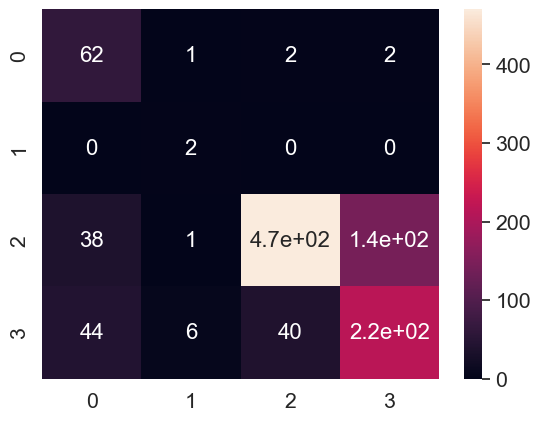

In [18]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [19]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[1279 rows x 2 columns]

In [20]:
df.head()

Filename  \
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                            Category  
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...

In [21]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented         640
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented    448
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented        179
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented     12
Name: Category, dtype: int64

In [22]:
df.shape

(1279, 2)

In [23]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented': 3}


In [24]:
y = le.transform(df['Category'])

In [25]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|                                                  | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 132ms/step


  0%|                                          | 1/1279 [00:00<04:15,  5.00it/s]

1/1 [==============================] - 0s 37ms/step


  0%|                                          | 3/1279 [00:00<02:19,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


  0%|▏                                         | 5/1279 [00:00<02:05, 10.17it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▏                                         | 7/1279 [00:00<01:53, 11.16it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▎                                         | 9/1279 [00:00<01:48, 11.74it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▎                                        | 11/1279 [00:00<01:44, 12.13it/s]

1/1 [==============================] - 0s 37ms/step


  1%|▍                                        | 13/1279 [00:01<01:42, 12.34it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▍                                        | 15/1279 [00:01<01:42, 12.39it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▌                                        | 17/1279 [00:01<01:40, 12.57it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▌                                        | 19/1279 [00:01<01:38, 12.85it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▋                                        | 21/1279 [00:01<01:36, 13.06it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▋                                        | 23/1279 [00:01<01:39, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▊                                        | 25/1279 [00:02<01:38, 12.75it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▊                                        | 27/1279 [00:02<01:39, 12.58it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▉                                        | 29/1279 [00:02<01:37, 12.76it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▉                                        | 31/1279 [00:02<01:37, 12.81it/s]

1/1 [==============================] - 0s 36ms/step


  3%|█                                        | 33/1279 [00:02<01:38, 12.66it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█                                        | 35/1279 [00:02<01:39, 12.53it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▏                                       | 37/1279 [00:03<01:37, 12.71it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▎                                       | 39/1279 [00:03<01:35, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▎                                       | 41/1279 [00:03<01:34, 13.08it/s]

1/1 [==============================] - 0s 36ms/step


  3%|█▍                                       | 43/1279 [00:03<01:32, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▍                                       | 45/1279 [00:03<01:34, 13.10it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                       | 47/1279 [00:03<01:41, 12.19it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                       | 49/1279 [00:03<01:38, 12.47it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▋                                       | 51/1279 [00:04<01:34, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


  4%|█▋                                       | 53/1279 [00:04<01:31, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▊                                       | 55/1279 [00:04<01:31, 13.44it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▊                                       | 57/1279 [00:04<01:28, 13.83it/s]

1/1 [==============================] - 0s 34ms/step


  5%|█▉                                       | 59/1279 [00:04<01:26, 14.17it/s]

1/1 [==============================] - 0s 37ms/step


  5%|█▉                                       | 61/1279 [00:04<01:25, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


  5%|██                                       | 63/1279 [00:04<01:25, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


  5%|██                                       | 65/1279 [00:05<01:27, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██▏                                      | 67/1279 [00:05<01:27, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


  5%|██▏                                      | 69/1279 [00:05<01:34, 12.77it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▎                                      | 71/1279 [00:05<01:31, 13.15it/s]

1/1 [==============================] - 0s 37ms/step


  6%|██▎                                      | 73/1279 [00:05<01:29, 13.40it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▍                                      | 75/1279 [00:05<01:27, 13.77it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▍                                      | 77/1279 [00:05<01:25, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▌                                      | 79/1279 [00:06<01:22, 14.46it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▌                                      | 81/1279 [00:06<01:22, 14.46it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▋                                      | 83/1279 [00:06<01:36, 12.34it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▋                                      | 85/1279 [00:06<01:33, 12.76it/s]

1/1 [==============================] - 0s 45ms/step


  7%|██▊                                      | 87/1279 [00:06<01:33, 12.69it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▊                                      | 89/1279 [00:06<01:33, 12.71it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                      | 91/1279 [00:07<01:29, 13.25it/s]

1/1 [==============================] - 0s 36ms/step


  7%|██▉                                      | 93/1279 [00:07<01:27, 13.49it/s]

1/1 [==============================] - 0s 34ms/step


  7%|███                                      | 95/1279 [00:07<01:25, 13.81it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███                                      | 97/1279 [00:07<01:24, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                     | 99/1279 [00:07<01:23, 14.20it/s]

1/1 [==============================] - 0s 36ms/step


  8%|███▏                                    | 101/1279 [00:07<01:30, 12.95it/s]

1/1 [==============================] - 0s 37ms/step


  8%|███▏                                    | 103/1279 [00:08<01:40, 11.71it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▎                                    | 105/1279 [00:08<01:35, 12.32it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▎                                    | 107/1279 [00:08<01:31, 12.79it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 109/1279 [00:08<01:29, 13.10it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▍                                    | 111/1279 [00:08<01:26, 13.44it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▌                                    | 113/1279 [00:08<01:25, 13.56it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▌                                    | 115/1279 [00:08<01:24, 13.73it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▋                                    | 117/1279 [00:09<01:24, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▋                                    | 119/1279 [00:09<01:24, 13.81it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▊                                    | 121/1279 [00:09<01:22, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 123/1279 [00:09<01:24, 13.69it/s]

1/1 [==============================] - 0s 36ms/step


 10%|███▉                                    | 125/1279 [00:09<01:22, 13.90it/s]

1/1 [==============================] - 0s 39ms/step


 10%|███▉                                    | 127/1279 [00:09<01:22, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████                                    | 129/1279 [00:09<01:29, 12.81it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████                                    | 131/1279 [00:10<01:26, 13.26it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████▏                                   | 133/1279 [00:10<01:24, 13.52it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▏                                   | 135/1279 [00:10<01:24, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▎                                   | 137/1279 [00:10<01:23, 13.70it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▎                                   | 139/1279 [00:10<01:30, 12.67it/s]

1/1 [==============================] - 0s 42ms/step


 11%|████▍                                   | 141/1279 [00:10<01:30, 12.63it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 143/1279 [00:10<01:26, 13.11it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▌                                   | 145/1279 [00:11<01:24, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▌                                   | 147/1279 [00:11<01:32, 12.17it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▋                                   | 149/1279 [00:11<01:29, 12.63it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▋                                   | 151/1279 [00:11<01:25, 13.15it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▊                                   | 153/1279 [00:11<01:24, 13.29it/s]

1/1 [==============================] - 0s 40ms/step


 12%|████▊                                   | 155/1279 [00:11<01:25, 13.21it/s]

1/1 [==============================] - 0s 41ms/step


 12%|████▉                                   | 157/1279 [00:12<01:23, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▉                                   | 159/1279 [00:12<01:24, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████                                   | 161/1279 [00:12<01:22, 13.55it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████                                   | 163/1279 [00:12<01:21, 13.76it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█████▏                                  | 165/1279 [00:12<01:28, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▏                                  | 167/1279 [00:12<01:27, 12.77it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▎                                  | 169/1279 [00:12<01:24, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▎                                  | 171/1279 [00:13<01:21, 13.54it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▍                                  | 173/1279 [00:13<01:21, 13.52it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▍                                  | 175/1279 [00:13<01:20, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 177/1279 [00:13<01:18, 14.04it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 179/1279 [00:13<01:17, 14.15it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▋                                  | 181/1279 [00:13<01:17, 14.14it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▋                                  | 183/1279 [00:13<01:17, 14.19it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▊                                  | 185/1279 [00:14<01:16, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▊                                  | 187/1279 [00:14<01:16, 14.33it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█████▉                                  | 189/1279 [00:14<01:16, 14.19it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▉                                  | 191/1279 [00:14<01:15, 14.37it/s]

1/1 [==============================] - 0s 39ms/step


 15%|██████                                  | 193/1279 [00:14<01:15, 14.31it/s]

1/1 [==============================] - 0s 34ms/step


 15%|██████                                  | 195/1279 [00:14<01:15, 14.28it/s]

1/1 [==============================] - 0s 36ms/step


 15%|██████▏                                 | 197/1279 [00:14<01:15, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▏                                 | 199/1279 [00:15<01:14, 14.42it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▎                                 | 201/1279 [00:15<01:23, 12.96it/s]

1/1 [==============================] - 0s 39ms/step


 16%|██████▎                                 | 203/1279 [00:15<01:22, 13.07it/s]

1/1 [==============================] - 0s 42ms/step


 16%|██████▍                                 | 205/1279 [00:15<01:21, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▍                                 | 207/1279 [00:15<01:20, 13.40it/s]

1/1 [==============================] - 0s 41ms/step


 16%|██████▌                                 | 209/1279 [00:15<01:19, 13.45it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▌                                 | 211/1279 [00:15<01:18, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▋                                 | 213/1279 [00:16<01:18, 13.66it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▋                                 | 215/1279 [00:16<01:24, 12.66it/s]

1/1 [==============================] - 0s 64ms/step


 17%|██████▊                                 | 217/1279 [00:16<01:28, 11.97it/s]

1/1 [==============================] - 0s 37ms/step


 17%|██████▊                                 | 219/1279 [00:16<01:26, 12.28it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▉                                 | 221/1279 [00:16<01:22, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 223/1279 [00:16<01:20, 13.18it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████                                 | 225/1279 [00:17<01:18, 13.38it/s]

1/1 [==============================] - 0s 39ms/step


 18%|███████                                 | 227/1279 [00:17<01:18, 13.36it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████▏                                | 229/1279 [00:17<01:17, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 231/1279 [00:17<01:15, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▎                                | 233/1279 [00:17<01:15, 13.85it/s]

1/1 [==============================] - 0s 37ms/step


 18%|███████▎                                | 235/1279 [00:17<01:23, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▍                                | 237/1279 [00:17<01:20, 12.99it/s]

1/1 [==============================] - 0s 36ms/step


 19%|███████▍                                | 239/1279 [00:18<01:18, 13.24it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▌                                | 241/1279 [00:18<01:17, 13.39it/s]

1/1 [==============================] - 0s 59ms/step


 19%|███████▌                                | 243/1279 [00:18<01:42, 10.08it/s]

1/1 [==============================] - 0s 37ms/step


 19%|███████▋                                | 245/1279 [00:18<01:35, 10.88it/s]

1/1 [==============================] - 0s 39ms/step


 19%|███████▋                                | 247/1279 [00:18<01:28, 11.64it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▊                                | 249/1279 [00:19<01:24, 12.14it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▊                                | 251/1279 [00:19<01:23, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 20%|███████▉                                | 253/1279 [00:19<01:20, 12.81it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▉                                | 255/1279 [00:19<01:19, 12.91it/s]

1/1 [==============================] - 0s 37ms/step


 20%|████████                                | 257/1279 [00:19<01:17, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 20%|████████                                | 259/1279 [00:19<01:15, 13.53it/s]

1/1 [==============================] - 0s 36ms/step


 20%|████████▏                               | 261/1279 [00:19<01:14, 13.59it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▏                               | 263/1279 [00:20<01:14, 13.72it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▎                               | 265/1279 [00:20<01:13, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▎                               | 267/1279 [00:20<01:12, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▍                               | 269/1279 [00:20<01:13, 13.74it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████▍                               | 271/1279 [00:20<01:12, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▌                               | 273/1279 [00:20<01:11, 14.10it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▌                               | 275/1279 [00:20<01:10, 14.22it/s]

1/1 [==============================] - 0s 36ms/step


 22%|████████▋                               | 277/1279 [00:21<01:10, 14.19it/s]

1/1 [==============================] - 0s 39ms/step


 22%|████████▋                               | 279/1279 [00:21<01:18, 12.74it/s]

1/1 [==============================] - 0s 36ms/step


 22%|████████▊                               | 281/1279 [00:21<01:16, 12.99it/s]

1/1 [==============================] - 0s 38ms/step


 22%|████████▊                               | 283/1279 [00:21<01:15, 13.28it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▉                               | 285/1279 [00:21<01:12, 13.67it/s]

1/1 [==============================] - 0s 36ms/step


 22%|████████▉                               | 287/1279 [00:21<01:12, 13.66it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████                               | 289/1279 [00:21<01:10, 13.95it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████                               | 291/1279 [00:22<01:10, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████▏                              | 293/1279 [00:22<01:09, 14.14it/s]

1/1 [==============================] - 0s 55ms/step


 23%|█████████▏                              | 295/1279 [00:22<01:12, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 23%|█████████▎                              | 297/1279 [00:22<01:12, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████▎                              | 299/1279 [00:22<01:10, 13.82it/s]

1/1 [==============================] - 0s 36ms/step


 24%|█████████▍                              | 301/1279 [00:22<01:10, 13.85it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▍                              | 303/1279 [00:22<01:10, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▌                              | 305/1279 [00:23<01:10, 13.74it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▌                              | 307/1279 [00:23<01:11, 13.66it/s]

1/1 [==============================] - 0s 37ms/step


 24%|█████████▋                              | 309/1279 [00:23<01:10, 13.73it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▋                              | 311/1279 [00:23<01:16, 12.71it/s]

1/1 [==============================] - 0s 40ms/step


 24%|█████████▊                              | 313/1279 [00:23<01:14, 12.94it/s]

1/1 [==============================] - 0s 37ms/step


 25%|█████████▊                              | 315/1279 [00:23<01:13, 13.13it/s]

1/1 [==============================] - 0s 37ms/step


 25%|█████████▉                              | 317/1279 [00:24<01:11, 13.38it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▉                              | 319/1279 [00:24<01:10, 13.69it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██████████                              | 321/1279 [00:24<01:09, 13.71it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██████████                              | 323/1279 [00:24<01:09, 13.76it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██████████▏                             | 325/1279 [00:24<01:08, 13.90it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██████████▏                             | 327/1279 [00:24<01:15, 12.63it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██████████▎                             | 329/1279 [00:24<01:16, 12.38it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▎                             | 331/1279 [00:25<01:13, 12.90it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▍                             | 333/1279 [00:25<01:18, 12.02it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▍                             | 335/1279 [00:25<01:14, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▌                             | 337/1279 [00:25<01:12, 12.96it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▌                             | 339/1279 [00:25<01:10, 13.43it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██████████▋                             | 341/1279 [00:25<01:08, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▋                             | 343/1279 [00:25<01:07, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▊                             | 345/1279 [00:26<01:06, 13.99it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▊                             | 347/1279 [00:26<01:05, 14.13it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▉                             | 349/1279 [00:26<01:04, 14.41it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██████████▉                             | 351/1279 [00:26<01:07, 13.71it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                             | 353/1279 [00:26<01:11, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


 28%|███████████                             | 355/1279 [00:26<01:09, 13.24it/s]

1/1 [==============================] - 0s 46ms/step


 28%|███████████▏                            | 357/1279 [00:27<01:09, 13.18it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████▏                            | 359/1279 [00:27<01:11, 12.85it/s]

1/1 [==============================] - 0s 37ms/step


 28%|███████████▎                            | 361/1279 [00:27<01:10, 13.10it/s]

1/1 [==============================] - 0s 35ms/step


 28%|███████████▎                            | 363/1279 [00:27<01:07, 13.51it/s]

1/1 [==============================] - 0s 38ms/step


 29%|███████████▍                            | 365/1279 [00:27<01:07, 13.63it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                            | 367/1279 [00:27<01:05, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▌                            | 369/1279 [00:27<01:05, 13.94it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▌                            | 371/1279 [00:28<01:04, 14.04it/s]

1/1 [==============================] - 0s 38ms/step


 29%|███████████▋                            | 373/1279 [00:28<01:04, 14.15it/s]

1/1 [==============================] - 0s 39ms/step


 29%|███████████▋                            | 375/1279 [00:28<01:08, 13.12it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▊                            | 377/1279 [00:28<01:08, 13.08it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███████████▊                            | 379/1279 [00:28<01:13, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▉                            | 381/1279 [00:28<01:10, 12.71it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▉                            | 383/1279 [00:29<01:15, 11.84it/s]

1/1 [==============================] - 0s 38ms/step


 30%|████████████                            | 385/1279 [00:29<01:16, 11.71it/s]

1/1 [==============================] - 0s 35ms/step


 30%|████████████                            | 387/1279 [00:29<01:12, 12.34it/s]

1/1 [==============================] - 0s 45ms/step


 30%|████████████▏                           | 389/1279 [00:29<01:10, 12.69it/s]

1/1 [==============================] - 0s 37ms/step


 31%|████████████▏                           | 391/1279 [00:29<01:08, 12.90it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▎                           | 393/1279 [00:29<01:14, 11.96it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▎                           | 395/1279 [00:29<01:11, 12.44it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▍                           | 397/1279 [00:30<01:07, 13.00it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████▍                           | 399/1279 [00:30<01:05, 13.35it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▌                           | 401/1279 [00:30<01:03, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▌                           | 403/1279 [00:30<01:03, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▋                           | 405/1279 [00:30<01:03, 13.82it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████▋                           | 407/1279 [00:30<01:02, 14.02it/s]

1/1 [==============================] - 0s 39ms/step


 32%|████████████▊                           | 409/1279 [00:31<01:07, 12.86it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▊                           | 411/1279 [00:31<01:07, 12.94it/s]

1/1 [==============================] - 0s 38ms/step


 32%|████████████▉                           | 413/1279 [00:31<01:05, 13.23it/s]

1/1 [==============================] - 0s 39ms/step


 32%|████████████▉                           | 415/1279 [00:31<01:04, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████                           | 417/1279 [00:31<01:02, 13.81it/s]

1/1 [==============================] - 0s 37ms/step


 33%|█████████████                           | 419/1279 [00:31<01:02, 13.66it/s]

1/1 [==============================] - 0s 36ms/step


 33%|█████████████▏                          | 421/1279 [00:31<01:02, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████▏                          | 423/1279 [00:32<01:02, 13.77it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████▎                          | 425/1279 [00:32<01:03, 13.43it/s]

1/1 [==============================] - 0s 35ms/step


 33%|█████████████▎                          | 427/1279 [00:32<01:02, 13.72it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████▍                          | 429/1279 [00:32<01:01, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▍                          | 431/1279 [00:32<01:01, 13.89it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▌                          | 433/1279 [00:32<01:02, 13.51it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▌                          | 435/1279 [00:32<01:08, 12.36it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▋                          | 437/1279 [00:33<01:06, 12.68it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▋                          | 439/1279 [00:33<01:04, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


 34%|█████████████▊                          | 441/1279 [00:33<01:03, 13.10it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▊                          | 443/1279 [00:33<01:02, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▉                          | 445/1279 [00:33<01:00, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▉                          | 447/1279 [00:33<01:01, 13.50it/s]

1/1 [==============================] - 0s 37ms/step


 35%|██████████████                          | 449/1279 [00:33<01:01, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


 35%|██████████████                          | 451/1279 [00:34<01:05, 12.64it/s]

1/1 [==============================] - 0s 37ms/step


 35%|██████████████▏                         | 453/1279 [00:34<01:04, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▏                         | 455/1279 [00:34<01:02, 13.20it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████▎                         | 457/1279 [00:34<01:07, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 36%|██████████████▎                         | 459/1279 [00:34<01:05, 12.43it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▍                         | 461/1279 [00:34<01:04, 12.67it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▍                         | 463/1279 [00:35<01:01, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▌                         | 465/1279 [00:35<00:59, 13.57it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                         | 467/1279 [00:35<00:59, 13.61it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▋                         | 469/1279 [00:35<00:59, 13.73it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▋                         | 471/1279 [00:35<00:59, 13.68it/s]

1/1 [==============================] - 0s 38ms/step


 37%|██████████████▊                         | 473/1279 [00:35<00:58, 13.80it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▊                         | 475/1279 [00:35<00:57, 13.96it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▉                         | 477/1279 [00:36<00:57, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▉                         | 479/1279 [00:36<00:57, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███████████████                         | 481/1279 [00:36<00:56, 14.06it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███████████████                         | 483/1279 [00:36<01:02, 12.77it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███████████████▏                        | 485/1279 [00:36<01:06, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███████████████▏                        | 487/1279 [00:36<01:11, 11.07it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███████████████▎                        | 489/1279 [00:37<01:07, 11.63it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███████████████▎                        | 491/1279 [00:37<01:10, 11.11it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▍                        | 493/1279 [00:37<01:12, 10.91it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▍                        | 495/1279 [00:37<01:07, 11.62it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▌                        | 497/1279 [00:37<01:03, 12.24it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▌                        | 499/1279 [00:37<01:01, 12.71it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▋                        | 501/1279 [00:38<00:58, 13.22it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███████████████▋                        | 503/1279 [00:38<00:58, 13.37it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▊                        | 505/1279 [00:38<00:56, 13.72it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███████████████▊                        | 507/1279 [00:38<00:56, 13.67it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▉                        | 509/1279 [00:38<00:55, 13.98it/s]

1/1 [==============================] - 0s 42ms/step


 40%|███████████████▉                        | 511/1279 [00:38<00:56, 13.58it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████████████████                        | 513/1279 [00:38<00:56, 13.55it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████████████████                        | 515/1279 [00:39<00:57, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


 40%|████████████████▏                       | 517/1279 [00:39<00:56, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████████████████▏                       | 519/1279 [00:39<00:57, 13.15it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████▎                       | 521/1279 [00:39<00:57, 13.21it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████████████████▎                       | 523/1279 [00:39<00:56, 13.44it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████▍                       | 525/1279 [00:39<01:00, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████████████████▍                       | 527/1279 [00:40<00:57, 13.00it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████████████████▌                       | 529/1279 [00:40<00:57, 13.14it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████████████████▌                       | 531/1279 [00:40<00:57, 12.99it/s]

1/1 [==============================] - 0s 35ms/step
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  15.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  14.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  13.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total t

 42%|████████████████▋                       | 533/1279 [00:40<01:04, 11.64it/s]

=1, min_samples_split=5, n_estimators=600; total time=  11.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 5.0min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 5.2min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 5.2min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 2.9min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 3.1min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 3.1min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=6

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▋                       | 535/1279 [00:40<01:05, 11.35it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████████████████▊                       | 537/1279 [00:40<01:01, 12.13it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▊                       | 539/1279 [00:41<00:58, 12.67it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▉                       | 541/1279 [00:41<00:56, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▉                       | 543/1279 [00:41<00:58, 12.55it/s]

1/1 [==============================] - 0s 35ms/step


 43%|█████████████████                       | 545/1279 [00:41<00:56, 12.99it/s]

1/1 [==============================] - 0s 34ms/step


 43%|█████████████████                       | 547/1279 [00:41<00:55, 13.15it/s]

1/1 [==============================] - 0s 35ms/step


 43%|█████████████████▏                      | 549/1279 [00:41<00:54, 13.41it/s]

1/1 [==============================] - 0s 39ms/step


 43%|█████████████████▏                      | 551/1279 [00:41<00:54, 13.28it/s]

1/1 [==============================] - 0s 38ms/step


 43%|█████████████████▎                      | 553/1279 [00:42<00:53, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 43%|█████████████████▎                      | 555/1279 [00:42<00:52, 13.76it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▍                      | 557/1279 [00:42<00:52, 13.81it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▍                      | 559/1279 [00:42<00:52, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▌                      | 561/1279 [00:42<00:52, 13.70it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▌                      | 563/1279 [00:42<00:51, 13.80it/s]

1/1 [==============================] - 0s 36ms/step


 44%|█████████████████▋                      | 565/1279 [00:42<00:51, 13.99it/s]

1/1 [==============================] - 0s 40ms/step


 44%|█████████████████▋                      | 567/1279 [00:43<00:51, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▊                      | 569/1279 [00:43<00:51, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▊                      | 571/1279 [00:43<00:50, 14.01it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▉                      | 573/1279 [00:43<00:50, 14.12it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▉                      | 575/1279 [00:43<00:50, 14.03it/s]

1/1 [==============================] - 0s 35ms/step


 45%|██████████████████                      | 577/1279 [00:43<00:49, 14.11it/s]

1/1 [==============================] - 0s 37ms/step


 45%|██████████████████                      | 579/1279 [00:43<00:49, 14.20it/s]

1/1 [==============================] - 0s 36ms/step


 45%|██████████████████▏                     | 581/1279 [00:44<00:53, 13.14it/s]

1/1 [==============================] - 0s 37ms/step


 46%|██████████████████▏                     | 583/1279 [00:44<00:52, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████▎                     | 585/1279 [00:44<00:51, 13.44it/s]

1/1 [==============================] - 0s 39ms/step


 46%|██████████████████▎                     | 587/1279 [00:44<00:56, 12.17it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████▍                     | 589/1279 [00:44<00:59, 11.69it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████▍                     | 591/1279 [00:44<00:55, 12.42it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████▌                     | 593/1279 [00:45<00:53, 12.83it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▌                     | 595/1279 [00:45<00:51, 13.16it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▋                     | 597/1279 [00:45<00:50, 13.39it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▋                     | 599/1279 [00:45<00:49, 13.62it/s]

1/1 [==============================] - 0s 52ms/step


 47%|██████████████████▊                     | 601/1279 [00:45<01:00, 11.19it/s]

1/1 [==============================] - 0s 42ms/step


 47%|██████████████████▊                     | 603/1279 [00:45<01:07, 10.08it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▉                     | 605/1279 [00:46<01:00, 11.08it/s]

1/1 [==============================] - 0s 40ms/step


 47%|██████████████████▉                     | 607/1279 [00:46<00:58, 11.58it/s]

1/1 [==============================] - 0s 36ms/step


 48%|███████████████████                     | 609/1279 [00:46<00:55, 12.16it/s]

1/1 [==============================] - 0s 34ms/step


 48%|███████████████████                     | 611/1279 [00:46<00:53, 12.49it/s]

1/1 [==============================] - 0s 36ms/step


 48%|███████████████████▏                    | 613/1279 [00:46<00:51, 12.93it/s]

1/1 [==============================] - 0s 54ms/step


 48%|███████████████████▏                    | 615/1279 [00:46<00:53, 12.31it/s]

1/1 [==============================] - 0s 35ms/step


 48%|███████████████████▎                    | 617/1279 [00:47<00:56, 11.68it/s]

1/1 [==============================] - 0s 38ms/step


 48%|███████████████████▎                    | 619/1279 [00:47<00:54, 12.08it/s]

1/1 [==============================] - 0s 35ms/step


 49%|███████████████████▍                    | 621/1279 [00:47<00:52, 12.45it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▍                    | 623/1279 [00:47<00:50, 12.94it/s]

1/1 [==============================] - 0s 38ms/step


 49%|███████████████████▌                    | 625/1279 [00:47<00:49, 13.26it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▌                    | 627/1279 [00:47<00:47, 13.60it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▋                    | 629/1279 [00:47<00:47, 13.72it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▋                    | 631/1279 [00:48<00:46, 13.95it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▊                    | 633/1279 [00:48<00:46, 13.78it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▊                    | 635/1279 [00:48<00:46, 13.90it/s]

1/1 [==============================] - 0s 38ms/step


 50%|███████████████████▉                    | 637/1279 [00:48<00:45, 13.98it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▉                    | 639/1279 [00:48<00:45, 14.09it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████████████████████                    | 641/1279 [00:48<00:49, 12.79it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████████████████████                    | 643/1279 [00:48<00:48, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████████████████████▏                   | 645/1279 [00:49<00:48, 13.03it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████▏                   | 647/1279 [00:49<00:48, 13.15it/s]

1/1 [==============================] - 0s 33ms/step


 51%|████████████████████▎                   | 649/1279 [00:49<00:46, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████▎                   | 651/1279 [00:49<00:46, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████▍                   | 653/1279 [00:49<00:44, 13.91it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████▍                   | 655/1279 [00:49<00:48, 12.81it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████▌                   | 657/1279 [00:50<00:47, 13.07it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▌                   | 659/1279 [00:50<00:51, 12.08it/s]

1/1 [==============================] - 0s 36ms/step


 52%|████████████████████▋                   | 661/1279 [00:50<00:49, 12.38it/s]

1/1 [==============================] - 0s 38ms/step


 52%|████████████████████▋                   | 663/1279 [00:50<00:48, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▊                   | 665/1279 [00:50<00:46, 13.07it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▊                   | 667/1279 [00:50<00:50, 12.12it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▉                   | 669/1279 [00:50<00:48, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▉                   | 671/1279 [00:51<00:47, 12.90it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████████████████████                   | 673/1279 [00:51<00:45, 13.23it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████                   | 675/1279 [00:51<00:45, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████▏                  | 677/1279 [00:51<00:43, 13.73it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████████████████████▏                  | 679/1279 [00:51<00:43, 13.90it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████████████████████▎                  | 681/1279 [00:51<00:47, 12.51it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████▎                  | 683/1279 [00:52<00:46, 12.80it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████▍                  | 685/1279 [00:52<00:45, 13.04it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▍                  | 687/1279 [00:52<00:43, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▌                  | 689/1279 [00:52<00:42, 13.81it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████▌                  | 691/1279 [00:52<00:42, 13.75it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▋                  | 693/1279 [00:52<00:43, 13.62it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▋                  | 695/1279 [00:52<00:42, 13.85it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████████████████████▊                  | 697/1279 [00:53<00:41, 13.91it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▊                  | 699/1279 [00:53<00:41, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▉                  | 701/1279 [00:53<00:41, 14.08it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▉                  | 703/1279 [00:53<00:41, 13.98it/s]

1/1 [==============================] - 0s 34ms/step


 55%|██████████████████████                  | 705/1279 [00:53<00:41, 13.97it/s]

1/1 [==============================] - 0s 36ms/step


 55%|██████████████████████                  | 707/1279 [00:53<00:40, 14.02it/s]

1/1 [==============================] - 0s 44ms/step


 55%|██████████████████████▏                 | 709/1279 [00:53<00:41, 13.81it/s]

1/1 [==============================] - 0s 34ms/step


 56%|██████████████████████▏                 | 711/1279 [00:54<00:41, 13.82it/s]

1/1 [==============================] - 0s 35ms/step


 56%|██████████████████████▎                 | 713/1279 [00:54<00:41, 13.76it/s]

1/1 [==============================] - 0s 35ms/step


 56%|██████████████████████▎                 | 715/1279 [00:54<00:40, 13.91it/s]

1/1 [==============================] - 0s 35ms/step


 56%|██████████████████████▍                 | 717/1279 [00:54<00:40, 14.02it/s]

1/1 [==============================] - 0s 36ms/step


 56%|██████████████████████▍                 | 719/1279 [00:54<00:39, 14.02it/s]

1/1 [==============================] - 0s 35ms/step


 56%|██████████████████████▌                 | 721/1279 [00:54<00:39, 14.20it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▌                 | 723/1279 [00:54<00:39, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▋                 | 725/1279 [00:55<00:38, 14.23it/s]

1/1 [==============================] - 0s 36ms/step


 57%|██████████████████████▋                 | 727/1279 [00:55<00:38, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▊                 | 729/1279 [00:55<00:38, 14.22it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▊                 | 731/1279 [00:55<00:38, 14.33it/s]

1/1 [==============================] - 0s 41ms/step


 57%|██████████████████████▉                 | 733/1279 [00:55<00:38, 14.23it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▉                 | 735/1279 [00:55<00:38, 14.28it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████                 | 737/1279 [00:55<00:38, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 58%|███████████████████████                 | 739/1279 [00:56<00:37, 14.22it/s]

1/1 [==============================] - 0s 36ms/step


 58%|███████████████████████▏                | 741/1279 [00:56<00:41, 12.94it/s]

1/1 [==============================] - 0s 39ms/step


 58%|███████████████████████▏                | 743/1279 [00:56<00:41, 13.01it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████▎                | 745/1279 [00:56<00:43, 12.19it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████▎                | 747/1279 [00:56<00:42, 12.44it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████▍                | 749/1279 [00:56<00:41, 12.86it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████▍                | 751/1279 [00:57<00:43, 12.14it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████▌                | 753/1279 [00:57<00:41, 12.57it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████▌                | 755/1279 [00:57<00:41, 12.61it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████▋                | 757/1279 [00:57<00:39, 13.06it/s]

1/1 [==============================] - 0s 39ms/step


 59%|███████████████████████▋                | 759/1279 [00:57<00:39, 13.26it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████▊                | 761/1279 [00:57<00:38, 13.54it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▊                | 763/1279 [00:57<00:37, 13.75it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▉                | 765/1279 [00:58<00:37, 13.81it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▉                | 767/1279 [00:58<00:36, 13.89it/s]

1/1 [==============================] - 0s 35ms/step


 60%|████████████████████████                | 769/1279 [00:58<00:37, 13.49it/s]

1/1 [==============================] - 0s 34ms/step


 60%|████████████████████████                | 771/1279 [00:58<00:37, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 60%|████████████████████████▏               | 773/1279 [00:58<00:37, 13.55it/s]

1/1 [==============================] - 0s 34ms/step


 61%|████████████████████████▏               | 775/1279 [00:58<00:40, 12.30it/s]

1/1 [==============================] - 0s 34ms/step


 61%|████████████████████████▎               | 777/1279 [00:58<00:39, 12.70it/s]

1/1 [==============================] - 0s 36ms/step


 61%|████████████████████████▎               | 779/1279 [00:59<00:38, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 61%|████████████████████████▍               | 781/1279 [00:59<00:37, 13.18it/s]

1/1 [==============================] - 0s 35ms/step


 61%|████████████████████████▍               | 783/1279 [00:59<00:40, 12.12it/s]

1/1 [==============================] - 0s 35ms/step


 61%|████████████████████████▌               | 785/1279 [00:59<00:40, 12.28it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▌               | 787/1279 [00:59<00:42, 11.65it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▋               | 789/1279 [00:59<00:40, 12.15it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▋               | 791/1279 [01:00<00:38, 12.53it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████▊               | 793/1279 [01:00<00:52,  9.28it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▊               | 795/1279 [01:00<00:46, 10.31it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████▉               | 797/1279 [01:00<00:43, 11.08it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▉               | 799/1279 [01:00<00:40, 11.90it/s]

1/1 [==============================] - 0s 33ms/step


 63%|█████████████████████████               | 801/1279 [01:01<00:38, 12.45it/s]

1/1 [==============================] - 0s 36ms/step


 63%|█████████████████████████               | 803/1279 [01:01<00:37, 12.83it/s]

1/1 [==============================] - 0s 33ms/step


 63%|█████████████████████████▏              | 805/1279 [01:01<00:39, 12.11it/s]

1/1 [==============================] - 0s 35ms/step


 63%|█████████████████████████▏              | 807/1279 [01:01<00:37, 12.51it/s]

1/1 [==============================] - 0s 36ms/step


 63%|█████████████████████████▎              | 809/1279 [01:01<00:36, 12.97it/s]

1/1 [==============================] - 0s 37ms/step


 63%|█████████████████████████▎              | 811/1279 [01:01<00:35, 13.14it/s]

1/1 [==============================] - 0s 35ms/step


 64%|█████████████████████████▍              | 813/1279 [01:01<00:34, 13.60it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████▍              | 815/1279 [01:02<00:34, 13.61it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████▌              | 817/1279 [01:02<00:33, 13.64it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████▌              | 819/1279 [01:02<00:36, 12.50it/s]

1/1 [==============================] - 0s 38ms/step


 64%|█████████████████████████▋              | 821/1279 [01:02<00:35, 12.92it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████▋              | 823/1279 [01:02<00:34, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▊              | 825/1279 [01:02<00:33, 13.53it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▊              | 827/1279 [01:02<00:33, 13.64it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▉              | 829/1279 [01:03<00:32, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▉              | 831/1279 [01:03<00:32, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████████████████████████              | 833/1279 [01:03<00:32, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████████████████████████              | 835/1279 [01:03<00:33, 13.45it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████████████████████████▏             | 837/1279 [01:03<00:33, 13.34it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████████████████████████▏             | 839/1279 [01:03<00:32, 13.56it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████████████████████████▎             | 841/1279 [01:04<00:32, 13.61it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████████████████████████▎             | 843/1279 [01:04<00:32, 13.48it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▍             | 845/1279 [01:04<00:31, 13.56it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▍             | 847/1279 [01:04<00:31, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████████████████████████▌             | 849/1279 [01:04<00:31, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▌             | 851/1279 [01:04<00:30, 13.86it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▋             | 853/1279 [01:04<00:33, 12.66it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▋             | 855/1279 [01:05<00:32, 13.00it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████▊             | 857/1279 [01:05<00:32, 13.06it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████████████████████████▊             | 859/1279 [01:05<00:31, 13.13it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████████████████████████▉             | 861/1279 [01:05<00:31, 13.40it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▉             | 863/1279 [01:05<00:30, 13.74it/s]

1/1 [==============================] - 0s 35ms/step


 68%|███████████████████████████             | 865/1279 [01:05<00:30, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 68%|███████████████████████████             | 867/1279 [01:05<00:30, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 68%|███████████████████████████▏            | 869/1279 [01:06<00:29, 13.67it/s]

1/1 [==============================] - 0s 39ms/step


 68%|███████████████████████████▏            | 871/1279 [01:06<00:32, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 68%|███████████████████████████▎            | 873/1279 [01:06<00:31, 12.75it/s]

1/1 [==============================] - 0s 36ms/step


 68%|███████████████████████████▎            | 875/1279 [01:06<00:31, 13.02it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████▍            | 877/1279 [01:06<00:30, 13.38it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████▍            | 879/1279 [01:06<00:29, 13.40it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████▌            | 881/1279 [01:07<00:29, 13.58it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████▌            | 883/1279 [01:07<00:35, 11.28it/s]

1/1 [==============================] - 0s 35ms/step


 69%|███████████████████████████▋            | 885/1279 [01:07<00:32, 12.00it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████▋            | 887/1279 [01:07<00:31, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▊            | 889/1279 [01:07<00:32, 11.94it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▊            | 891/1279 [01:07<00:31, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▉            | 893/1279 [01:08<00:30, 12.60it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▉            | 895/1279 [01:08<00:29, 12.82it/s]

1/1 [==============================] - 0s 39ms/step


 70%|████████████████████████████            | 897/1279 [01:08<00:29, 13.05it/s]

1/1 [==============================] - 0s 34ms/step


 70%|████████████████████████████            | 899/1279 [01:08<00:28, 13.40it/s]

1/1 [==============================] - 0s 34ms/step


 70%|████████████████████████████▏           | 901/1279 [01:08<00:27, 13.50it/s]

1/1 [==============================] - 0s 35ms/step


 71%|████████████████████████████▏           | 903/1279 [01:08<00:27, 13.61it/s]

1/1 [==============================] - 0s 35ms/step


 71%|████████████████████████████▎           | 905/1279 [01:08<00:26, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 71%|████████████████████████████▎           | 907/1279 [01:09<00:26, 13.97it/s]

1/1 [==============================] - 0s 38ms/step


 71%|████████████████████████████▍           | 909/1279 [01:09<00:27, 13.50it/s]

1/1 [==============================] - 0s 36ms/step


 71%|████████████████████████████▍           | 911/1279 [01:09<00:26, 13.67it/s]

1/1 [==============================] - 0s 35ms/step


 71%|████████████████████████████▌           | 913/1279 [01:09<00:26, 13.62it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▌           | 915/1279 [01:09<00:29, 12.49it/s]

1/1 [==============================] - 0s 34ms/step


 72%|████████████████████████████▋           | 917/1279 [01:09<00:28, 12.83it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▋           | 919/1279 [01:09<00:27, 13.12it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▊           | 921/1279 [01:10<00:27, 13.23it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▊           | 923/1279 [01:10<00:28, 12.43it/s]

1/1 [==============================] - 0s 39ms/step


 72%|████████████████████████████▉           | 925/1279 [01:10<00:27, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▉           | 927/1279 [01:10<00:30, 11.61it/s]

1/1 [==============================] - 0s 38ms/step


 73%|█████████████████████████████           | 929/1279 [01:10<00:29, 11.95it/s]

1/1 [==============================] - 0s 34ms/step


 73%|█████████████████████████████           | 931/1279 [01:11<00:30, 11.57it/s]

1/1 [==============================] - 0s 34ms/step


 73%|█████████████████████████████▏          | 933/1279 [01:11<00:28, 12.13it/s]

1/1 [==============================] - 0s 38ms/step


 73%|█████████████████████████████▏          | 935/1279 [01:11<00:27, 12.64it/s]

1/1 [==============================] - 0s 42ms/step


 73%|█████████████████████████████▎          | 937/1279 [01:11<00:26, 12.99it/s]

1/1 [==============================] - 0s 40ms/step


 73%|█████████████████████████████▎          | 939/1279 [01:11<00:26, 12.61it/s]

1/1 [==============================] - 0s 35ms/step


 74%|█████████████████████████████▍          | 941/1279 [01:11<00:25, 13.15it/s]

1/1 [==============================] - 0s 36ms/step


 74%|█████████████████████████████▍          | 943/1279 [01:11<00:25, 13.36it/s]

1/1 [==============================] - 0s 37ms/step


 74%|█████████████████████████████▌          | 945/1279 [01:12<00:25, 13.36it/s]

1/1 [==============================] - 0s 35ms/step


 74%|█████████████████████████████▌          | 947/1279 [01:12<00:24, 13.40it/s]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████▋          | 949/1279 [01:12<00:26, 12.49it/s]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████▋          | 951/1279 [01:12<00:25, 12.99it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████▊          | 953/1279 [01:12<00:24, 13.31it/s]

1/1 [==============================] - 0s 35ms/step


 75%|█████████████████████████████▊          | 955/1279 [01:12<00:23, 13.54it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▉          | 957/1279 [01:12<00:25, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▉          | 959/1279 [01:13<00:25, 12.79it/s]

1/1 [==============================] - 0s 36ms/step


 75%|██████████████████████████████          | 961/1279 [01:13<00:24, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 75%|██████████████████████████████          | 963/1279 [01:13<00:23, 13.21it/s]

1/1 [==============================] - 0s 34ms/step


 75%|██████████████████████████████▏         | 965/1279 [01:13<00:23, 13.49it/s]

1/1 [==============================] - 0s 35ms/step


 76%|██████████████████████████████▏         | 967/1279 [01:13<00:24, 12.65it/s]

1/1 [==============================] - 0s 37ms/step


 76%|██████████████████████████████▎         | 969/1279 [01:13<00:24, 12.66it/s]

1/1 [==============================] - 0s 37ms/step


 76%|██████████████████████████████▎         | 971/1279 [01:14<00:25, 11.87it/s]

1/1 [==============================] - 0s 38ms/step


 76%|██████████████████████████████▍         | 973/1279 [01:14<00:24, 12.32it/s]

1/1 [==============================] - 0s 37ms/step


 76%|██████████████████████████████▍         | 975/1279 [01:14<00:23, 12.79it/s]

1/1 [==============================] - 0s 38ms/step


 76%|██████████████████████████████▌         | 977/1279 [01:14<00:25, 11.79it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▌         | 979/1279 [01:14<00:24, 12.44it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▋         | 981/1279 [01:14<00:23, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▋         | 983/1279 [01:15<00:25, 11.83it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▊         | 985/1279 [01:15<00:23, 12.30it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████▊         | 987/1279 [01:15<00:22, 12.76it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████▉         | 989/1279 [01:15<00:21, 13.33it/s]

1/1 [==============================] - 0s 38ms/step


 77%|██████████████████████████████▉         | 991/1279 [01:15<00:21, 13.51it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████████████████████████████         | 993/1279 [01:15<00:20, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████         | 995/1279 [01:15<00:20, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████▏        | 997/1279 [01:16<00:20, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████▏        | 999/1279 [01:16<00:20, 13.87it/s]

1/1 [==============================] - 0s 49ms/step


 78%|██████████████████████████████▌        | 1001/1279 [01:16<00:20, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▌        | 1003/1279 [01:16<00:19, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 79%|██████████████████████████████▋        | 1005/1279 [01:16<00:19, 13.83it/s]

1/1 [==============================] - 0s 39ms/step


 79%|██████████████████████████████▋        | 1007/1279 [01:16<00:21, 12.68it/s]

1/1 [==============================] - 0s 34ms/step


 79%|██████████████████████████████▊        | 1009/1279 [01:17<00:22, 11.81it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▊        | 1011/1279 [01:17<00:22, 12.11it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▉        | 1013/1279 [01:17<00:22, 11.75it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▉        | 1015/1279 [01:17<00:21, 12.15it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████        | 1017/1279 [01:17<00:20, 12.52it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 1019/1279 [01:17<00:20, 12.85it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████████████████████████████▏       | 1021/1279 [01:17<00:19, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▏       | 1023/1279 [01:18<00:19, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▎       | 1025/1279 [01:18<00:18, 13.45it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▎       | 1027/1279 [01:18<00:18, 13.48it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▍       | 1029/1279 [01:18<00:18, 13.40it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▍       | 1031/1279 [01:18<00:18, 13.35it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▍       | 1033/1279 [01:18<00:19, 12.52it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▌       | 1035/1279 [01:19<00:18, 12.85it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▌       | 1037/1279 [01:19<00:19, 12.14it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 1039/1279 [01:19<00:18, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▋       | 1041/1279 [01:19<00:18, 13.16it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 1043/1279 [01:19<00:17, 13.43it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 1045/1279 [01:19<00:19, 12.00it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 1047/1279 [01:20<00:18, 12.27it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▉       | 1049/1279 [01:20<00:18, 12.72it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 1051/1279 [01:20<00:17, 12.99it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████       | 1053/1279 [01:20<00:16, 13.36it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████████████████████████████▏      | 1055/1279 [01:20<00:16, 13.41it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▏      | 1057/1279 [01:20<00:16, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▎      | 1059/1279 [01:20<00:15, 13.83it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▎      | 1061/1279 [01:21<00:15, 13.79it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▍      | 1063/1279 [01:21<00:15, 13.80it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▍      | 1065/1279 [01:21<00:15, 13.81it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▌      | 1067/1279 [01:21<00:15, 13.62it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▌      | 1069/1279 [01:21<00:15, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▋      | 1071/1279 [01:21<00:15, 13.35it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████████████████████████████▋      | 1073/1279 [01:21<00:15, 13.42it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████████████████████████████▊      | 1075/1279 [01:22<00:15, 13.50it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████████████████████████████▊      | 1077/1279 [01:22<00:16, 12.22it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████████████████████████████▉      | 1079/1279 [01:22<00:17, 11.44it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████████████████████████████▉      | 1081/1279 [01:22<00:16, 11.75it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████      | 1083/1279 [01:22<00:17, 11.12it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 1085/1279 [01:22<00:16, 11.75it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▏     | 1087/1279 [01:23<00:15, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████▏     | 1089/1279 [01:23<00:15, 12.53it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▎     | 1091/1279 [01:23<00:14, 12.65it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▎     | 1093/1279 [01:23<00:14, 13.14it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▍     | 1095/1279 [01:23<00:15, 12.03it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▍     | 1097/1279 [01:23<00:14, 12.54it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▌     | 1099/1279 [01:24<00:14, 12.82it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▌     | 1101/1279 [01:24<00:13, 13.03it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▋     | 1103/1279 [01:24<00:14, 12.03it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▋     | 1105/1279 [01:24<00:13, 12.47it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▊     | 1107/1279 [01:24<00:13, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▊     | 1109/1279 [01:24<00:12, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▉     | 1111/1279 [01:24<00:12, 13.52it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▉     | 1113/1279 [01:25<00:12, 13.68it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▉     | 1115/1279 [01:25<00:11, 13.96it/s]

1/1 [==============================] - 0s 39ms/step


 87%|██████████████████████████████████     | 1117/1279 [01:25<00:11, 13.90it/s]

1/1 [==============================] - 0s 41ms/step


 87%|██████████████████████████████████     | 1119/1279 [01:25<00:12, 13.27it/s]

1/1 [==============================] - 0s 39ms/step


 88%|██████████████████████████████████▏    | 1121/1279 [01:25<00:11, 13.27it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▏    | 1123/1279 [01:25<00:11, 13.56it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▎    | 1125/1279 [01:25<00:11, 13.51it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▎    | 1127/1279 [01:26<00:11, 13.58it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▍    | 1129/1279 [01:26<00:10, 13.72it/s]

1/1 [==============================] - 0s 98ms/step


 88%|██████████████████████████████████▍    | 1131/1279 [01:26<00:13, 11.14it/s]

1/1 [==============================] - 0s 56ms/step


 89%|██████████████████████████████████▌    | 1133/1279 [01:26<00:14,  9.83it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▌    | 1135/1279 [01:26<00:13, 10.61it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▋    | 1137/1279 [01:27<00:12, 11.41it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▋    | 1139/1279 [01:27<00:11, 11.93it/s]

1/1 [==============================] - 0s 49ms/step


 89%|██████████████████████████████████▊    | 1141/1279 [01:27<00:11, 11.81it/s]

1/1 [==============================] - 0s 36ms/step


 89%|██████████████████████████████████▊    | 1143/1279 [01:27<00:11, 12.11it/s]

1/1 [==============================] - 0s 40ms/step


 90%|██████████████████████████████████▉    | 1145/1279 [01:27<00:10, 12.49it/s]

1/1 [==============================] - 0s 35ms/step


 90%|██████████████████████████████████▉    | 1147/1279 [01:27<00:10, 12.84it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████    | 1149/1279 [01:28<00:10, 12.92it/s]

1/1 [==============================] - 0s 41ms/step


 90%|███████████████████████████████████    | 1151/1279 [01:28<00:10, 12.10it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▏   | 1153/1279 [01:28<00:10, 12.34it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████▏   | 1155/1279 [01:28<00:09, 12.70it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▎   | 1157/1279 [01:28<00:10, 12.02it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▎   | 1159/1279 [01:28<00:09, 12.38it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▍   | 1161/1279 [01:29<00:09, 12.60it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▍   | 1163/1279 [01:29<00:09, 11.81it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▌   | 1165/1279 [01:29<00:09, 12.17it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▌   | 1167/1279 [01:29<00:08, 12.63it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▋   | 1169/1279 [01:29<00:09, 11.80it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▋   | 1171/1279 [01:29<00:08, 12.40it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▊   | 1173/1279 [01:29<00:08, 12.84it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 1175/1279 [01:30<00:08, 12.24it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▉   | 1177/1279 [01:30<00:08, 12.61it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▉   | 1179/1279 [01:30<00:07, 13.07it/s]

1/1 [==============================] - 0s 35ms/step


 92%|████████████████████████████████████   | 1181/1279 [01:30<00:07, 12.31it/s]

1/1 [==============================] - 0s 42ms/step


 92%|████████████████████████████████████   | 1183/1279 [01:30<00:07, 12.56it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▏  | 1185/1279 [01:30<00:07, 13.12it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▏  | 1187/1279 [01:31<00:06, 13.42it/s]

1/1 [==============================] - 0s 39ms/step


 93%|████████████████████████████████████▎  | 1189/1279 [01:31<00:06, 13.28it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▎  | 1191/1279 [01:31<00:06, 13.46it/s]

1/1 [==============================] - 0s 37ms/step


 93%|████████████████████████████████████▍  | 1193/1279 [01:31<00:06, 13.28it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▍  | 1195/1279 [01:31<00:06, 13.61it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▍  | 1197/1279 [01:31<00:06, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▌  | 1199/1279 [01:31<00:05, 13.66it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▌  | 1201/1279 [01:32<00:05, 13.89it/s]

1/1 [==============================] - 0s 43ms/step


 94%|████████████████████████████████████▋  | 1203/1279 [01:32<00:05, 13.73it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▋  | 1205/1279 [01:32<00:05, 12.63it/s]

1/1 [==============================] - 0s 40ms/step


 94%|████████████████████████████████████▊  | 1207/1279 [01:32<00:05, 12.81it/s]

1/1 [==============================] - 0s 35ms/step


 95%|████████████████████████████████████▊  | 1209/1279 [01:32<00:05, 12.04it/s]

1/1 [==============================] - 0s 37ms/step


 95%|████████████████████████████████████▉  | 1211/1279 [01:32<00:05, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 95%|████████████████████████████████████▉  | 1213/1279 [01:33<00:05, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████  | 1215/1279 [01:33<00:05, 12.15it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████████████████████████████████  | 1217/1279 [01:33<00:04, 12.56it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████▏ | 1219/1279 [01:33<00:04, 12.82it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████▏ | 1221/1279 [01:33<00:04, 13.17it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████████████████████████████████▎ | 1223/1279 [01:33<00:04, 13.48it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▎ | 1225/1279 [01:33<00:04, 13.42it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▍ | 1227/1279 [01:34<00:03, 13.45it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▍ | 1229/1279 [01:34<00:03, 13.50it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████████████████████████████████▌ | 1231/1279 [01:34<00:03, 13.61it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████████████████████████████████▌ | 1233/1279 [01:34<00:03, 13.52it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████████████████████████████████▋ | 1235/1279 [01:34<00:03, 13.09it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▋ | 1237/1279 [01:34<00:03, 13.33it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▊ | 1239/1279 [01:35<00:02, 13.50it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 1241/1279 [01:35<00:02, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▉ | 1243/1279 [01:35<00:02, 13.44it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████████████████████████████████▉ | 1245/1279 [01:35<00:02, 13.27it/s]

1/1 [==============================] - 0s 45ms/step


 97%|██████████████████████████████████████ | 1247/1279 [01:35<00:02, 12.93it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████ | 1249/1279 [01:35<00:02, 13.25it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████▏| 1251/1279 [01:35<00:02, 12.42it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▏| 1253/1279 [01:36<00:02, 11.44it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████▎| 1255/1279 [01:36<00:01, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 98%|██████████████████████████████████████▎| 1257/1279 [01:36<00:01, 12.46it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████▍| 1259/1279 [01:36<00:01, 12.88it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▍| 1261/1279 [01:36<00:01, 13.24it/s]

1/1 [==============================] - 0s 42ms/step


 99%|██████████████████████████████████████▌| 1263/1279 [01:36<00:01, 13.23it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▌| 1265/1279 [01:37<00:01, 13.34it/s]

1/1 [==============================] - 0s 43ms/step


 99%|██████████████████████████████████████▋| 1267/1279 [01:37<00:00, 13.21it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████▋| 1269/1279 [01:37<00:00, 12.21it/s]

1/1 [==============================] - 0s 58ms/step


 99%|██████████████████████████████████████▊| 1271/1279 [01:37<00:00, 11.86it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▊| 1273/1279 [01:37<00:00, 12.23it/s]

1/1 [==============================] - 0s 35ms/step


100%|██████████████████████████████████████▉| 1275/1279 [01:37<00:00, 12.60it/s]

1/1 [==============================] - 0s 33ms/step


100%|██████████████████████████████████████▉| 1277/1279 [01:38<00:00, 12.06it/s]

1/1 [==============================] - 0s 39ms/step


100%|███████████████████████████████████████| 1279/1279 [01:38<00:00, 13.03it/s]


In [26]:
x_test = pd.DataFrame(x_test)

In [27]:
x_test.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

          504  505        506  507  508  509  510  511  
0  107.723717  0.0  17.096834  0.0  0.0  0.0  0.0  0.0  
1  110.493492  0.0  17.773064  0.0  0.0  0.0  0.0  0.0  
2  104.112038  0.0  17.117346  0.0  0.0  0.0  0.0  0.0  
3   91.028961  0.0   3.262681  0.0  0.0  0.0  0.0  0.0  
4   97.329041  0.0  25.548311  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [28]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [29]:
x_test.shape

(1279, 512)

In [30]:
y_pred = rfc.predict(x_test)

In [31]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))
print(precision_score(y_pred, y_test, average='macro'))
print(recall_score(y_pred, y_test, average='macro'))

0.5215011727912432
0.21969040576890514
0.2700892857142857
0.25492678918272826


/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
